In [88]:
#```{r results='hide', message=FALSE, warning=FALSE}
# install all Packages required
# install.packages('ggplot2')
# Load Libraries to be used
library(ggplot2)
library(knitr)
library(dplyr)
library(tidyverse)
library(summarytools)
library(visdat)
library(igraph)
#library(treemap)
#library(dplyr)
library(devtools)
library("readxl")
library(repr)
#install.packages("readxl")

# my_data <- read_excel(file.choose())
#```# Do not show warnings

In [89]:
# Change plot size to 12 x 12
options(repr.plot.width=12, repr.plot.height=12)

In [90]:
houses_df <- read_excel("Data/ADFC-0006-E.xlsx", sheet="data")
head(houses_df)

ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,754 Monterey Boulevard,94127,2009-07-10,38,633000,0,1,1124,2500,1924,Low
2,66 Winfield Street,94110,2009-07-08,40,1100000,3,0,2396,1750,1900,Medium
3,715 Holloway Avenue,94112,2009-07-08,40,440000,0,1,625,2495,1923,Low
4,14 Walter Street,94114,2009-07-08,40,1345000,0,1,3384,2474,1907,High
5,2535 45th Avenue,94116,2009-07-08,40,700000,3,0,1690,3000,1947,Medium
6,109 Germania Street,94117,2009-07-08,40,620000,0,1,2050,1300,1900,Medium



	
	
	
Source	Joseph Adler (2012). nutshell: Data for "R in a Nutshell". R package version 2.0. http://CRAN.R-project.org/package=nutshell 
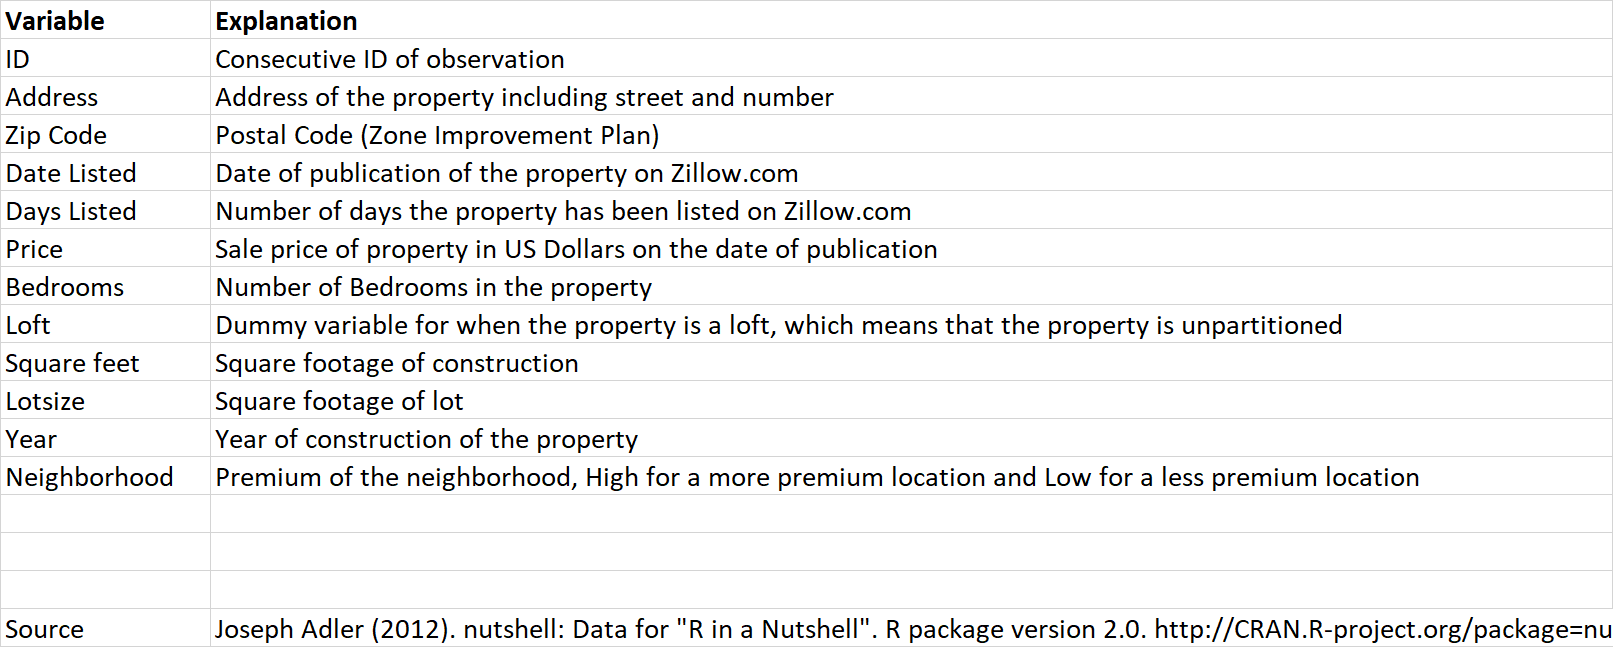

In [91]:
view(dfSummary(houses_df), method = "viewer", file = "Data/dfSummary_houses.html")

Output file written: C:\Users\woosh\Documents\RScripts\Data\dfSummary_houses.html



In [92]:
#install.packages('IRdisplay')
IRdisplay::display_html('<iframe src="./Data/dfSummary_houses.html" width=1000, height=1000></iframe>')

PPSQM : Price per Square meter


In [93]:
houses_df$PPSQM <- houses_df$Price/houses_df$`Square feet`
head(houses_df)

ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood,PPSQM
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,754 Monterey Boulevard,94127,2009-07-10,38,633000,0,1,1124,2500,1924,Low,563.1673
2,66 Winfield Street,94110,2009-07-08,40,1100000,3,0,2396,1750,1900,Medium,459.0985
3,715 Holloway Avenue,94112,2009-07-08,40,440000,0,1,625,2495,1923,Low,704.0000
4,14 Walter Street,94114,2009-07-08,40,1345000,0,1,3384,2474,1907,High,397.4586
5,2535 45th Avenue,94116,2009-07-08,40,700000,3,0,1690,3000,1947,Medium,414.2012
6,109 Germania Street,94117,2009-07-08,40,620000,0,1,2050,1300,1900,Medium,302.4390


In [94]:
houses_df$PPLOTSIZ <- houses_df$Price/houses_df$Lotsize
head(houses_df)

ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood,PPSQM,PPLOTSIZ
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,754 Monterey Boulevard,94127,2009-07-10,38,633000,0,1,1124,2500,1924,Low,563.1673,253.2000
2,66 Winfield Street,94110,2009-07-08,40,1100000,3,0,2396,1750,1900,Medium,459.0985,628.5714
3,715 Holloway Avenue,94112,2009-07-08,40,440000,0,1,625,2495,1923,Low,704.0000,176.3527
4,14 Walter Street,94114,2009-07-08,40,1345000,0,1,3384,2474,1907,High,397.4586,543.6540
5,2535 45th Avenue,94116,2009-07-08,40,700000,3,0,1690,3000,1947,Medium,414.2012,233.3333
6,109 Germania Street,94117,2009-07-08,40,620000,0,1,2050,1300,1900,Medium,302.4390,476.9231


In [95]:
mod <- lm(Price~`Square feet`, data=houses_df)

In [96]:
summary(mod)


Call:
lm(formula = Price ~ `Square feet`, data = houses_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2901622  -256869   -98147   121820  6907611 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   404482.82   33662.37   12.02   <2e-16 ***
`Square feet`    323.70      16.49   19.64   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 629400 on 1394 degrees of freedom
Multiple R-squared:  0.2167,	Adjusted R-squared:  0.2161 
F-statistic: 385.6 on 1 and 1394 DF,  p-value: < 2.2e-16


In [97]:
mod <- lm(PPSQM~`Zip Code`,data=houses_df)

In [98]:
summary(mod)


Call:
lm(formula = PPSQM ~ `Zip Code`, data = houses_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-571.72 -178.01  -47.85  108.33 2134.38 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) 189302.659  94843.626   1.996   0.0461 *
`Zip Code`      -2.005      1.008  -1.990   0.0468 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 302.9 on 1394 degrees of freedom
Multiple R-squared:  0.002832,	Adjusted R-squared:  0.002116 
F-statistic: 3.959 on 1 and 1394 DF,  p-value: 0.04682


In [99]:
unique(houses_df$`Zip Code`)

[1] 94127 94110 94112 94114 94116 94117 94122 94131 94132 94118 94107 94133
[13] 94134 94124 94115 94123 94109 94102 94121 94103 94108 94111 94100

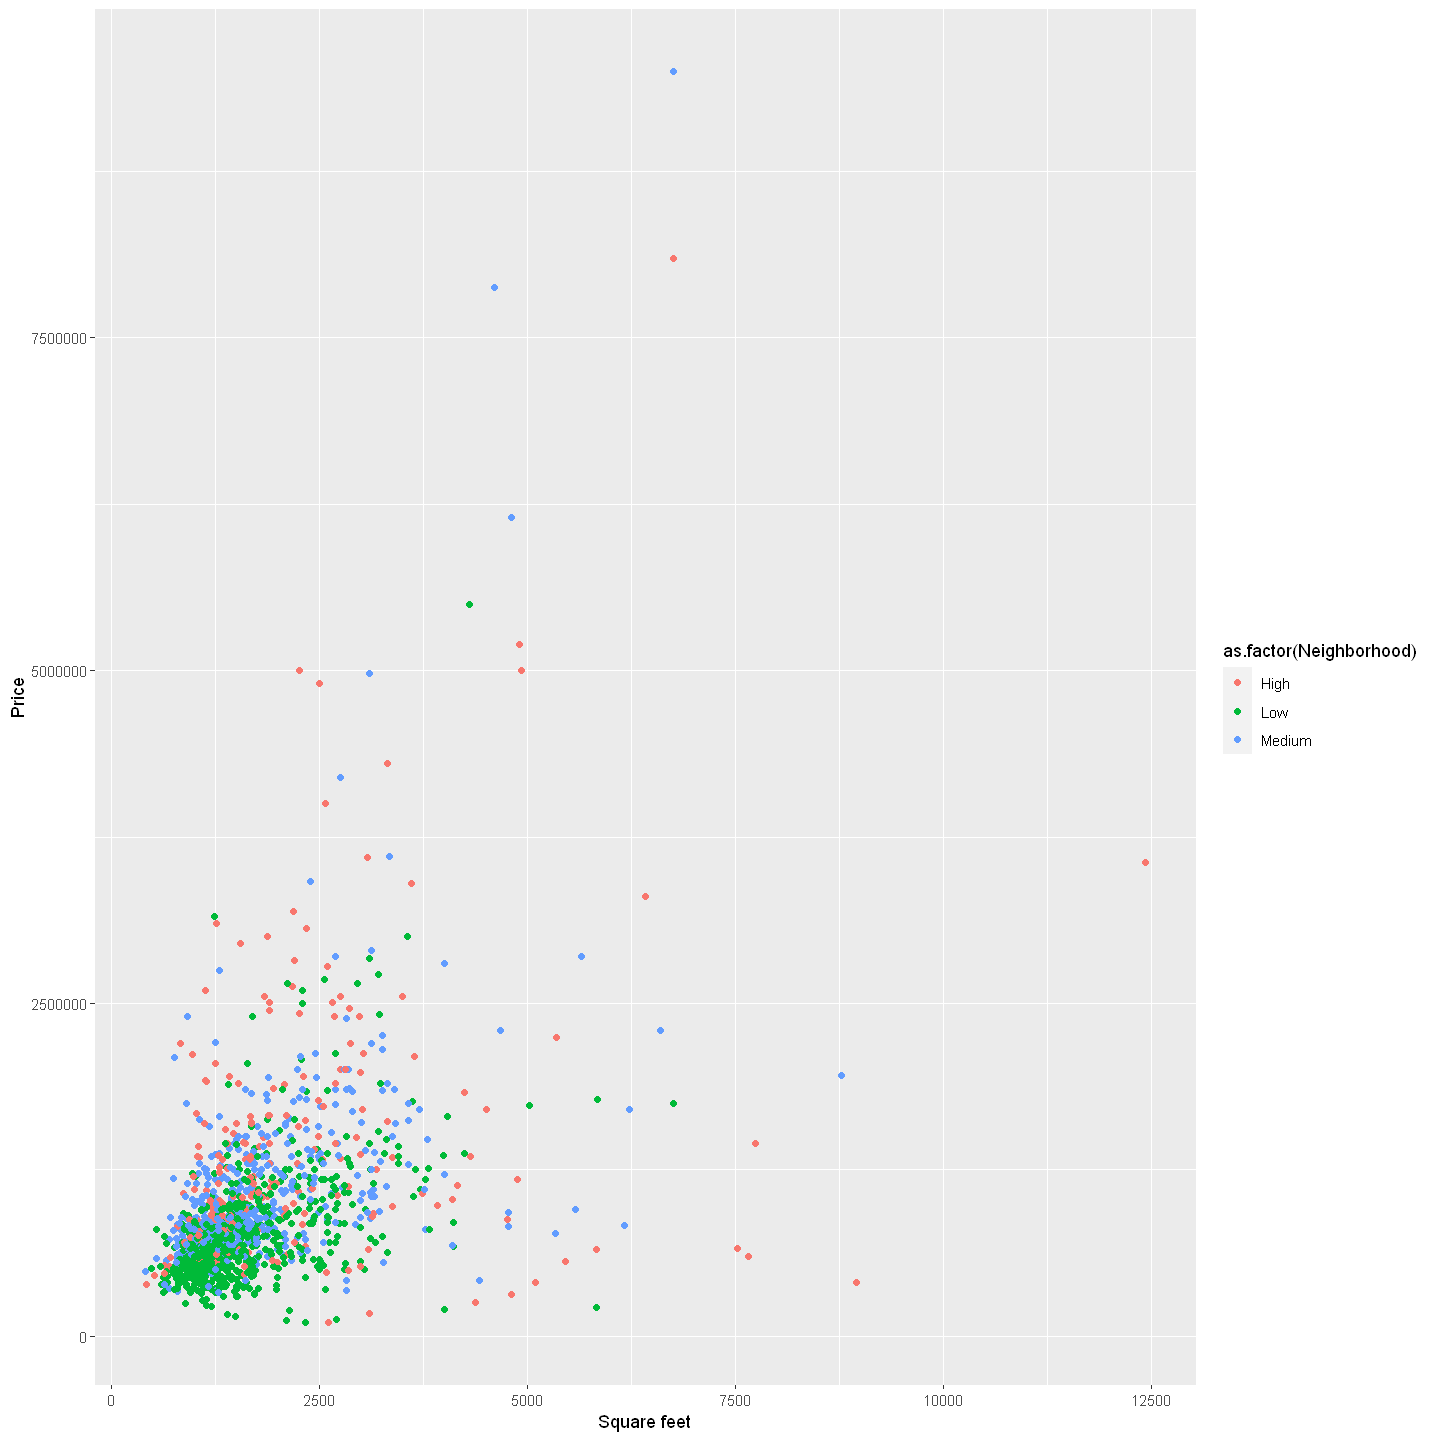

In [237]:
ggplot(houses_df, aes(`Square feet`,Price)) + geom_point(aes(color = as.factor(Neighborhood)))

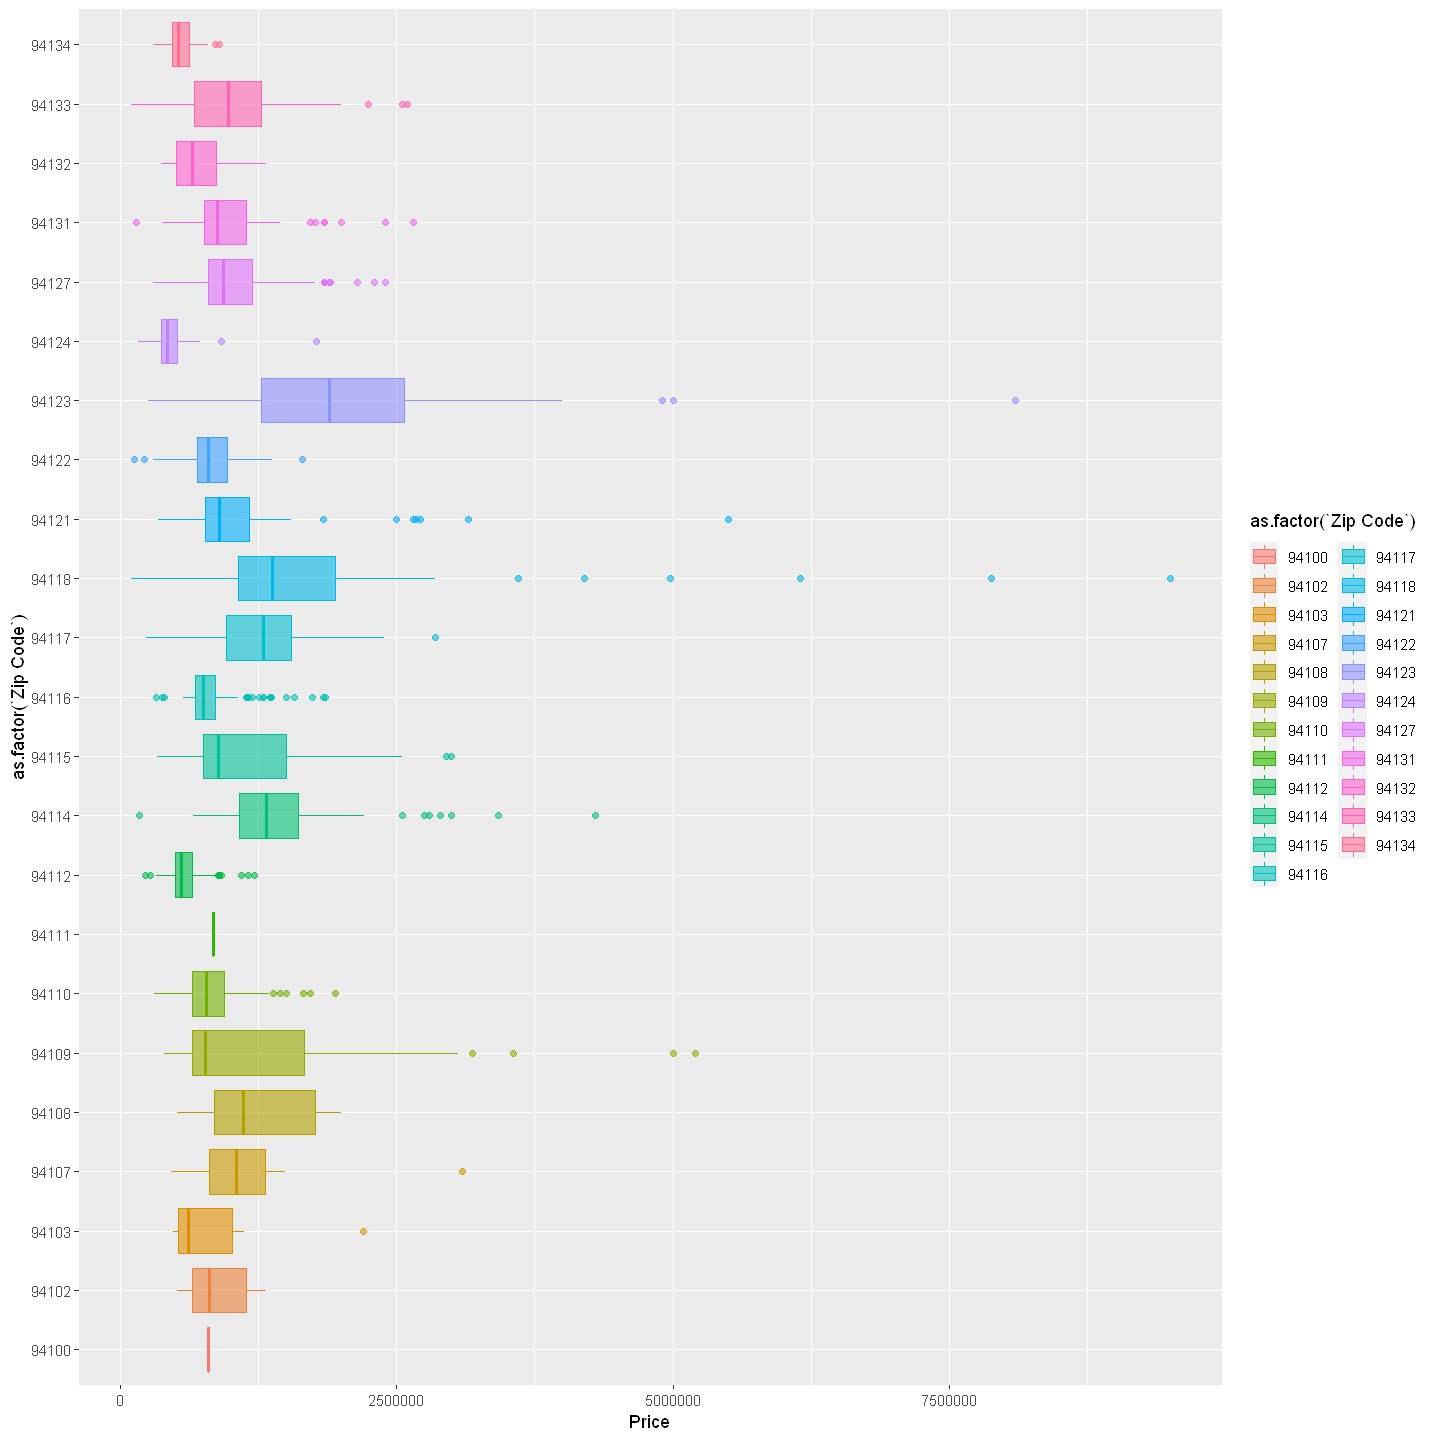

In [101]:
# Boxplots Zip Codes

p <- ggplot(houses_df, aes(as.factor(`Zip Code`), Price, color=as.factor(`Zip Code`), fill=as.factor(`Zip Code`))) + geom_boxplot(alpha=0.6)

p <- p +coord_flip()
p

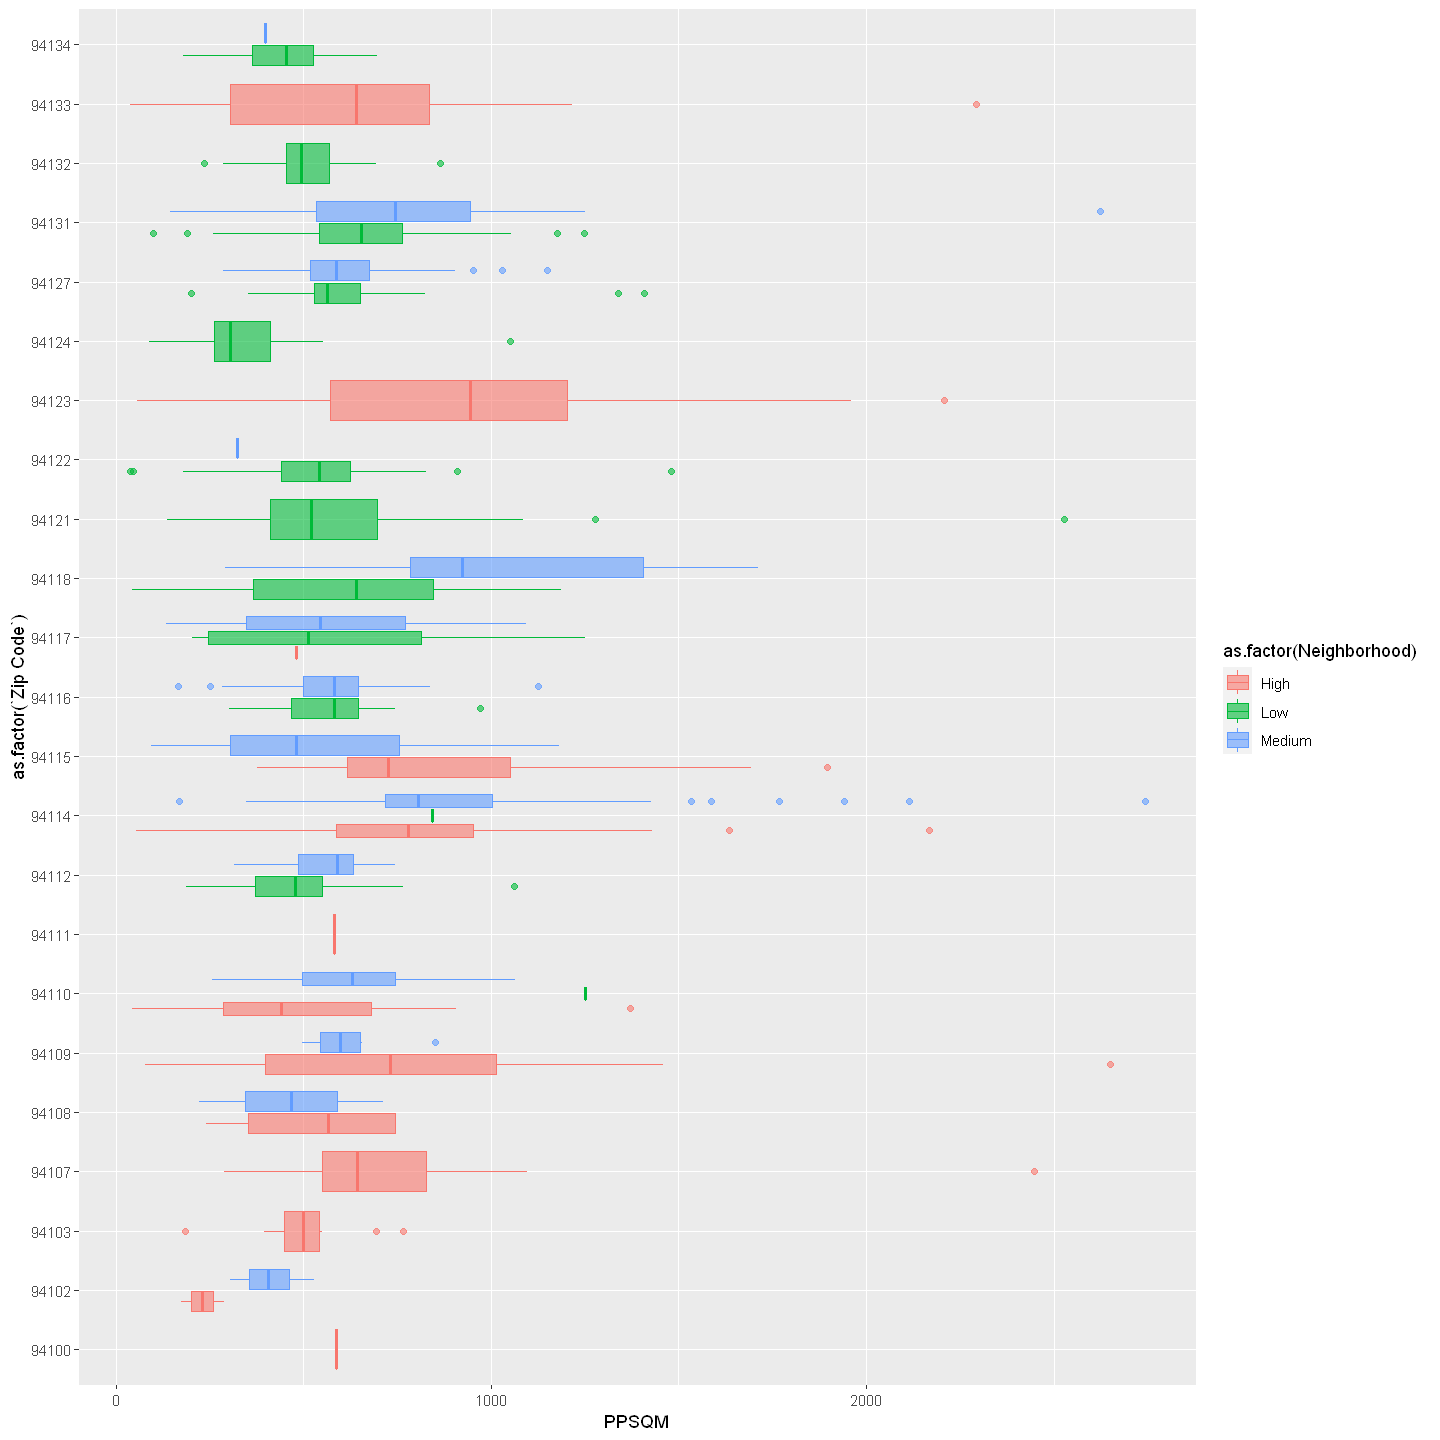

In [102]:
p <- ggplot(houses_df, aes(as.factor(`Zip Code`), PPSQM, color=as.factor(Neighborhood), fill=as.factor(Neighborhood))) + geom_boxplot(alpha=0.6)

p <- p +coord_flip()
p

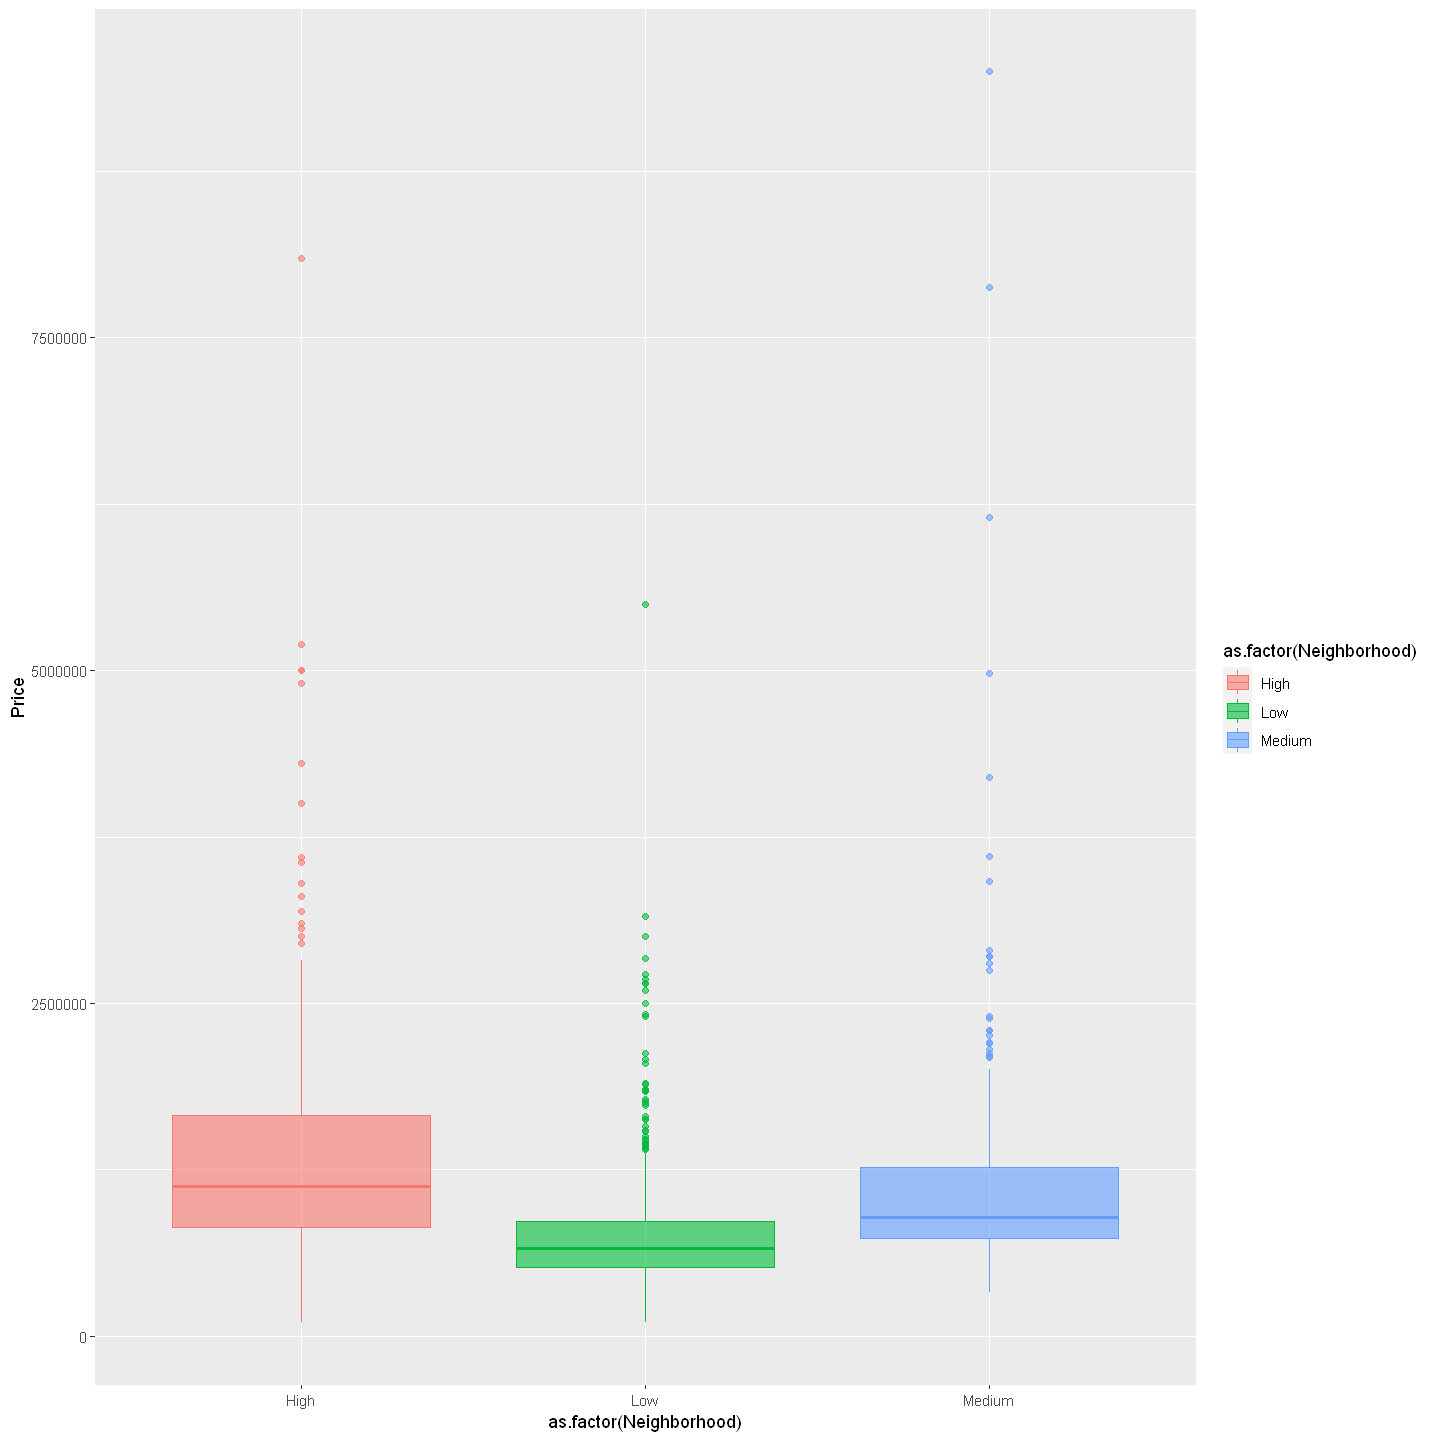

In [103]:
# Neighborhood 
p <- ggplot(houses_df, aes(as.factor(Neighborhood), Price, color=as.factor(Neighborhood), fill=as.factor(Neighborhood))) + geom_boxplot(alpha=0.6)

p

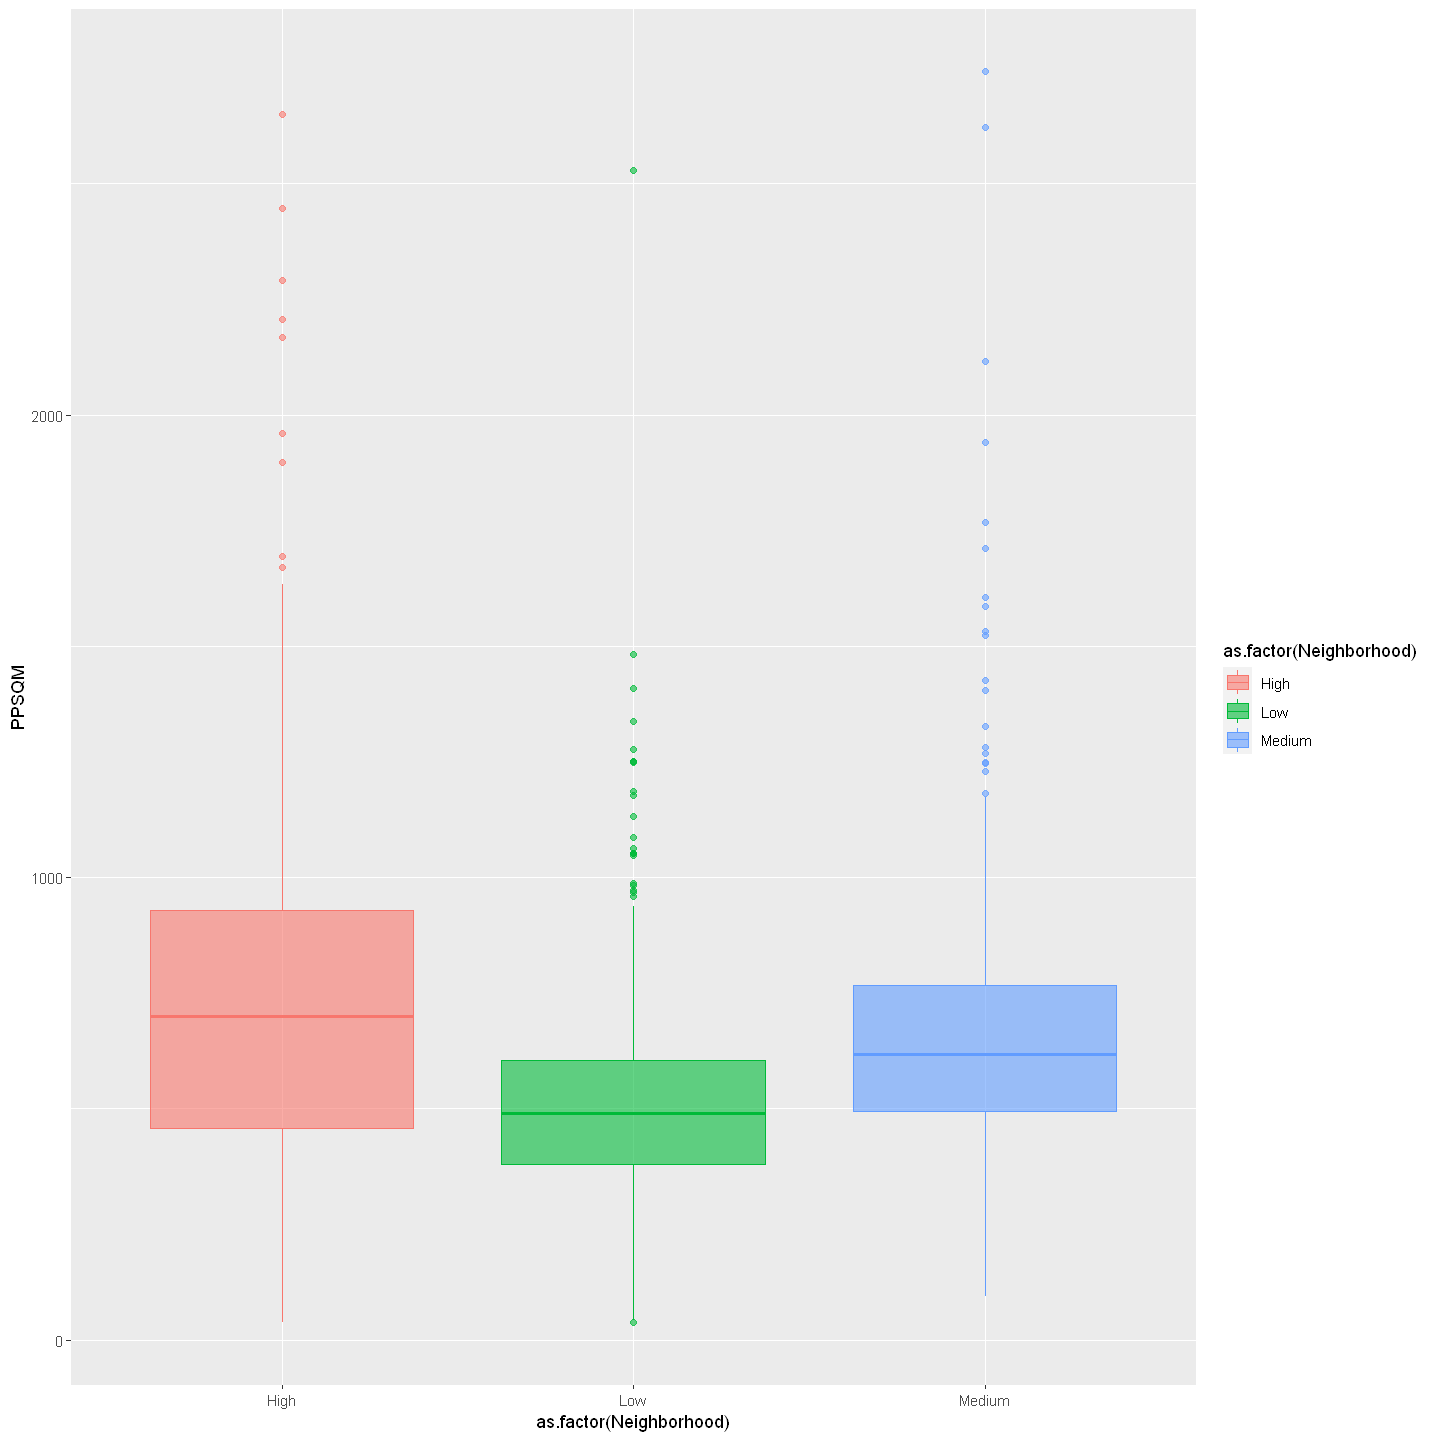

In [104]:
# Neighborhood price per square meter
p <- ggplot(houses_df, aes(as.factor(Neighborhood), PPSQM, color=as.factor(Neighborhood), fill=as.factor(Neighborhood))) + geom_boxplot(alpha=0.6)

p

In [105]:
mod <- lm(Price ~ `Zip Code`+ `Square feet` + Lotsize, data=houses_df)

In [106]:
summary(mod)


Call:
lm(formula = Price ~ `Zip Code` + `Square feet` + Lotsize, data = houses_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2891397  -259930   -92963   116038  6612671 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.884e+08  1.967e+08   1.467    0.143    
`Zip Code`    -3.061e+03  2.089e+03  -1.465    0.143    
`Square feet`  3.047e+02  1.682e+01  18.120  < 2e-16 ***
Lotsize        5.175e+01  1.088e+01   4.756 2.18e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 624500 on 1392 degrees of freedom
Multiple R-squared:  0.2298,	Adjusted R-squared:  0.2281 
F-statistic: 138.4 on 3 and 1392 DF,  p-value: < 2.2e-16


In [107]:
mod <- lm(Price ~ `Square feet`, data=houses_df)

summary(mod)


Call:
lm(formula = Price ~ `Square feet`, data = houses_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2901622  -256869   -98147   121820  6907611 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   404482.82   33662.37   12.02   <2e-16 ***
`Square feet`    323.70      16.49   19.64   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 629400 on 1394 degrees of freedom
Multiple R-squared:  0.2167,	Adjusted R-squared:  0.2161 
F-statistic: 385.6 on 1 and 1394 DF,  p-value: < 2.2e-16


In [225]:
houses_df %>% group_by(Neighborhood) %>% summarise(Price=mean(Price), AvPPSQF = mean(PPSQM))

Price,AvPPSQF
<dbl>,<dbl>
976741.4,596.9542


In [234]:
 HI_houses_df<- houses_df %>% filter(Neighborhood=="High")
summary(select(HI_houses_df, Price:PPLOTSIZ, -(Bedrooms:Loft),-Year,-Neighborhood))

     Price          Square feet       Lotsize          PPSQM        
 Min.   : 100000   Min.   :  430   Min.   :  436   Min.   :  38.23  
 1st Qu.: 817000   1st Qu.: 1297   1st Qu.: 1875   1st Qu.: 457.32  
 Median :1125000   Median : 1814   Median : 2500   Median : 699.65  
 Mean   :1416304   Mean   : 2252   Mean   : 3095   Mean   : 747.61  
 3rd Qu.:1660000   3rd Qu.: 2698   3rd Qu.: 3368   3rd Qu.: 928.24  
 Max.   :8100000   Max.   :12430   Max.   :13068   Max.   :2650.60  
    PPLOTSIZ      
 Min.   :  53.44  
 1st Qu.: 315.04  
 Median : 524.74  
 Mean   : 585.74  
 3rd Qu.: 745.88  
 Max.   :2454.55  

In [235]:
 MID_houses_df<- houses_df %>% filter(Neighborhood=="Medium")
summary(select(MID_houses_df, Price:PPLOTSIZ, -(Bedrooms:Loft),-Year,-Neighborhood))

     Price          Square feet      Lotsize          PPSQM        
 Min.   : 325000   Min.   : 410   Min.   :  418   Min.   :  94.46  
 1st Qu.: 735000   1st Qu.:1177   1st Qu.: 2063   1st Qu.: 494.72  
 Median : 893000   Median :1525   Median : 2848   Median : 617.89  
 Mean   :1104024   Mean   :1817   Mean   : 3093   Mean   : 662.30  
 3rd Qu.:1265000   3rd Qu.:2166   3rd Qu.: 3480   3rd Qu.: 766.67  
 Max.   :9500000   Max.   :8768   Max.   :13300   Max.   :2742.78  
    PPLOTSIZ      
 Min.   :  52.04  
 1st Qu.: 250.00  
 Median : 344.61  
 Mean   : 401.24  
 3rd Qu.: 491.43  
 Max.   :1926.69  

In [236]:
 LO_houses_df<- houses_df %>% filter(Neighborhood=="Low")
summary(select(LO_houses_df, Price:PPLOTSIZ, -(Bedrooms:Loft),-Year,-Neighborhood))

     Price          Square feet      Lotsize          PPSQM        
 Min.   : 100000   Min.   : 480   Min.   :  871   Min.   :  37.28  
 1st Qu.: 517625   1st Qu.:1100   1st Qu.: 2321   1st Qu.: 378.87  
 Median : 657750   Median :1375   Median : 2500   Median : 489.62  
 Mean   : 760343   Mean   :1588   Mean   : 2933   Mean   : 508.80  
 3rd Qu.: 862750   3rd Qu.:1804   3rd Qu.: 3000   3rd Qu.: 604.70  
 Max.   :5500000   Max.   :6750   Max.   :14727   Max.   :2528.09  
    PPLOTSIZ      
 Min.   :  19.06  
 1st Qu.: 191.40  
 Median : 251.71  
 Mean   : 281.73  
 3rd Qu.: 330.66  
 Max.   :1100.00  

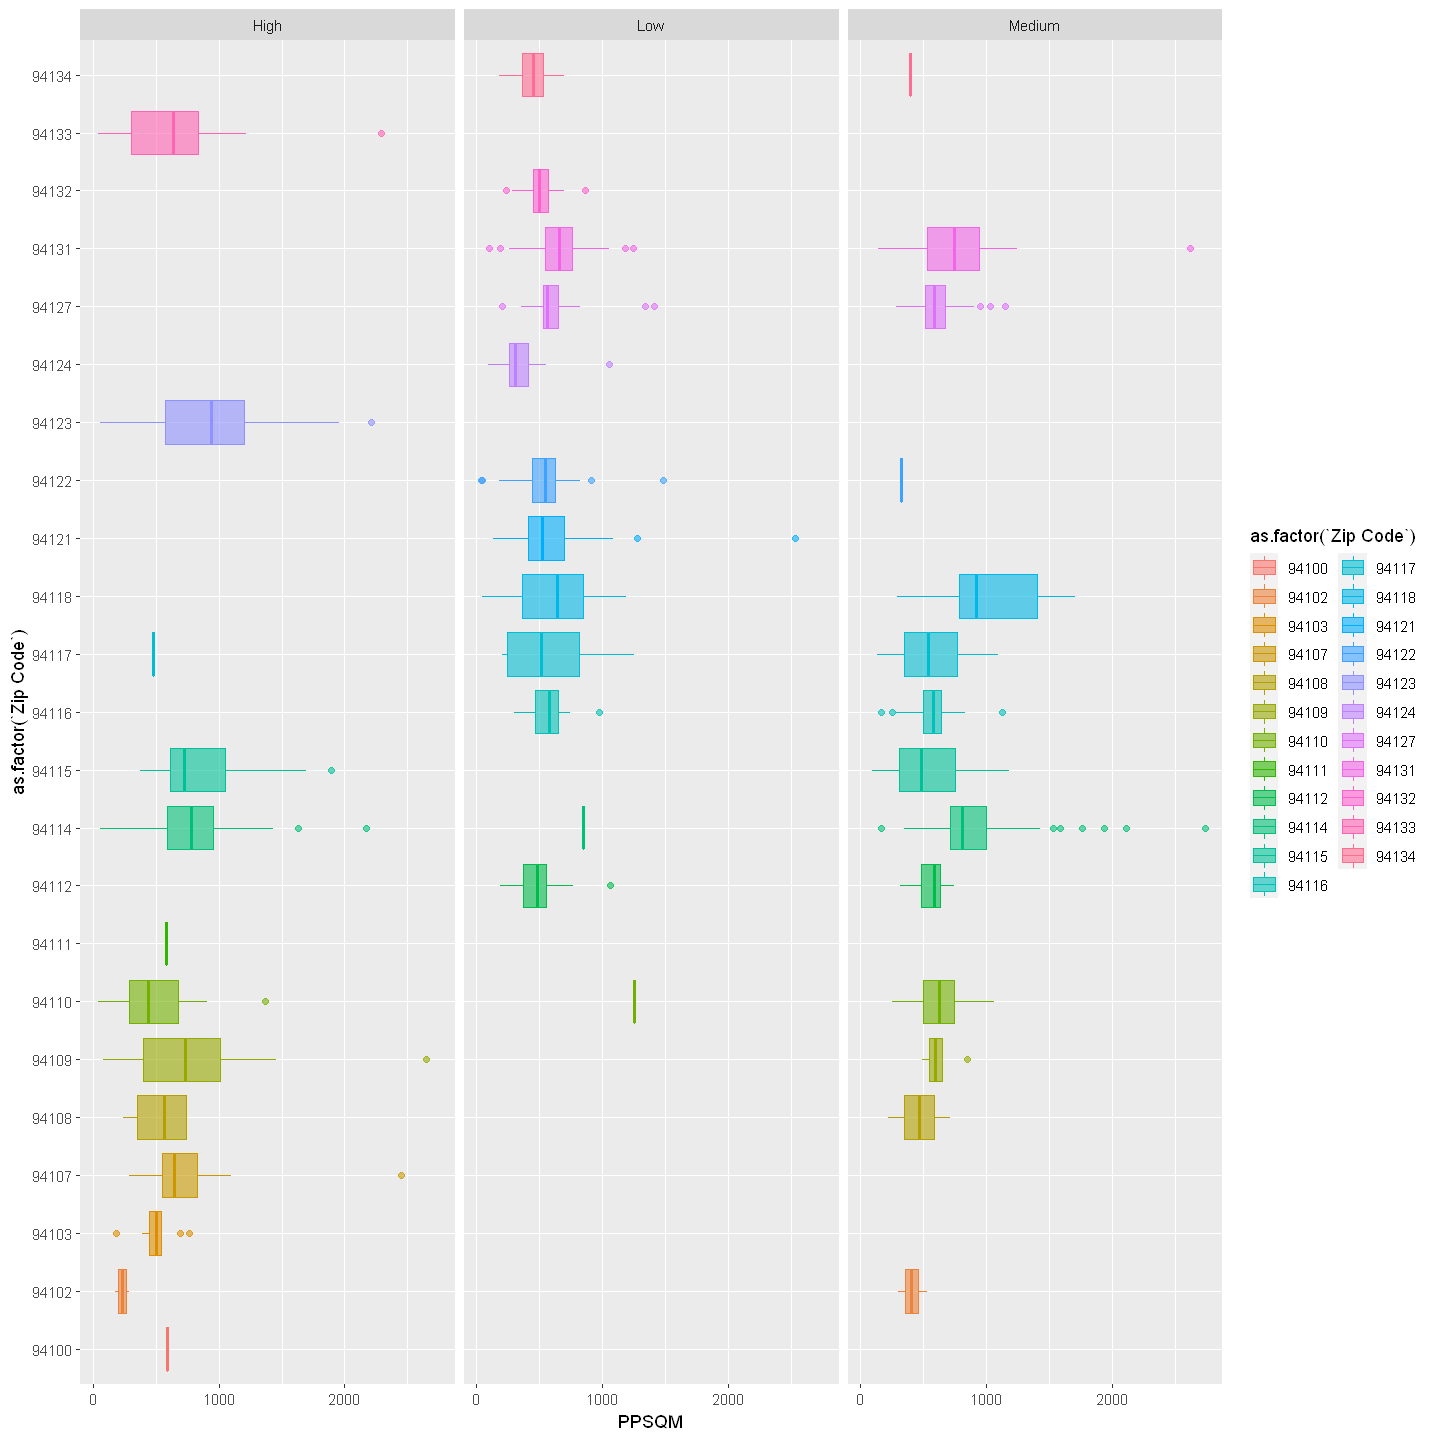

In [207]:
p <- ggplot(houses_df, aes(as.factor(`Zip Code`), PPSQM, color=as.factor(`Zip Code`), fill=as.factor(`Zip Code`))) + geom_boxplot(alpha=0.6)

p <- p +coord_flip()+ facet_grid(~Neighborhood)
p

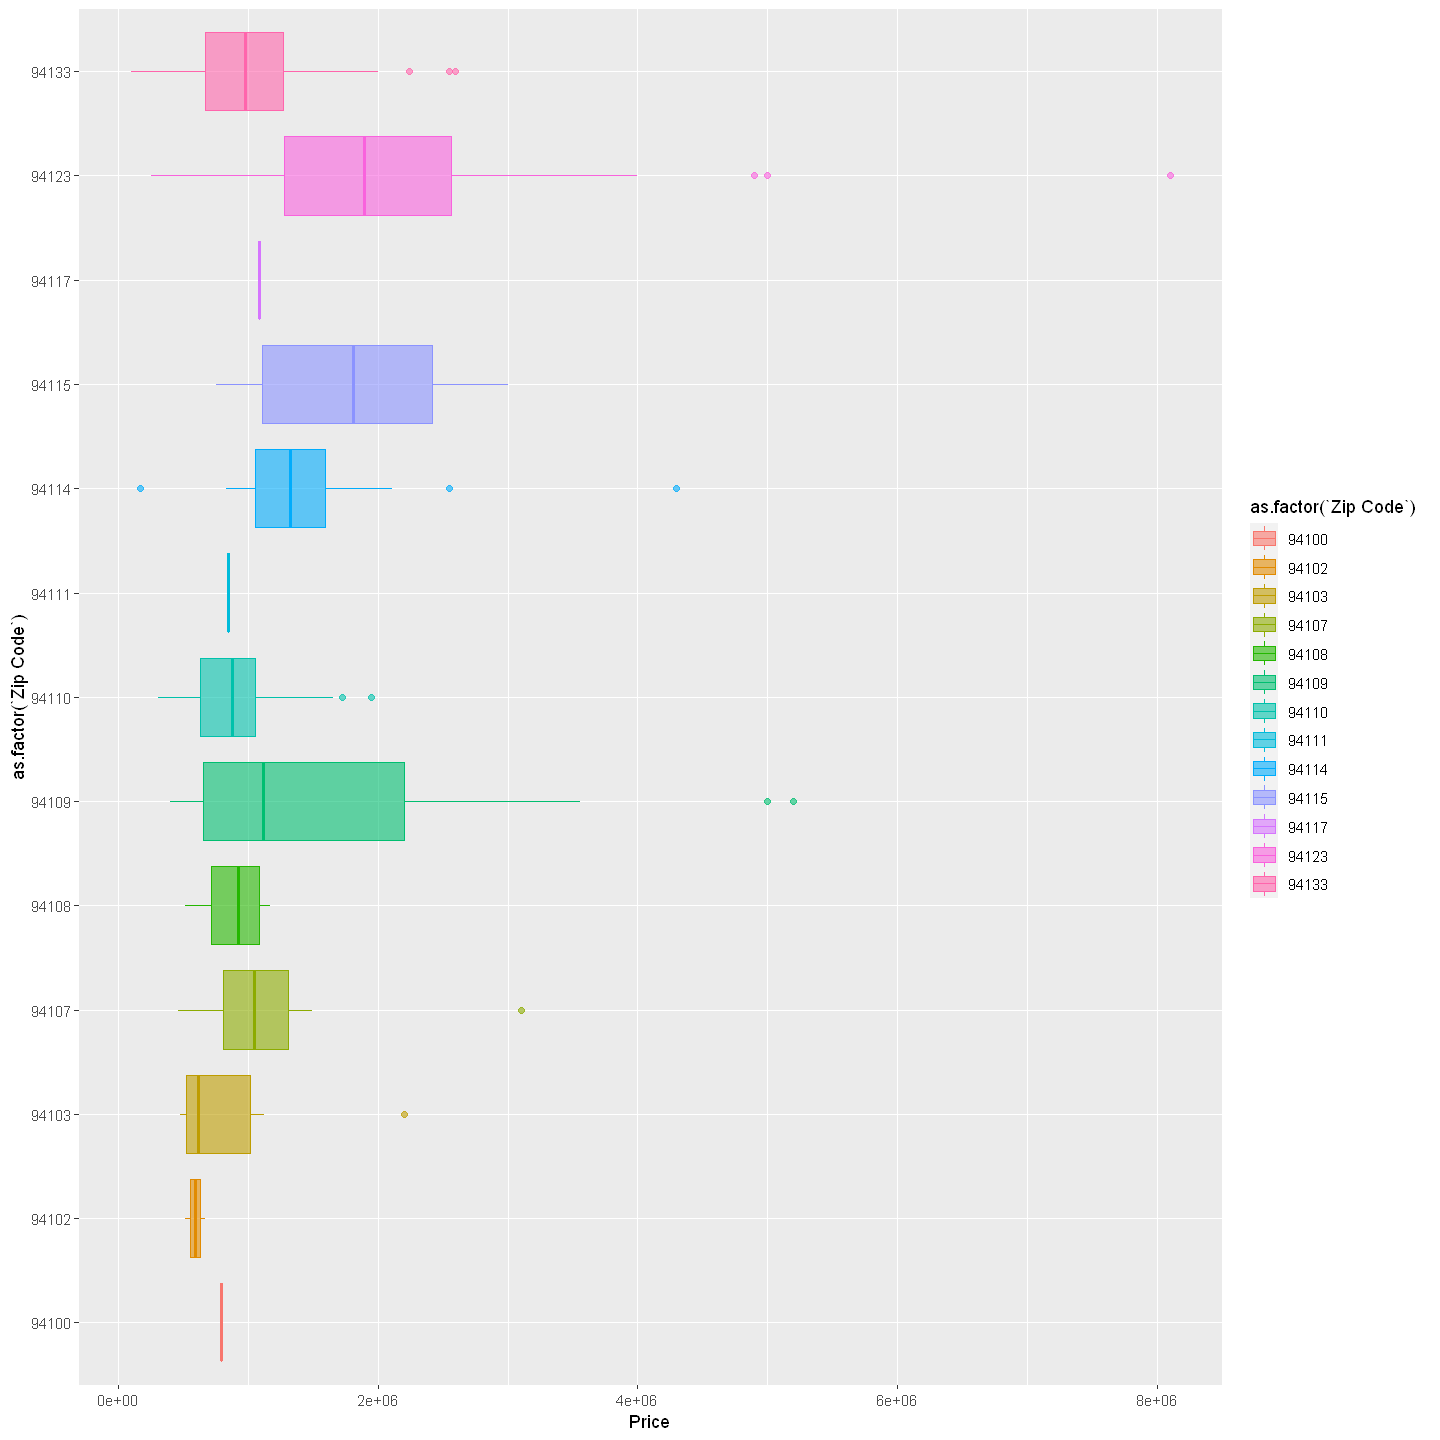

In [113]:
p <- ggplot(HI_houses_df, aes(as.factor(`Zip Code`), Price, color=as.factor(`Zip Code`), fill=as.factor(`Zip Code`))) + geom_boxplot(alpha=0.6)

p <- p +coord_flip()
p

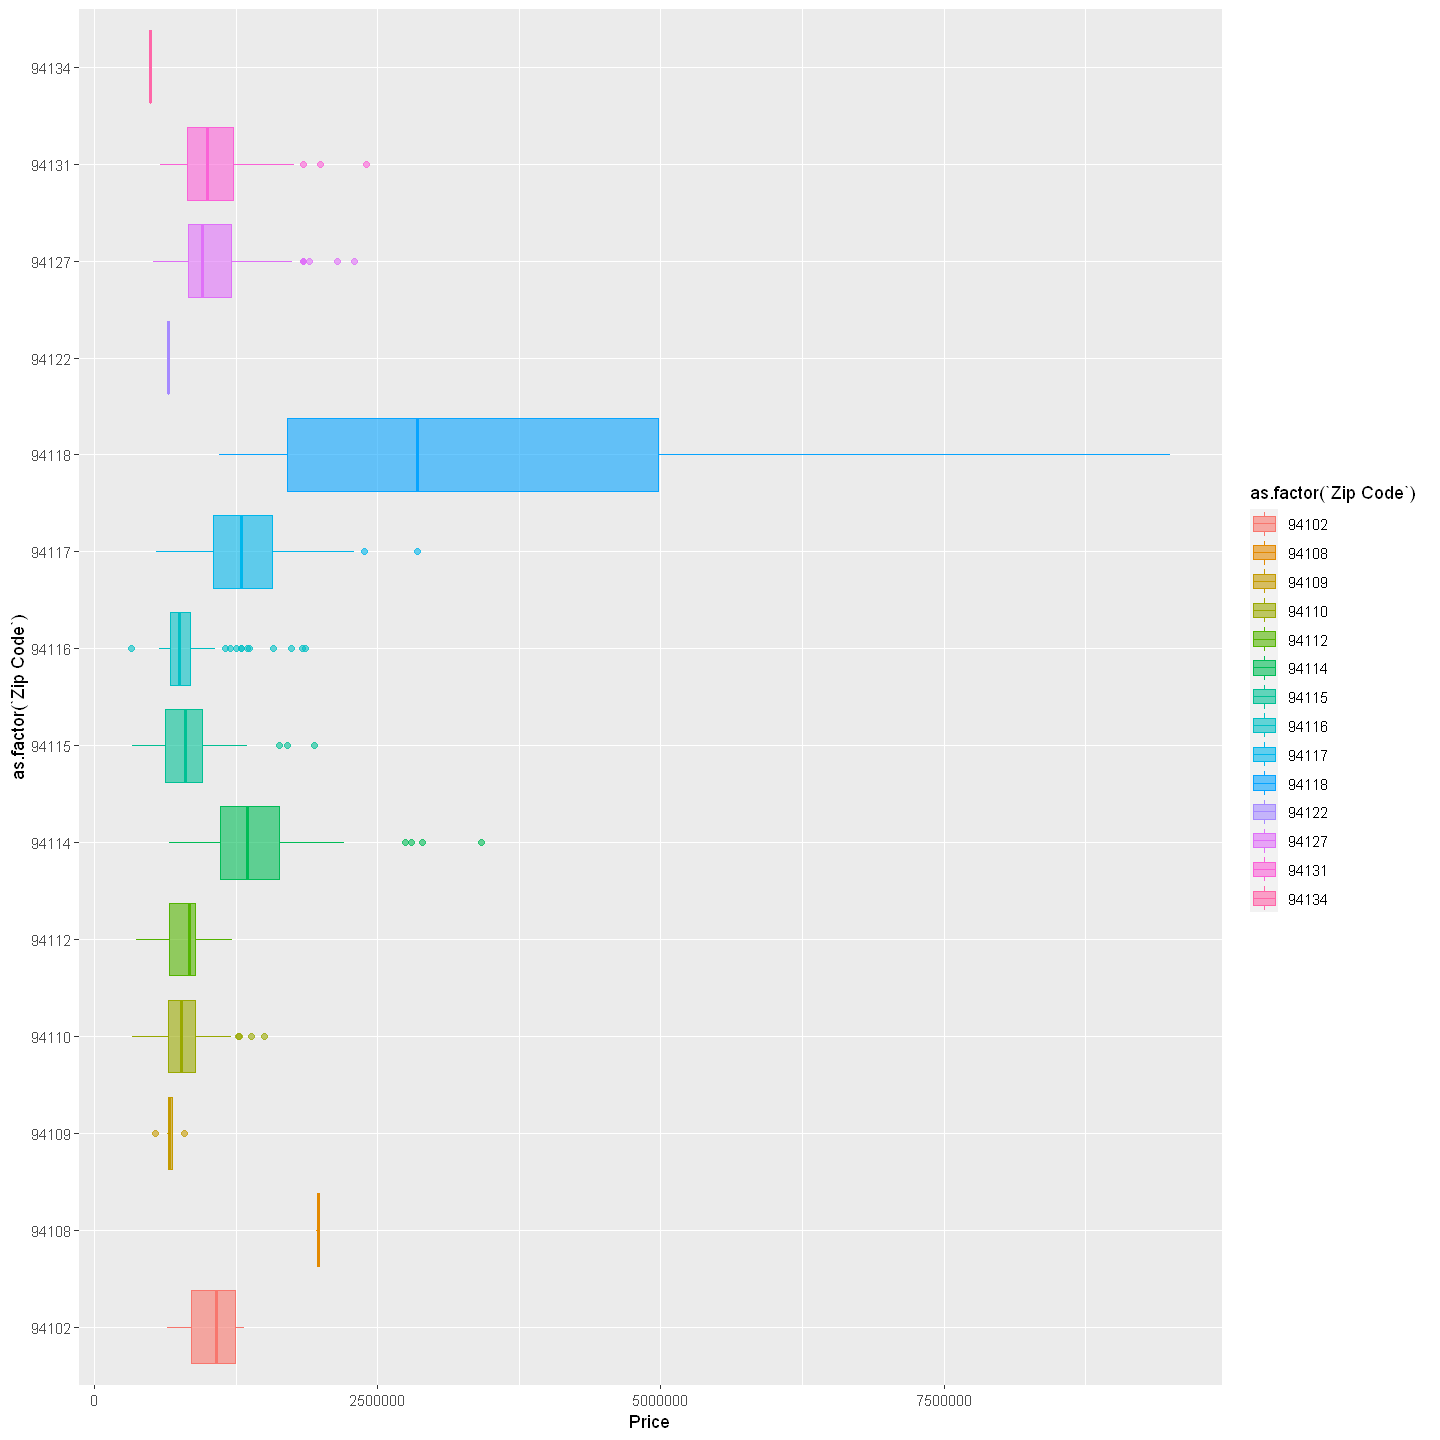

In [114]:
p <- ggplot(MID_houses_df, aes(as.factor(`Zip Code`), Price, color=as.factor(`Zip Code`), fill=as.factor(`Zip Code`))) + geom_boxplot(alpha=0.6)

p <- p +coord_flip()
p

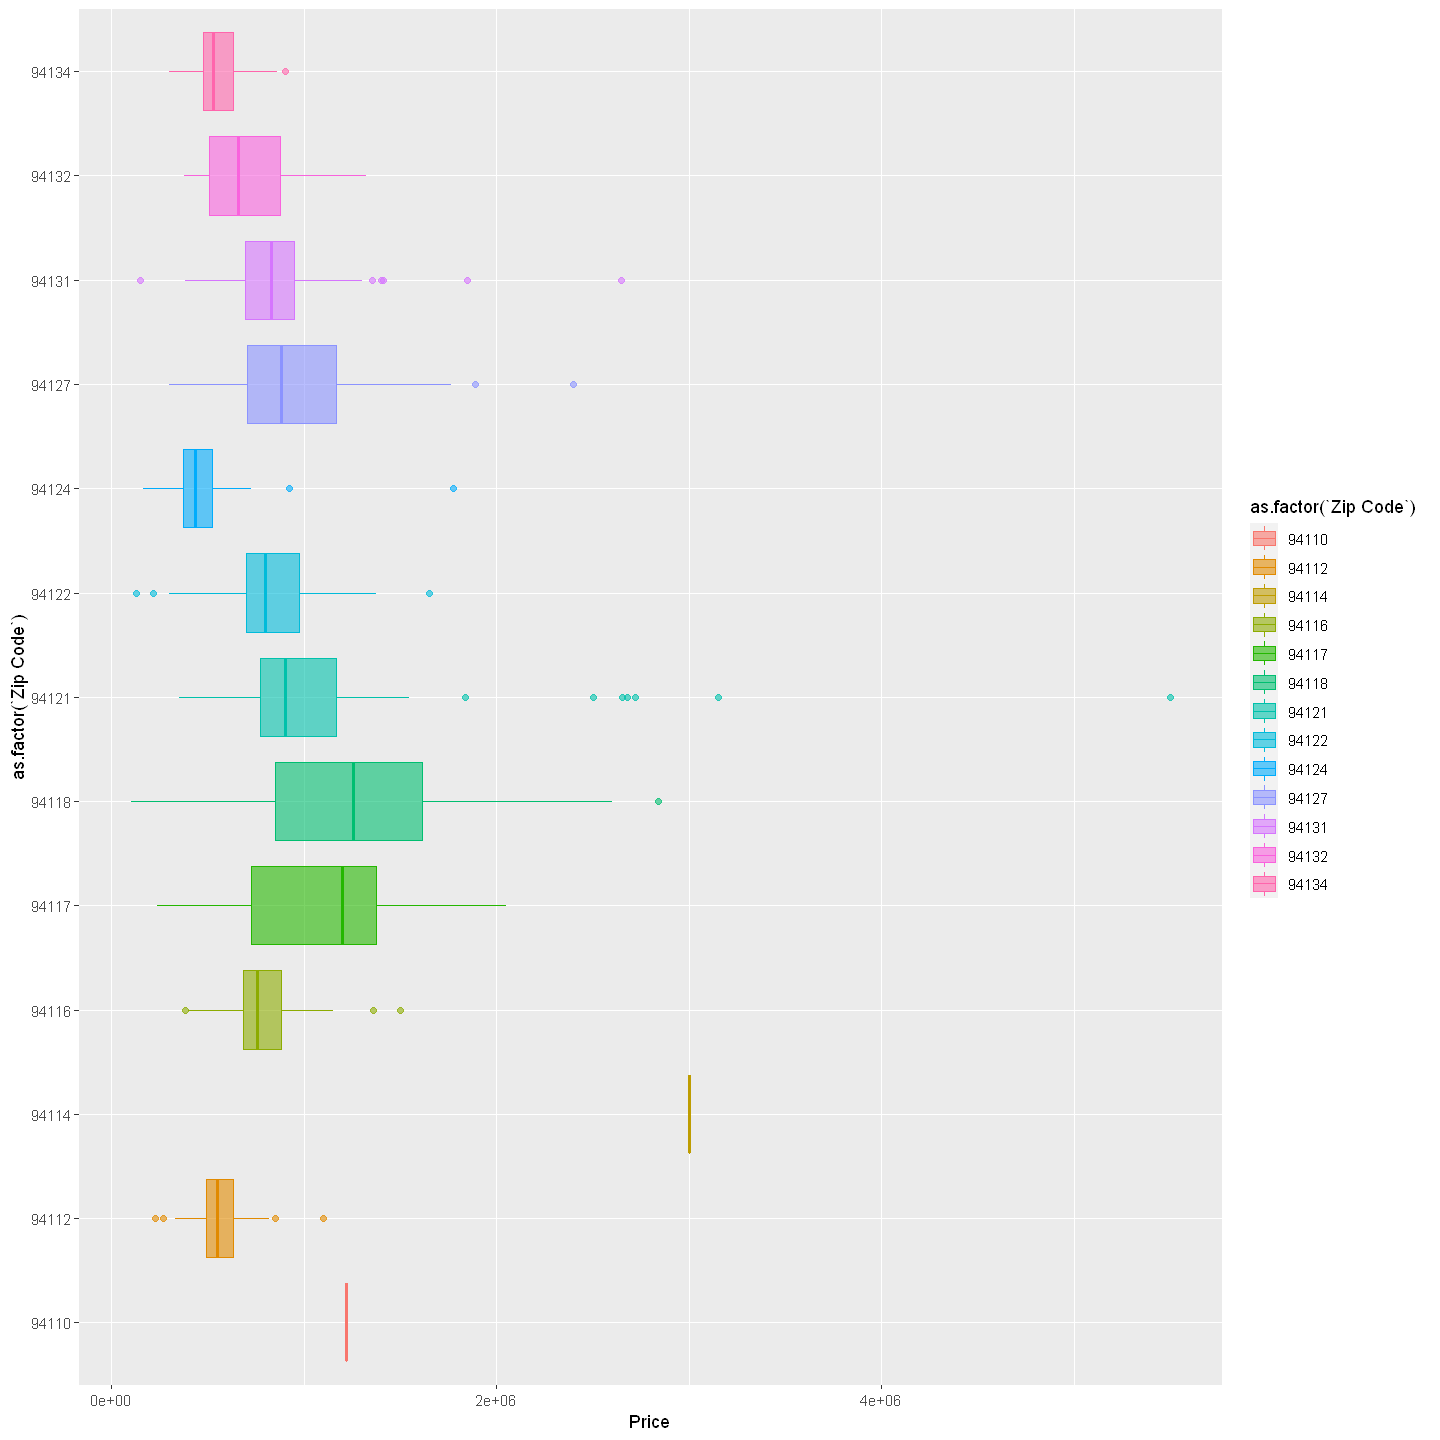

In [115]:
p <- ggplot(LO_houses_df, aes(as.factor(`Zip Code`), Price, color=as.factor(`Zip Code`), fill=as.factor(`Zip Code`))) + geom_boxplot(alpha=0.6)

p <- p +coord_flip()
p

In [116]:
names(houses_df)

[1] "ID"           "Address"      "Zip Code"     "Date Listed"  "Days listed" 
 [6] "Price"        "Bedrooms"     "Loft"         "Square feet"  "Lotsize"     
[11] "Year"         "Neighborhood" "PPSQM"        "PPLOTSIZ"

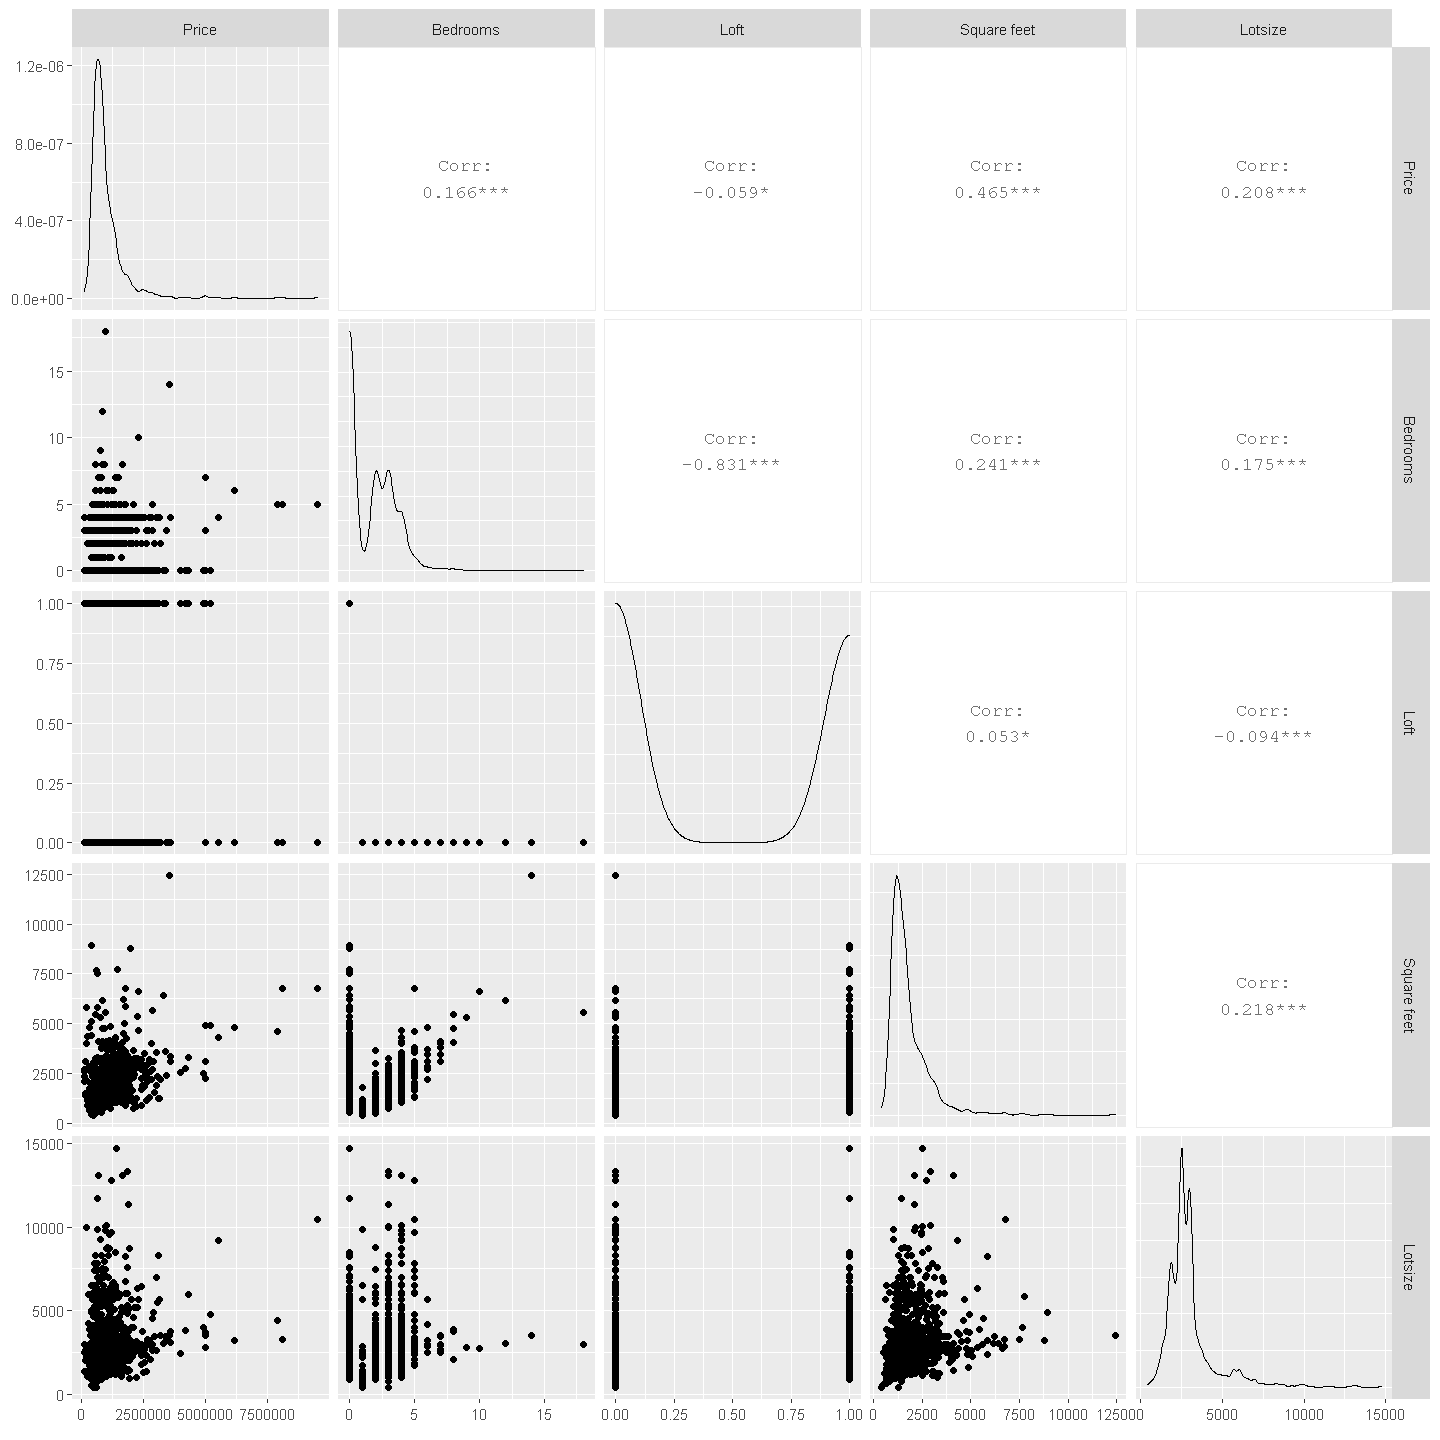

In [117]:
GGally::ggpairs(select(houses_df, Price:Lotsize))

In [118]:
#GGally::ggpairs(select(HI_houses_df, Price, `Square feet`,Lotsize, PPSQM, PPLOTSIZ))

In [119]:
cor(select(HI_houses_df, Price, `Square feet`,Lotsize, PPSQM, PPLOTSIZ))

,Price,Square feet,Lotsize,PPSQM,PPLOTSIZ
Price,1.0000000,0.29215165,0.05146220,0.57852222,0.68604996
Square feet,0.2921516,1.00000000,0.09291541,-0.39505209,0.05140204
Lotsize,0.0514622,0.09291541,1.00000000,-0.04705069,-0.46004821
PPSQM,0.5785222,-0.39505209,-0.04705069,1.00000000,0.57860792
PPLOTSIZ,0.6860500,0.05140204,-0.46004821,0.57860792,1.00000000


In [120]:
#GGally::ggpairs(select(MID_houses_df, Price, `Square feet`,Lotsize, PPSQM, PPLOTSIZ))

In [121]:
cor(select(MID_houses_df, Price, `Square feet`,Lotsize, PPSQM, PPLOTSIZ))

,Price,Square feet,Lotsize,PPSQM,PPLOTSIZ
Price,1.0000000,0.5054821,0.26498566,0.46678659,0.6548715
Square feet,0.5054821,1.0000000,0.27598023,-0.32871340,0.2501613
Lotsize,0.2649857,0.2759802,1.00000000,-0.02419475,-0.3797030
PPSQM,0.4667866,-0.3287134,-0.02419475,1.00000000,0.4668572
PPLOTSIZ,0.6548715,0.2501613,-0.37970303,0.46685718,1.0000000


In [122]:
#GGally::ggpairs(select(LO_houses_df, Price, `Square feet`,Lotsize, PPSQM, PPLOTSIZ))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



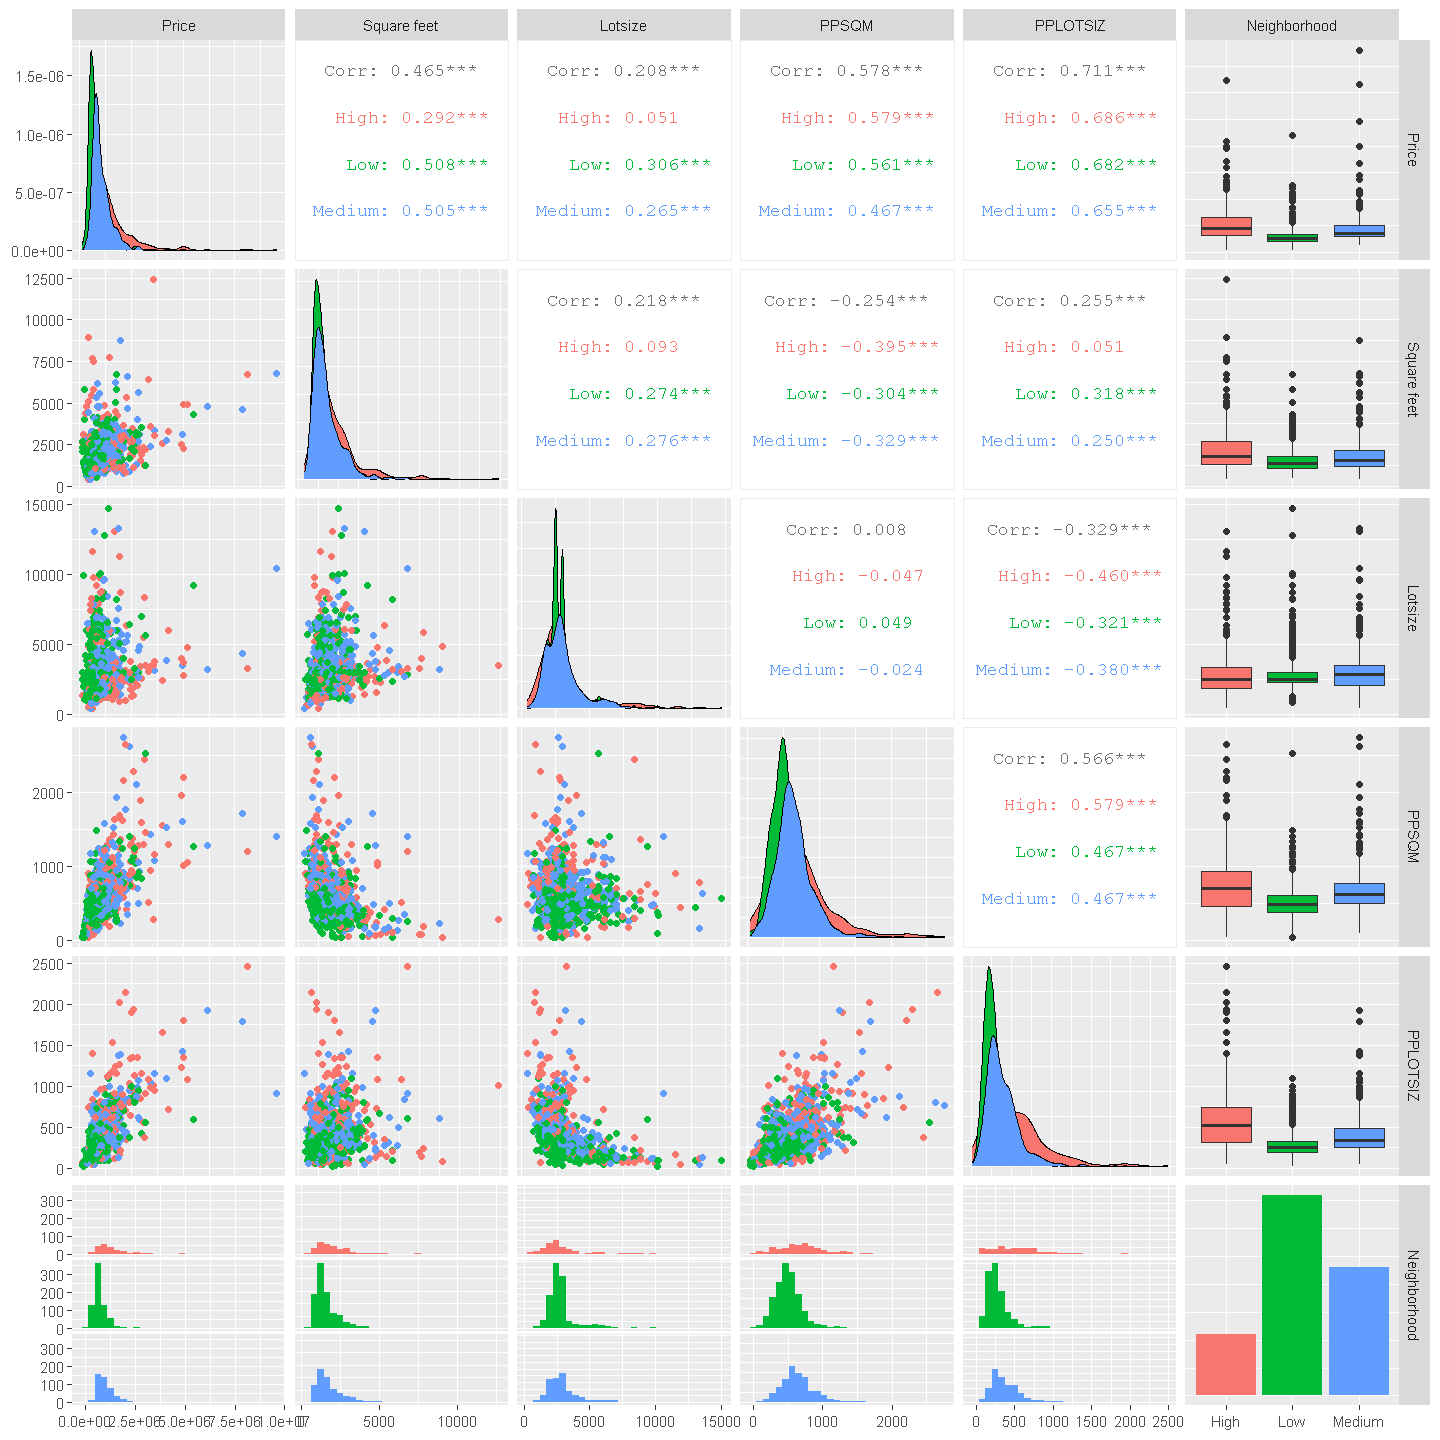

In [123]:
GGally::ggpairs(select(houses_df, Price, `Square feet`,Lotsize, PPSQM, PPLOTSIZ,Neighborhood), mapping = aes(color=Neighborhood))

In [124]:
cor(select(LO_houses_df, Price, `Square feet`,Lotsize, PPSQM, PPLOTSIZ))

,Price,Square feet,Lotsize,PPSQM,PPLOTSIZ
Price,1.0000000,0.5076264,0.30593507,0.56060186,0.6823305
Square feet,0.5076264,1.0000000,0.27398789,-0.30370311,0.3183312
Lotsize,0.3059351,0.2739879,1.00000000,0.04886838,-0.3206740
PPSQM,0.5606019,-0.3037031,0.04886838,1.00000000,0.4673444
PPLOTSIZ,0.6823305,0.3183312,-0.32067400,0.46734441,1.0000000


In [125]:
names(houses_df)

[1] "ID"           "Address"      "Zip Code"     "Date Listed"  "Days listed" 
 [6] "Price"        "Bedrooms"     "Loft"         "Square feet"  "Lotsize"     
[11] "Year"         "Neighborhood" "PPSQM"        "PPLOTSIZ"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



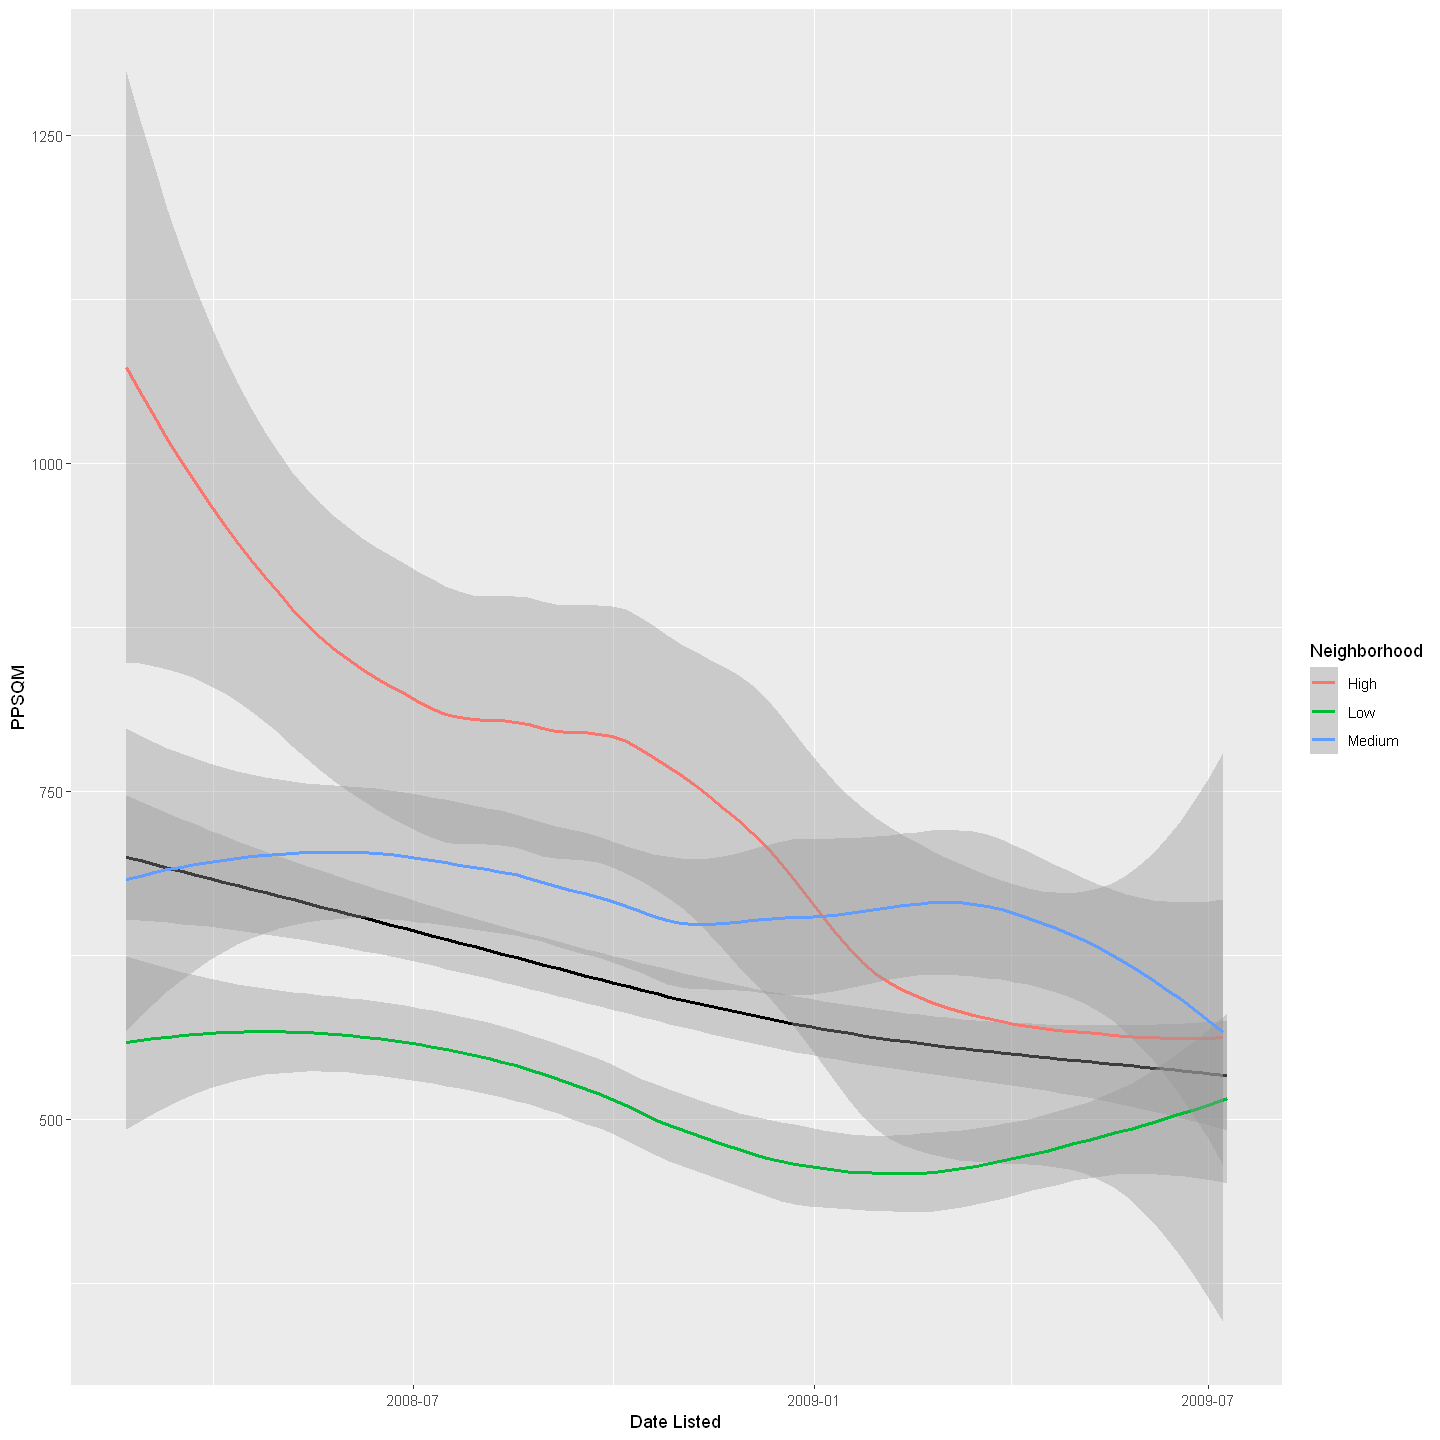

In [241]:
# Visualization
p <- ggplot(houses_df, aes(x = `Date Listed`, y = PPSQM))
p <- p + geom_smooth(color = 'black')
p <- p + geom_smooth(aes(color = Neighborhood))
#p <- p +  scale_color_manual(values = c("darkred", "steelblue"))
p

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



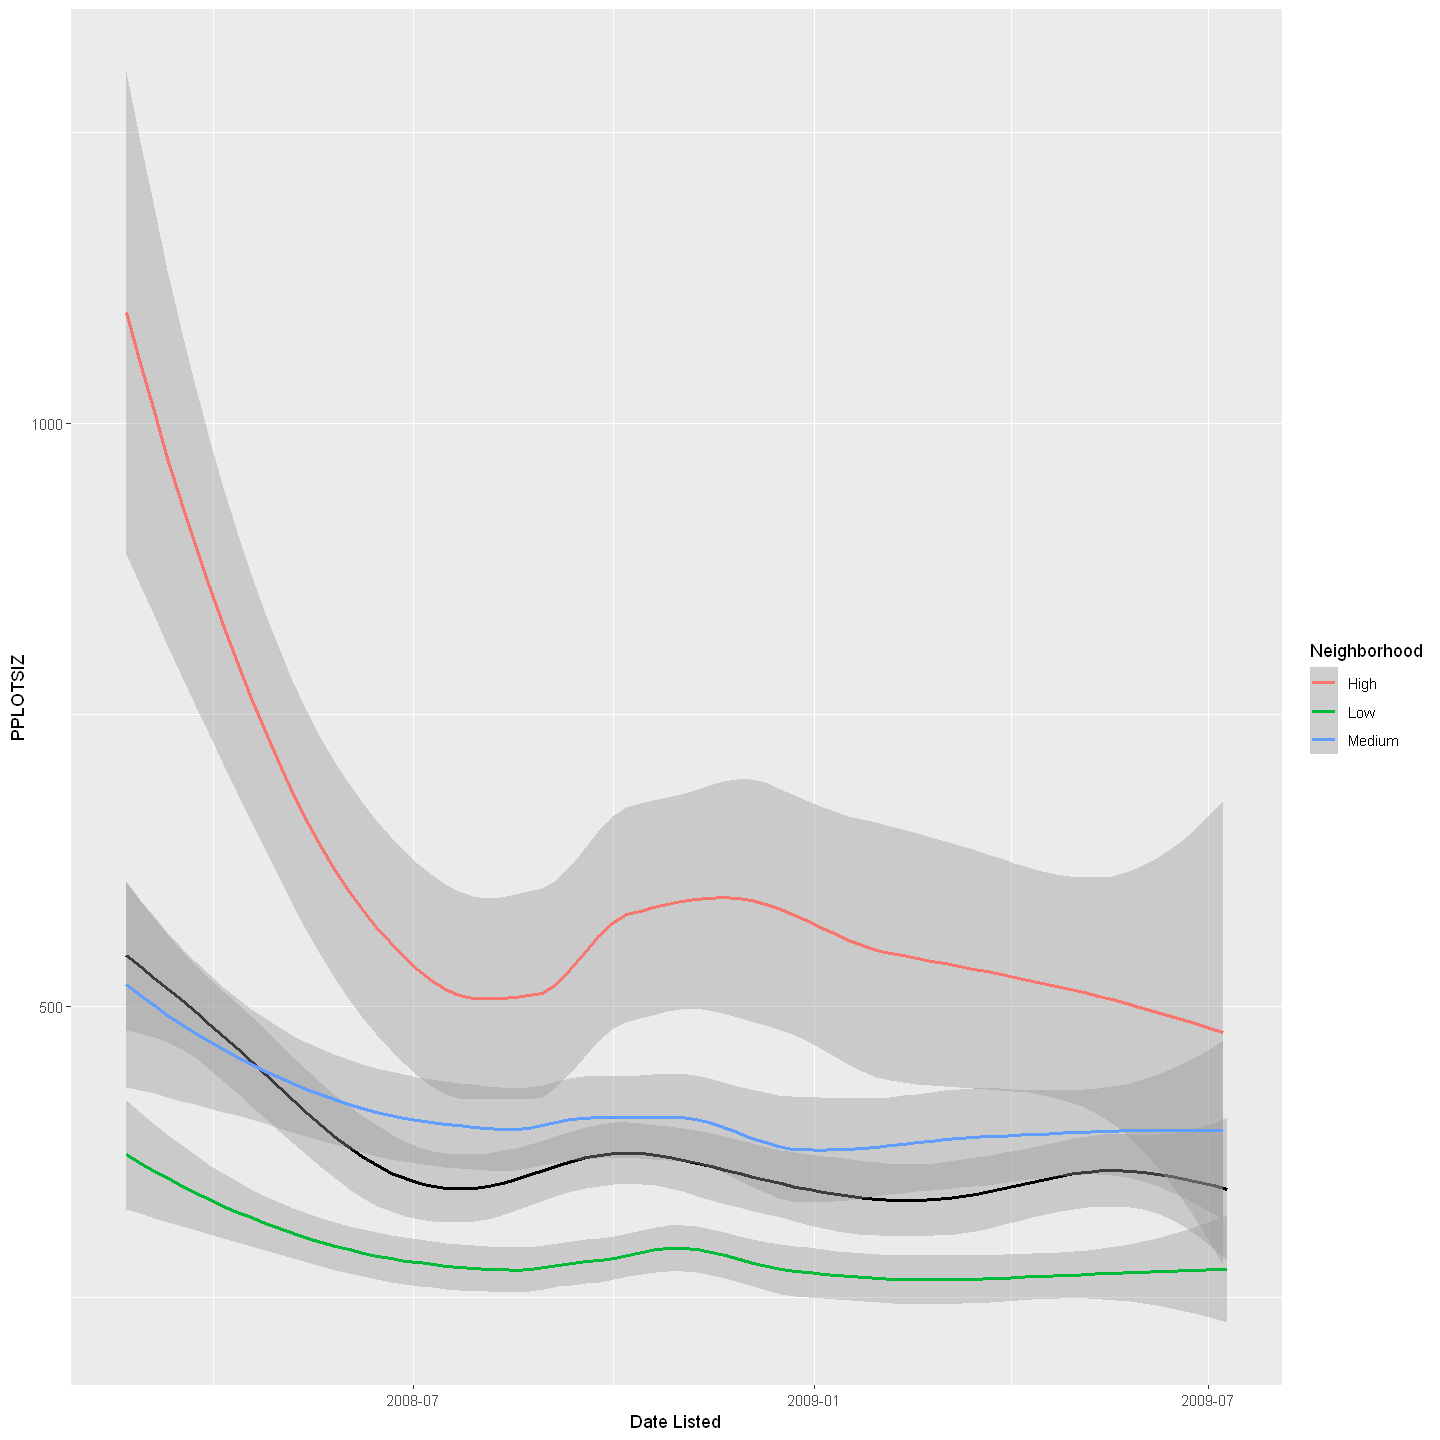

In [243]:
# Visualization
p <- ggplot(houses_df, aes(x = `Date Listed`, y = PPLOTSIZ)) 
p <- p + geom_smooth(color = 'black')
p <- p + geom_smooth(aes(color = Neighborhood))
#p <- p +  scale_color_manual(values = c("darkred", "steelblue"))
p

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



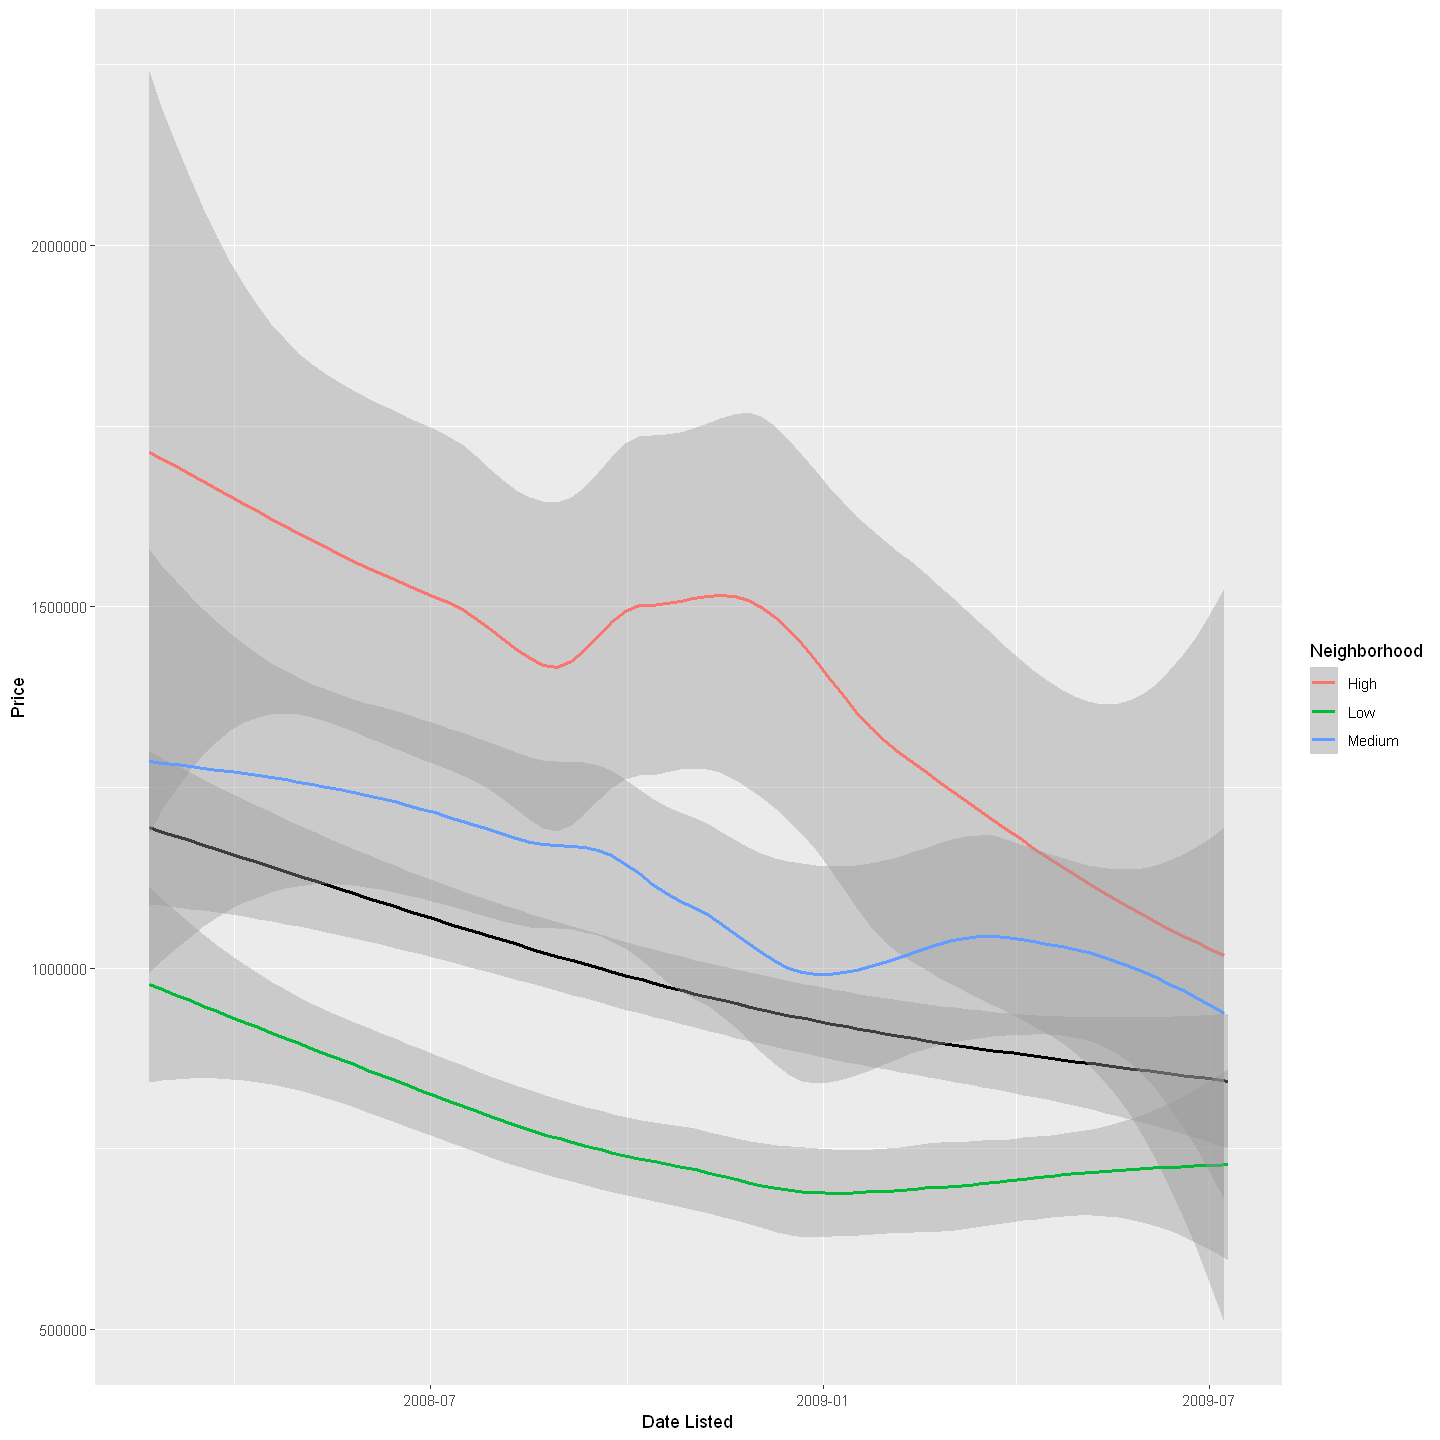

In [242]:
# Visualization
p <- ggplot(houses_df, aes(x = `Date Listed`, y = Price)) 
p <- p + geom_smooth(color = 'black')
p <- p + geom_smooth(aes(color = Neighborhood))
#p <- p +  scale_color_manual(values = c("darkred", "steelblue"))
p

In [129]:
kable(houses_df %>% summarize_if(is.numeric, funs(mean,sd,max,median,min),na.rm = T) %>% gather(stat,val) %>% separate(stat,into = c("var","stat"), sep = "_") %>% spread(stat, val) %>% select(var,mean,sd,min,median,max), bookstabs =T, digits =2)




|var         |      mean|        sd|       min|    median|        max|
|:-----------|---------:|---------:|---------:|---------:|----------:|
|Bedrooms    |      1.62|      1.81|      0.00|      2.00|      18.00|
|Days listed |    280.17|    136.33|     38.00|    293.00|     544.00|
|ID          |    698.50|    403.13|      1.00|    698.50|    1396.00|
|Loft        |      0.46|      0.50|      0.00|      0.00|       1.00|
|Lotsize     |   3011.19|   1580.29|    418.00|   2596.00|   14727.00|
|PPLOTSIZ    |    368.89|    258.25|     19.06|    296.57|    2454.55|
|PPSQM       |    596.95|    303.27|     37.28|    548.61|    2742.78|
|Price       | 976741.40| 710879.73| 100000.00| 800000.00| 9500000.00|
|Square feet |   1767.85|   1022.20|    410.00|   1476.50|   12430.00|
|Year        |   1932.12|     24.85|   1870.00|   1928.00|    2008.00|
|Zip Code    |  94119.71|      8.05|  94100.00|  94118.00|   94134.00|

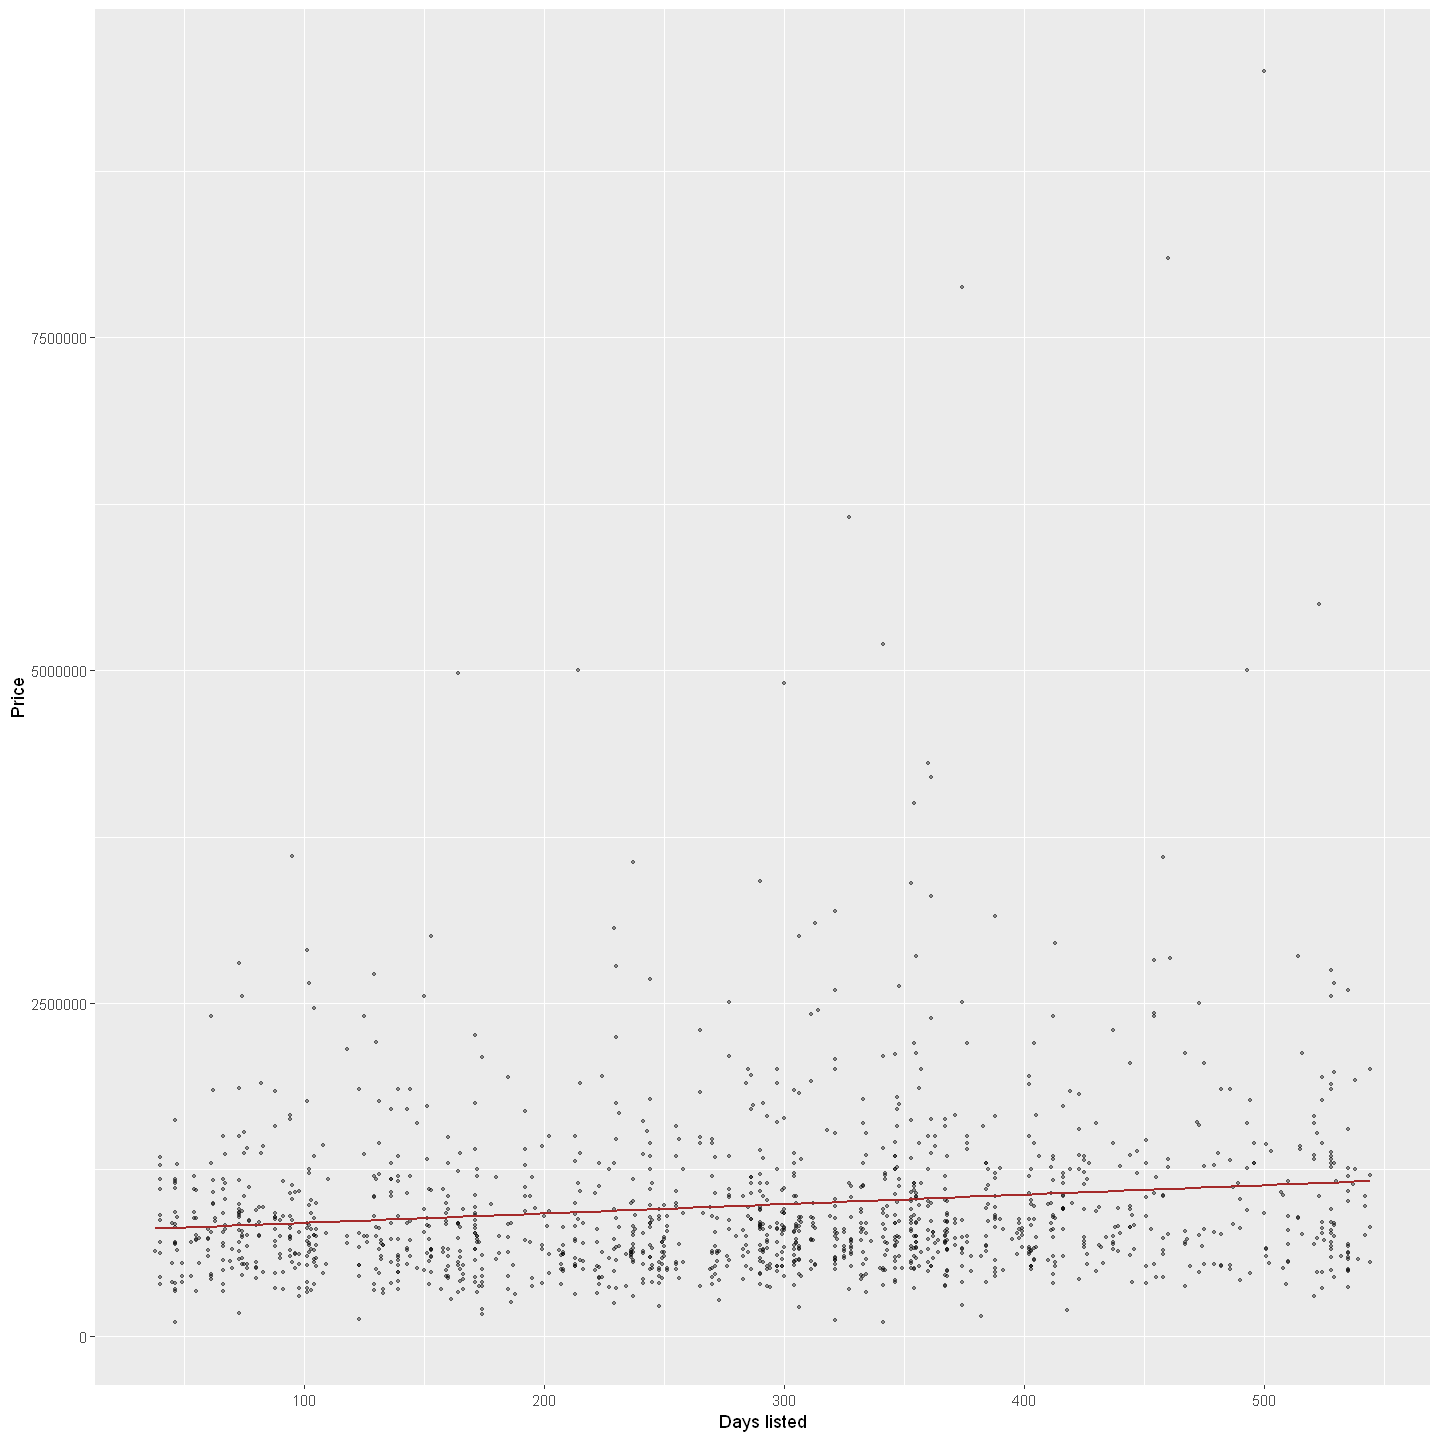

In [130]:
my.formula <- y ~ x
p <- ggplot(houses_df, aes(`Days listed`,Price))
p <- p + geom_point(size=0.8, alpha=0.4)
p <- p + geom_smooth(method="lm", formula = my.formula, se=FALSE, color="brown", size=0.6)
#p <- p + stat_poly_eq(formula = my.formula,aes(label = paste(..eq.label.., ..rr.label.., sep = "~~~")), parse = TRUE)
p

In [131]:
mod <- lm(Price~PPSQM , data=houses_df)
summary(mod)


Call:
lm(formula = Price ~ PPSQM, data = houses_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1791712  -293917  -106778   145247  7428623 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 168599.06   34315.45   4.913    1e-06 ***
PPSQM         1353.78      51.25  26.413   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 580500 on 1394 degrees of freedom
Multiple R-squared:  0.3335,	Adjusted R-squared:  0.3331 
F-statistic: 697.7 on 1 and 1394 DF,  p-value: < 2.2e-16


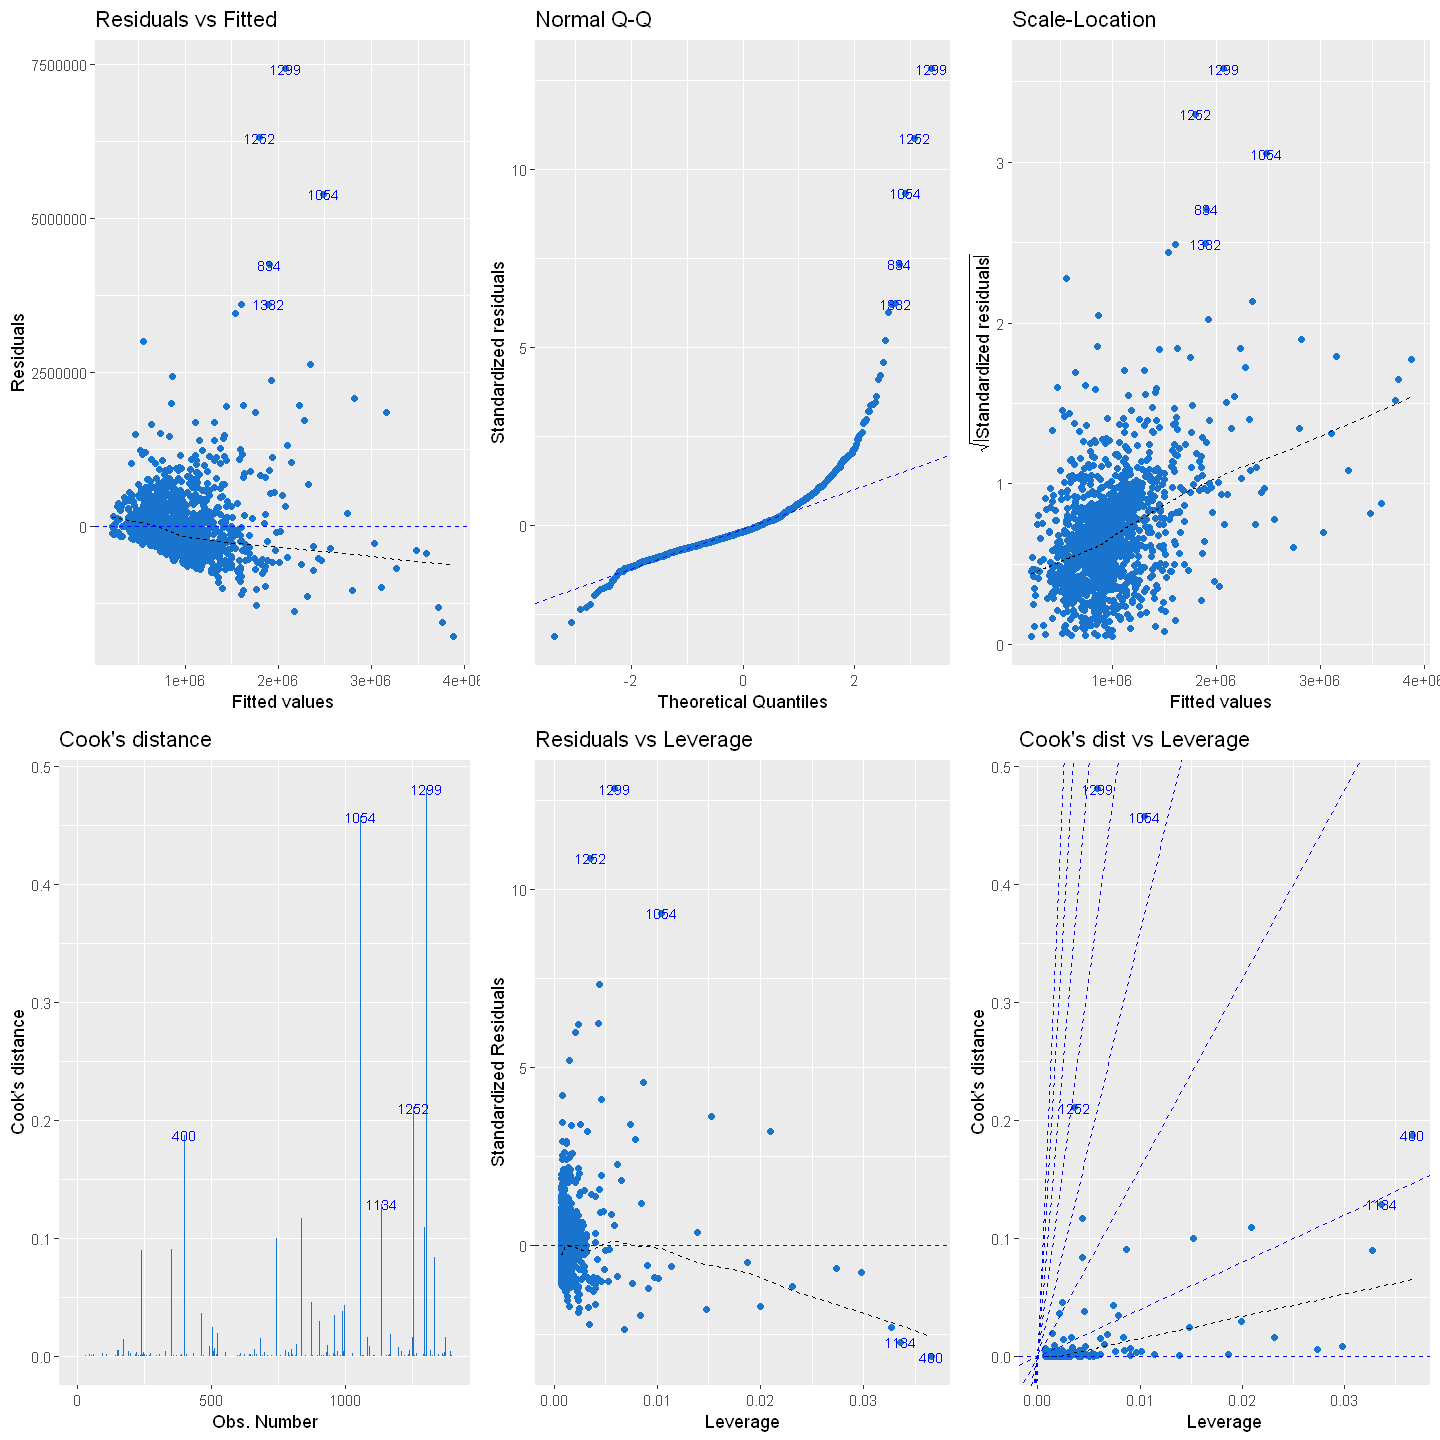

In [132]:
#install.packages('ggfortify')
library(ggfortify)
autoplot(mod, which =1:6, colour='dodgerblue3', smooth.colour = 'black', smooth.linetype = 'dashed', ad.colour = 'blue',
        label.size=3, label.n = 5, label.colour = 'blue', ncol = 3)

In [133]:
mod <- lm(Price~ PPSQM + PPLOTSIZ , data=MID_houses_df)
summary(mod)


Call:
lm(formula = Price ~ PPSQM + PPLOTSIZ, data = MID_houses_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2304865  -262254   -35452   178979  7059427 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9820.06   66937.27   0.147    0.883    
PPSQM         524.57      98.72   5.314 1.68e-07 ***
PPLOTSIZ     1861.19     129.10  14.417  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 561900 on 458 degrees of freedom
Multiple R-squared:  0.462,	Adjusted R-squared:  0.4597 
F-statistic: 196.7 on 2 and 458 DF,  p-value: < 2.2e-16


In [134]:
mod <- lm(Price~ PPSQM + PPLOTSIZ , data=LO_houses_df)
summary(mod)


Call:
lm(formula = Price ~ PPSQM + PPLOTSIZ, data = LO_houses_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1224459  -138540   -34948    94478  3763024 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1033.62   30186.70  -0.034    0.973    
PPSQM         634.50      58.92  10.768   <2e-16 ***
PPLOTSIZ     1556.59      83.13  18.725   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 293400 on 713 degrees of freedom
Multiple R-squared:  0.5403,	Adjusted R-squared:  0.539 
F-statistic: 419.1 on 2 and 713 DF,  p-value: < 2.2e-16


In [135]:
mod <- lm(Price~ PPSQM + PPLOTSIZ , data=HI_houses_df)
summary(mod)


Call:
lm(formula = Price ~ PPSQM + PPLOTSIZ, data = HI_houses_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2412934  -324316   -51784   200688  3989534 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 196890.4    96387.5   2.043   0.0423 *  
PPSQM          619.0      131.0   4.724 4.17e-06 ***
PPLOTSIZ      1291.8      141.3   9.139  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 698000 on 216 degrees of freedom
Multiple R-squared:  0.5202,	Adjusted R-squared:  0.5158 
F-statistic: 117.1 on 2 and 216 DF,  p-value: < 2.2e-16


In [136]:
names(houses_df)

[1] "ID"           "Address"      "Zip Code"     "Date Listed"  "Days listed" 
 [6] "Price"        "Bedrooms"     "Loft"         "Square feet"  "Lotsize"     
[11] "Year"         "Neighborhood" "PPSQM"        "PPLOTSIZ"

In [137]:
mod <- lm(Price~ as.factor(`Zip Code`)+ `Days listed`+Bedrooms+`Square feet`+ Lotsize+as.factor(Year) + as.factor(Neighborhood)+PPSQM + PPLOTSIZ, data=houses_df)
summary(mod)


Call:
lm(formula = Price ~ as.factor(`Zip Code`) + `Days listed` + 
    Bedrooms + `Square feet` + Lotsize + as.factor(Year) + as.factor(Neighborhood) + 
    PPSQM + PPLOTSIZ, data = houses_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2240093   -67359    16885    92010  4076366 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -9.546e+05  4.453e+05  -2.143   0.0323 *  
as.factor(`Zip Code`)94102    -8.765e+04  3.464e+05  -0.253   0.8003    
as.factor(`Zip Code`)94103     7.124e+04  3.449e+05   0.207   0.8364    
as.factor(`Zip Code`)94107     1.201e+05  3.355e+05   0.358   0.7204    
as.factor(`Zip Code`)94108    -3.675e+05  3.591e+05  -1.023   0.3063    
as.factor(`Zip Code`)94109    -2.899e+05  3.364e+05  -0.862   0.3891    
as.factor(`Zip Code`)94110    -4.465e+04  3.329e+05  -0.134   0.8933    
as.factor(`Zip Code`)94111     1.295e+05  4.880e+05   0.265   0.7908    
as.factor(`Zip Code`)94112   

In [138]:
# Predict values based on model and calculate Residuals

houses_df$pred <- predict(mod, data = houses_df)
houses_df$resid <- houses_df$Price - houses_df$pred
head(houses_df)



ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood,PPSQM,PPLOTSIZ,pred,resid
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,754 Monterey Boulevard,94127,2009-07-10,38,633000,0,1,1124,2500,1924,Low,563.1673,253.2000,465197.9,167802.078
2,66 Winfield Street,94110,2009-07-08,40,1100000,3,0,2396,1750,1900,Medium,459.0985,628.5714,1176389.0,-76389.027
3,715 Holloway Avenue,94112,2009-07-08,40,440000,0,1,625,2495,1923,Low,704.0000,176.3527,442493.1,-2493.077
4,14 Walter Street,94114,2009-07-08,40,1345000,0,1,3384,2474,1907,High,397.4586,543.6540,1274198.5,70801.476
5,2535 45th Avenue,94116,2009-07-08,40,700000,3,0,1690,3000,1947,Medium,414.2012,233.3333,668705.7,31294.329
6,109 Germania Street,94117,2009-07-08,40,620000,0,1,2050,1300,1900,Medium,302.4390,476.9231,707532.1,-87532.123


Warning message:
"not plotting observations with leverage one:
  182, 490, 500, 525, 712, 775, 777, 885, 1099, 1106, 1142, 1144, 1223, 1234, 1240, 1283, 1325"
Warning message:
"Removed 17 rows containing missing values (geom_segment)."
Warning message:
"Removed 17 rows containing missing values (geom_point)."
Warning message:
"Removed 17 rows containing missing values (geom_point)."
Warning message:
"Removed 25 row(s) containing missing values (geom_path)."


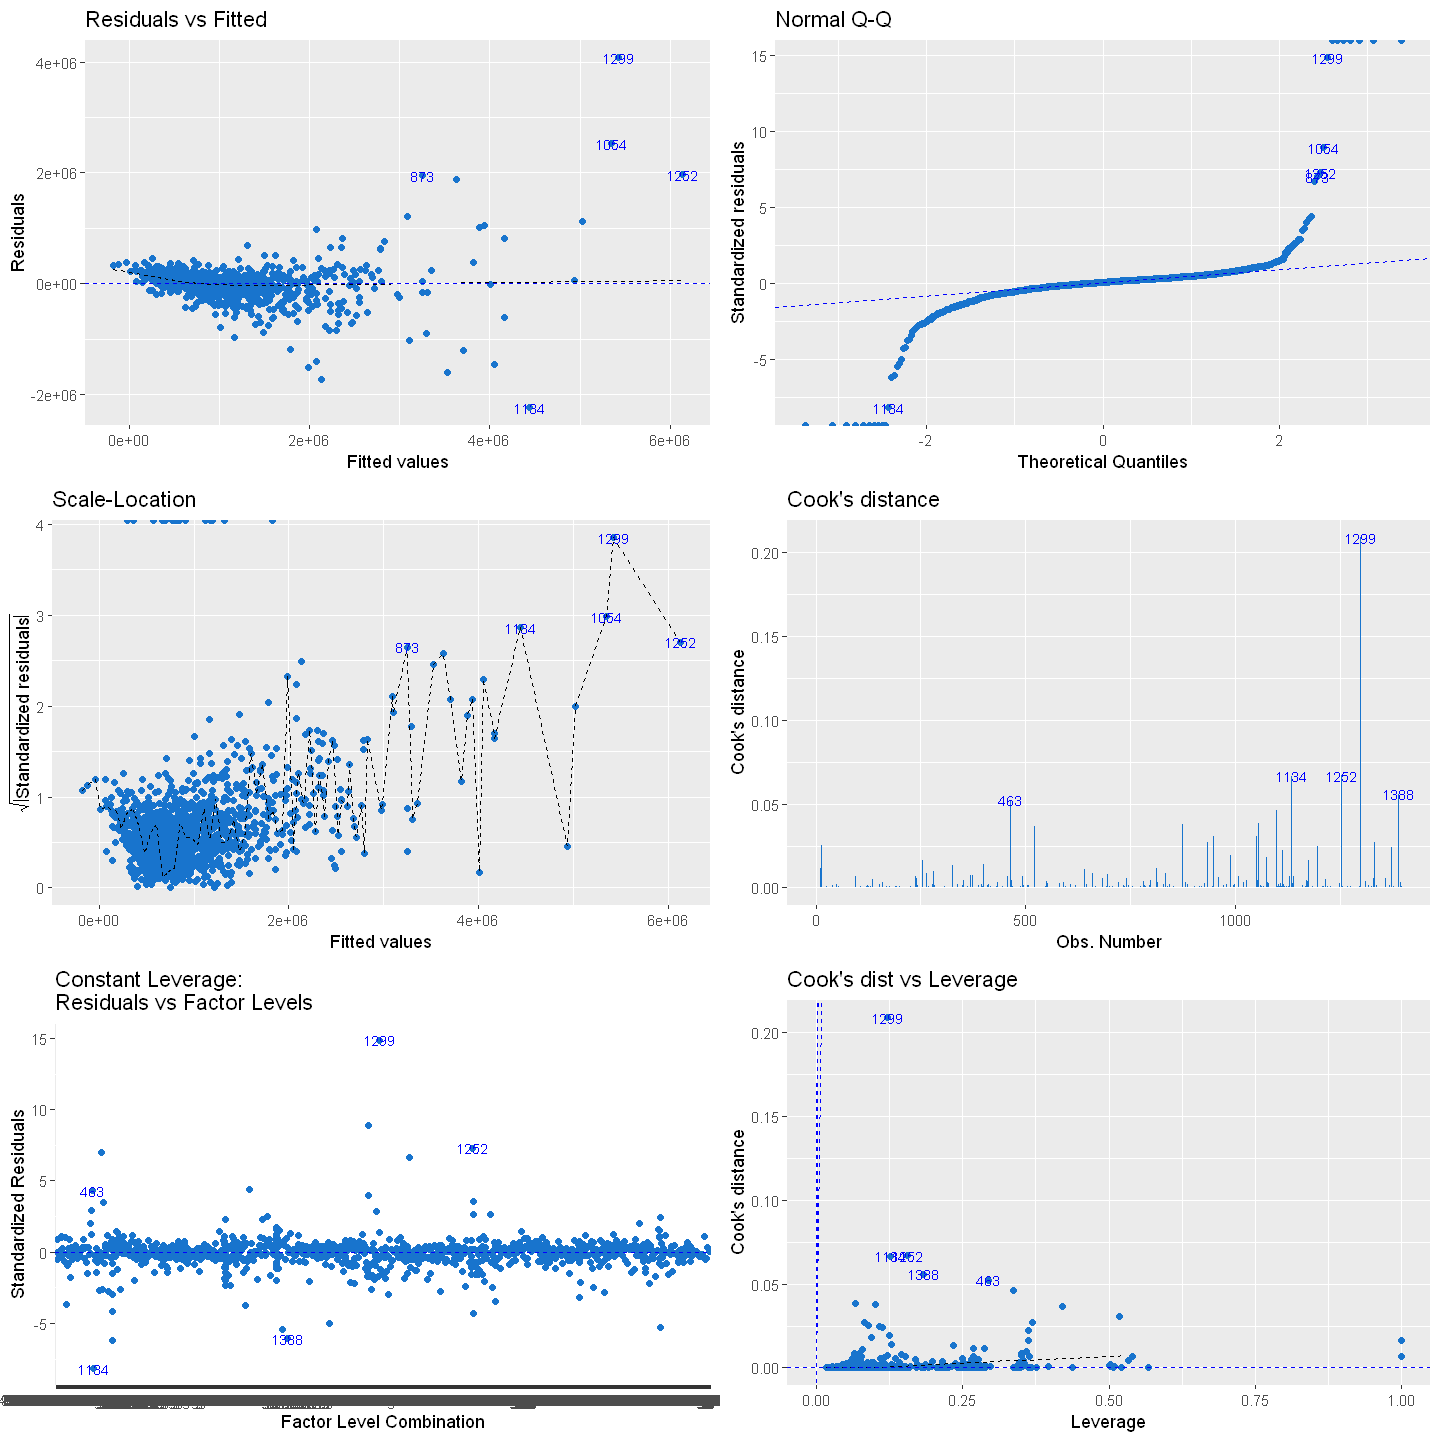

In [139]:
autoplot(mod, which =1:6, colour='dodgerblue3', smooth.colour = 'black', smooth.linetype = 'dashed', ad.colour = 'blue',
        label.size=3, label.n = 5, label.colour = 'blue', ncol = 2)

In [140]:
# Calculate quantiles of Residuals
stats::quantile(houses_df$resid)

#hist(d$resid, xlab = "Residuals", main = "")
# Show mean
#paste(c("Error mean", mean(d$resid)))

0%         25%         50%         75%        100% 
-2240093.04   -67358.73    16885.44    92009.52  4076365.60

Warning message:
"not plotting observations with leverage one:
  182, 490, 500, 525, 712, 775, 777, 885, 1099, 1106, 1142, 1144, 1223, 1234, 1240, 1283, 1325"


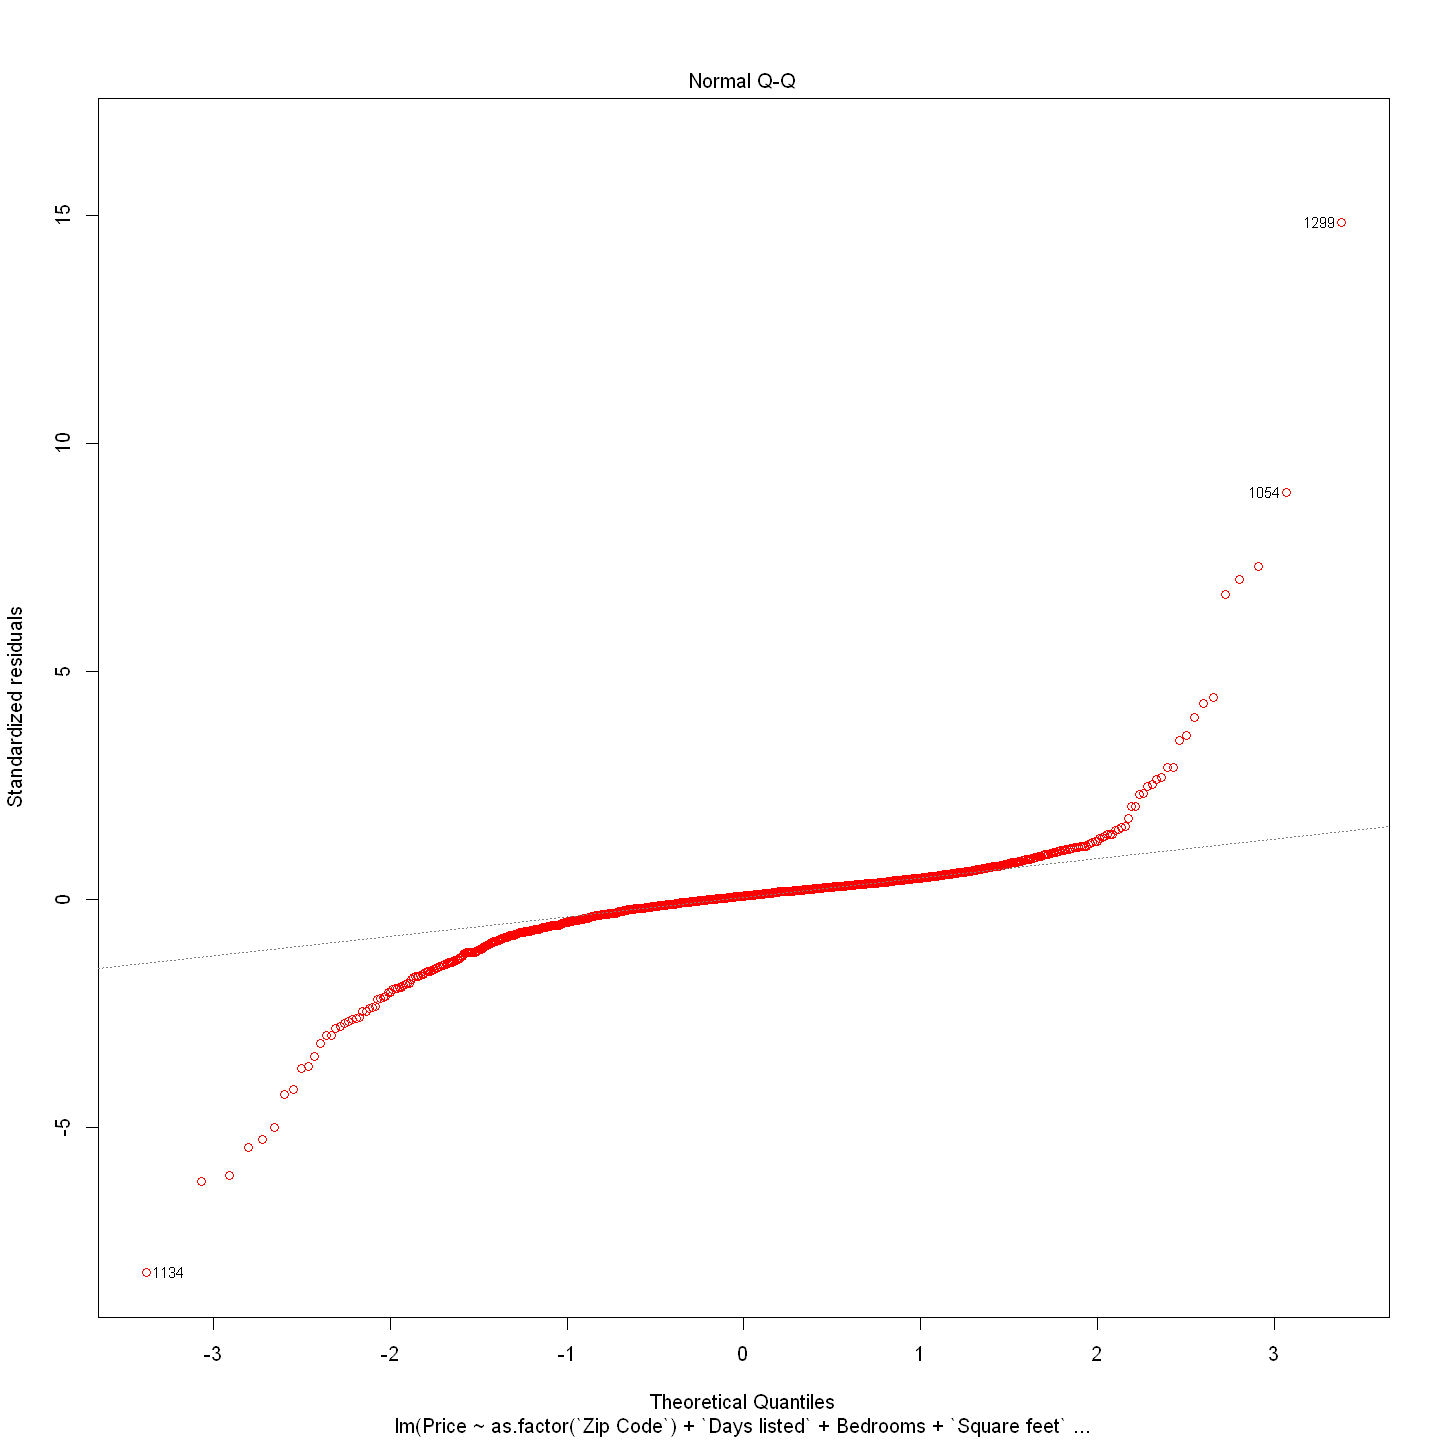

In [141]:
plot(mod, which=2, col=c("red"))  # Q-Q Plot

In [142]:
#Improving the Model
# Brand as a Factor

#d <- select(smart2,weight:release, brand)
#mod <- lm(price ~ weight+mem+ram+camera+battery+vol+size+ppi+release+as.factor(brand), data = d)
#summary(mod)

# CUrvilinear models
#mod <- lm(price~ppi+I(ppi^2), data = d)
#summary(mod)

In [143]:
extractAIC(mod)

[1]   147.00 35283.11

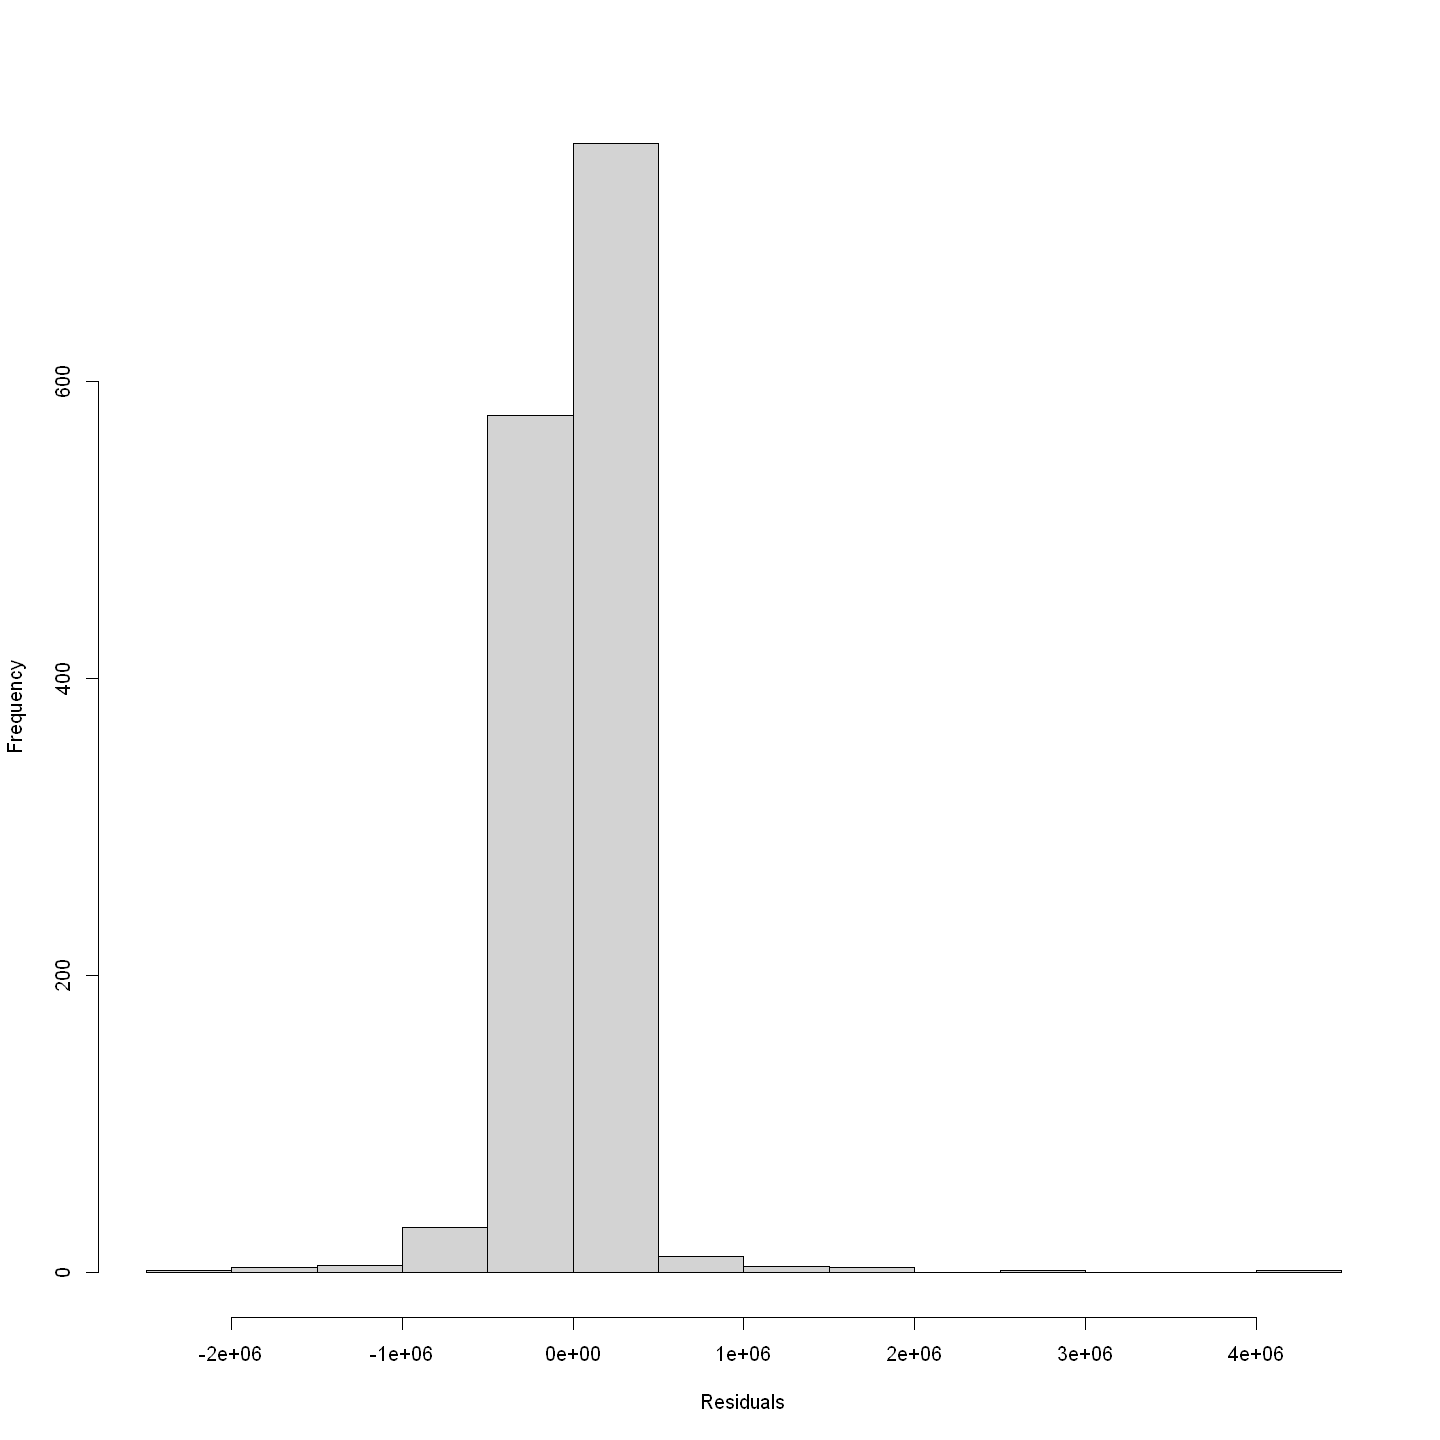

In [144]:
hist(houses_df$resid, xlab = "Residuals", main = "")

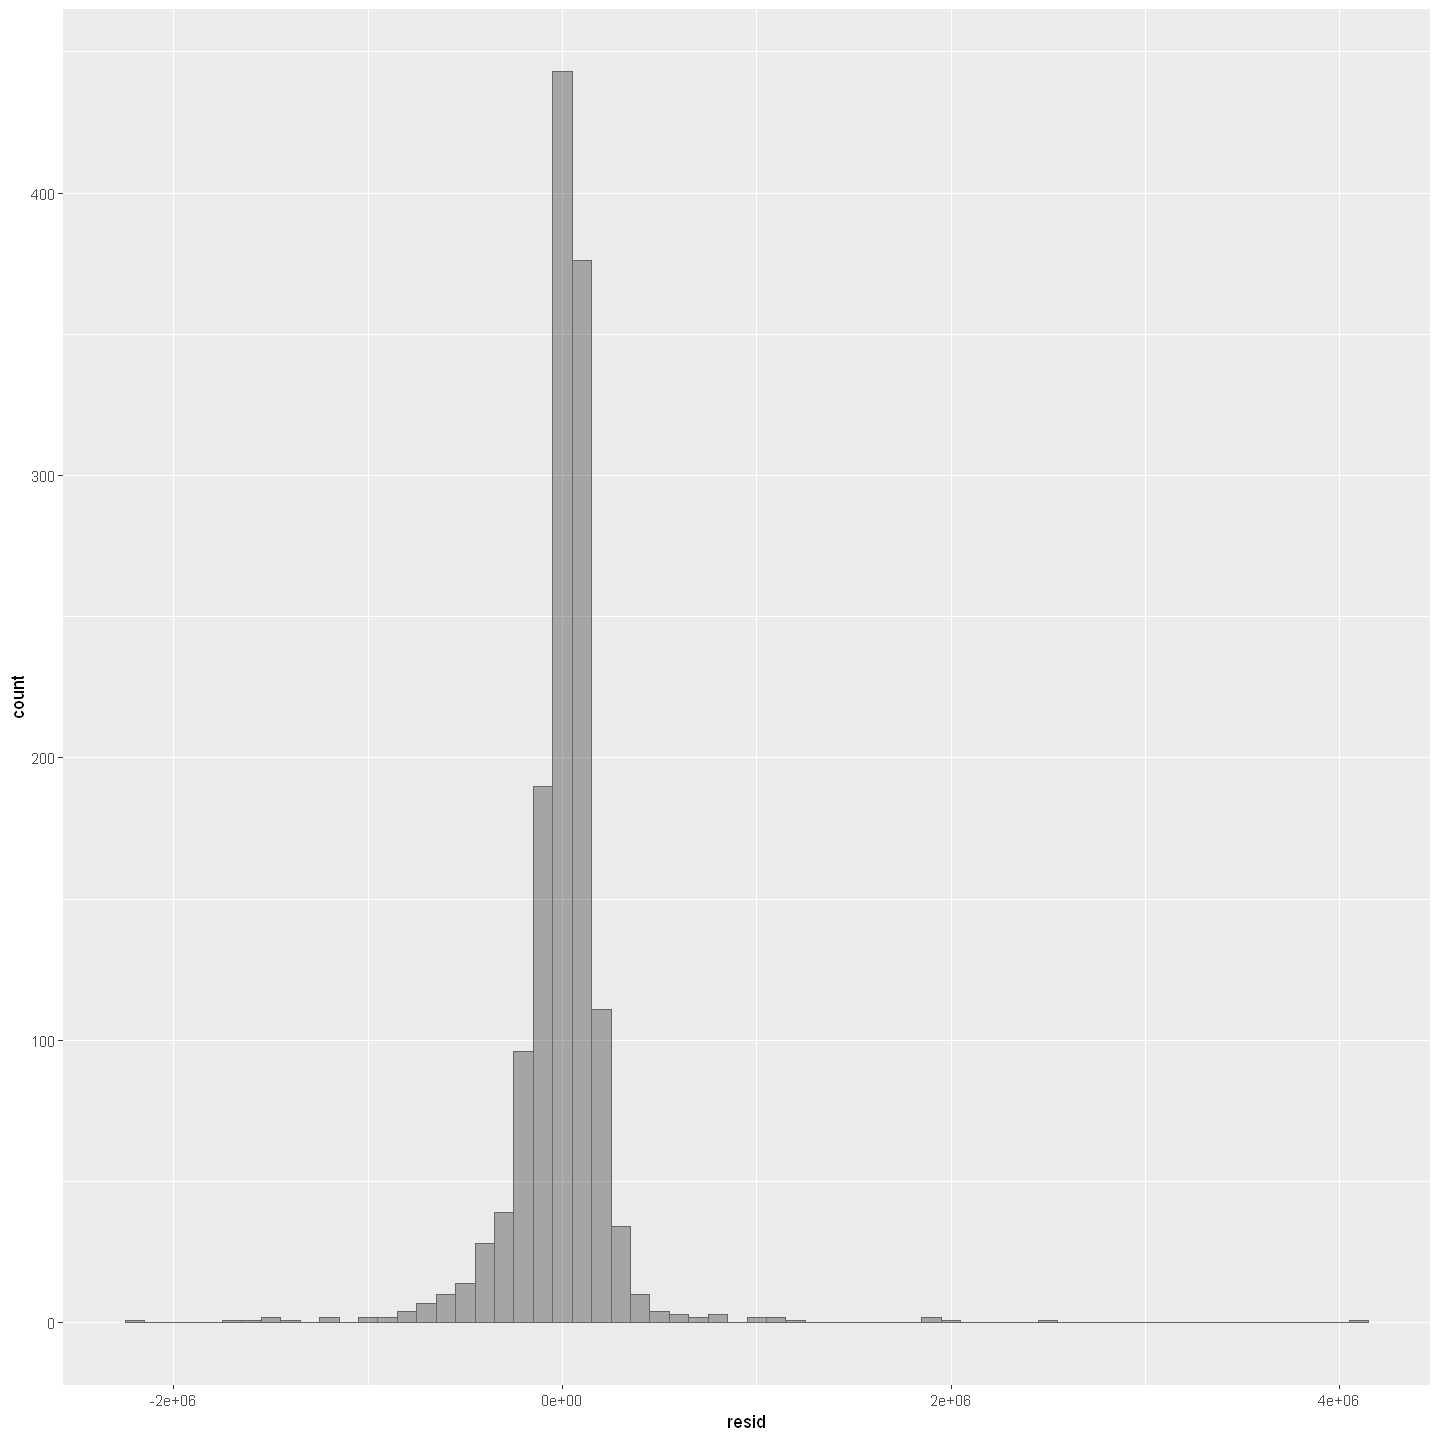

In [145]:
ggplot(houses_df, aes(resid)) + geom_histogram(binwidth = 100000, fill="black", color="grey40", alpha=0.3)

In [146]:
# R-squared = Correlation ^2 = % of total variance explained by the model

var_pred <- var(houses_df$pred)
paste(c("var pred", var(houses_df$pred)))

[1] "var pred"         "428544123768.245"

In [147]:
houses_df%>% top_n(6, -resid)

ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood,PPSQM,PPLOTSIZ,pred,resid
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
14,1286 Treat Avenue,94110,2009-07-03,45,400000,0,1,8950,4874,1900,High,44.69274,82.06812,2132932,-1732932
1073,2282 42nd Avenue,94116,2008-07-29,384,680000,4,0,4097,13068,1946,Medium,165.97510,52.03551,2077633,-1397633
1134,2806 Van Ness Avenue,94109,2008-07-09,404,2200000,2,0,830,1024,1906,High,2650.60241,2148.43750,4440093,-2240093
1195,2211 California Street #303,94115,2008-06-13,430,485000,1,0,410,418,1911,Medium,1182.92683,1160.28708,1988821,-1503821
1373,49 Florence Street,94133,2008-02-29,535,2599000,2,0,1134,1343,1908,High,2291.88713,1935.21966,4050950,-1451950
1388,2200 Sacramento Street #1201,94115,2008-02-26,538,1920000,2,0,1133,952,1964,High,1694.61606,2016.80672,3523538,-1603538


1134, 1373, 1388

In [148]:
houses_df$ExpRet <- -houses_df$resid / houses_df$Price

houses_df%>% top_n(10, ExpRet)

ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood,PPSQM,PPLOTSIZ,pred,resid,ExpRet
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,1286 Treat Avenue,94110,2009-07-03,45,400000,0,1,8950,4874,1900,High,44.69274,82.06812,2132932.1,-1732932.1,4.332330
242,3321 17th Street #15,94110,2009-04-10,129,390000,1,0,430,523,1925,High,906.97674,745.69790,947641.8,-557641.8,1.429851
263,1217 Florida Street,94110,2009-04-07,132,600000,0,1,7656,4025,1900,High,78.36991,149.06832,1783510.7,-1183510.7,1.972518
395,3548 Fulton Street,94118,2009-02-24,174,200000,0,1,4000,2200,1920,Low,50.00000,90.90909,622094.8,-422094.8,2.110474
412,2943 Baker Street,94123,2009-02-12,186,255000,0,1,4374,2750,1915,High,58.29904,92.72727,694168.6,-439168.6,1.722230
780,1386 9th Avenue,94122,2008-10-15,306,217500,0,1,5835,2369,1923,Low,37.27506,91.81089,1004716.8,-787216.8,3.619388
875,653 5th Avenue,94118,2008-09-10,341,100000,0,1,2330,2996,1907,Low,42.91845,33.37784,293144.0,-193144.0,1.931440
1073,2282 42nd Avenue,94116,2008-07-29,384,680000,4,0,4097,13068,1946,Medium,165.97510,52.03551,2077632.9,-1397632.9,2.055343
1173,1487 McKinnon Avenue,94124,2008-06-25,418,190000,3,0,2142,9969,1907,Low,88.70215,19.05908,1159916.6,-969916.6,5.104824


In [149]:
head(houses_df[with(houses_df,order(resid)), ],10)

ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood,PPSQM,PPLOTSIZ,pred,resid,ExpRet
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1134,2806 Van Ness Avenue,94109,2008-07-09,404,2200000,2,0,830,1024,1906,High,2650.60241,2148.43750,4440093,-2240093.0,1.0182241
14,1286 Treat Avenue,94110,2009-07-03,45,400000,0,1,8950,4874,1900,High,44.69274,82.06812,2132932,-1732932.1,4.3323303
1388,2200 Sacramento Street #1201,94115,2008-02-26,538,1920000,2,0,1133,952,1964,High,1694.61606,2016.80672,3523538,-1603537.6,0.8351758
1195,2211 California Street #303,94115,2008-06-13,430,485000,1,0,410,418,1911,Medium,1182.92683,1160.28708,1988821,-1503821.1,3.1006621
1373,49 Florence Street,94133,2008-02-29,535,2599000,2,0,1134,1343,1908,High,2291.88713,1935.21966,4050950,-1451949.8,0.5586571
1073,2282 42nd Avenue,94116,2008-07-29,384,680000,4,0,4097,13068,1946,Medium,165.97510,52.03551,2077633,-1397632.9,2.0553425
640,2683 Green Street,94123,2008-11-13,277,2505000,4,0,1900,1320,1908,High,1318.42105,1897.72727,3707896,-1202896.3,0.4801981
263,1217 Florida Street,94110,2009-04-07,132,600000,0,1,7656,4025,1900,High,78.36991,149.06832,1783511,-1183510.7,1.9725178
400,565 Clipper Street,94114,2009-02-24,174,2090000,0,1,762,2735,1921,Medium,2742.78215,764.16819,3107180,-1017180.2,0.4866891


In [150]:
head(houses_df[with(houses_df,order(-ExpRet)), ],10)

ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood,PPSQM,PPLOTSIZ,pred,resid,ExpRet
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1173,1487 McKinnon Avenue,94124,2008-06-25,418,190000,3,0,2142,9969,1907,Low,88.70215,19.05908,1159916.6,-969916.6,5.104824
14,1286 Treat Avenue,94110,2009-07-03,45,400000,0,1,8950,4874,1900,High,44.69274,82.06812,2132932.1,-1732932.1,4.332330
780,1386 9th Avenue,94122,2008-10-15,306,217500,0,1,5835,2369,1923,Low,37.27506,91.81089,1004716.8,-787216.8,3.619388
1195,2211 California Street #303,94115,2008-06-13,430,485000,1,0,410,418,1911,Medium,1182.92683,1160.28708,1988821.1,-1503821.1,3.100662
395,3548 Fulton Street,94118,2009-02-24,174,200000,0,1,4000,2200,1920,Low,50.00000,90.90909,622094.8,-422094.8,2.110474
1073,2282 42nd Avenue,94116,2008-07-29,384,680000,4,0,4097,13068,1946,Medium,165.97510,52.03551,2077632.9,-1397632.9,2.055343
263,1217 Florida Street,94110,2009-04-07,132,600000,0,1,7656,4025,1900,High,78.36991,149.06832,1783510.7,-1183510.7,1.972518
875,653 5th Avenue,94118,2008-09-10,341,100000,0,1,2330,2996,1907,Low,42.91845,33.37784,293144.0,-193144.0,1.931440
412,2943 Baker Street,94123,2009-02-12,186,255000,0,1,4374,2750,1915,High,58.29904,92.72727,694168.6,-439168.6,1.722230


In [151]:
names(houses_df)

[1] "ID"           "Address"      "Zip Code"     "Date Listed"  "Days listed" 
 [6] "Price"        "Bedrooms"     "Loft"         "Square feet"  "Lotsize"     
[11] "Year"         "Neighborhood" "PPSQM"        "PPLOTSIZ"     "pred"        
[16] "resid"        "ExpRet"

In [152]:
houses_df_num <- select(houses_df,ID:Neighborhood)
names(houses_df_num)

[1] "ID"           "Address"      "Zip Code"     "Date Listed"  "Days listed" 
 [6] "Price"        "Bedrooms"     "Loft"         "Square feet"  "Lotsize"     
[11] "Year"         "Neighborhood"

In [153]:
houses_df_num$Neighborhood <- as.factor(houses_df_num$Neighborhood)
head(houses_df_num)

ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,754 Monterey Boulevard,94127,2009-07-10,38,633000,0,1,1124,2500,1924,Low
2,66 Winfield Street,94110,2009-07-08,40,1100000,3,0,2396,1750,1900,Medium
3,715 Holloway Avenue,94112,2009-07-08,40,440000,0,1,625,2495,1923,Low
4,14 Walter Street,94114,2009-07-08,40,1345000,0,1,3384,2474,1907,High
5,2535 45th Avenue,94116,2009-07-08,40,700000,3,0,1690,3000,1947,Medium
6,109 Germania Street,94117,2009-07-08,40,620000,0,1,2050,1300,1900,Medium


In [154]:
houses_df_num$`Zip Code` <- as.factor(houses_df_num$`Zip Code`)
head(houses_df_num)

ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood
<dbl>,<chr>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,754 Monterey Boulevard,94127,2009-07-10,38,633000,0,1,1124,2500,1924,Low
2,66 Winfield Street,94110,2009-07-08,40,1100000,3,0,2396,1750,1900,Medium
3,715 Holloway Avenue,94112,2009-07-08,40,440000,0,1,625,2495,1923,Low
4,14 Walter Street,94114,2009-07-08,40,1345000,0,1,3384,2474,1907,High
5,2535 45th Avenue,94116,2009-07-08,40,700000,3,0,1690,3000,1947,Medium
6,109 Germania Street,94117,2009-07-08,40,620000,0,1,2050,1300,1900,Medium


In [155]:
houses_df_num <- select(houses_df, `Days listed`:Year)
houses_df_num_sd <- scale(houses_df_num)

In [156]:
round(cov(houses_df_num_sd),2)

,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year
Days listed,1.00,0.14,0.24,-0.31,0.00,0.13,0.03
Price,0.14,1.00,0.17,-0.06,0.47,0.21,-0.17
Bedrooms,0.24,0.17,1.00,-0.83,0.24,0.17,0.12
Loft,-0.31,-0.06,-0.83,1.00,0.05,-0.09,-0.13
Square feet,0.00,0.47,0.24,0.05,1.00,0.22,-0.12
Lotsize,0.13,0.21,0.17,-0.09,0.22,1.00,0.05
Year,0.03,-0.17,0.12,-0.13,-0.12,0.05,1.00


In [157]:
houses.pca <- prcomp(houses_df_num_sd, center = TRUE, scale. = TRUE)
summary(houses.pca)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     1.4737 1.2571 0.9872 0.9457 0.8622 0.72162 0.33908
Proportion of Variance 0.3103 0.2258 0.1392 0.1278 0.1062 0.07439 0.01642
Cumulative Proportion  0.3103 0.5360 0.6752 0.8030 0.9092 0.98358 1.00000

In [158]:
houses.pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Days listed,0.33470623,-0.1102175,0.16737046,-0.80471320,0.3542782,0.26829791,0.05244854
Price,0.29028197,0.5440306,0.07030484,-0.02665291,0.3324642,-0.70867206,0.03695065
Bedrooms,0.59901721,-0.1777389,0.10153076,0.32248615,-0.1083698,0.09196206,0.68926077
Loft,-0.54782578,0.3590733,-0.20323156,-0.15792393,0.1560199,0.14555923,0.67762862
Square feet,0.25599745,0.5681418,-0.11114216,0.30462895,0.2455999,0.62090085,-0.24635660
Lotsize,0.27137003,0.2420250,-0.61037981,-0.33425097,-0.6175801,-0.04173148,-0.01866311
Year,0.07481327,-0.3872942,-0.72836578,0.13515362,0.5349241,-0.09431990,-0.02414448


Warning message:
"Removed 13 rows containing missing values (geom_point)."


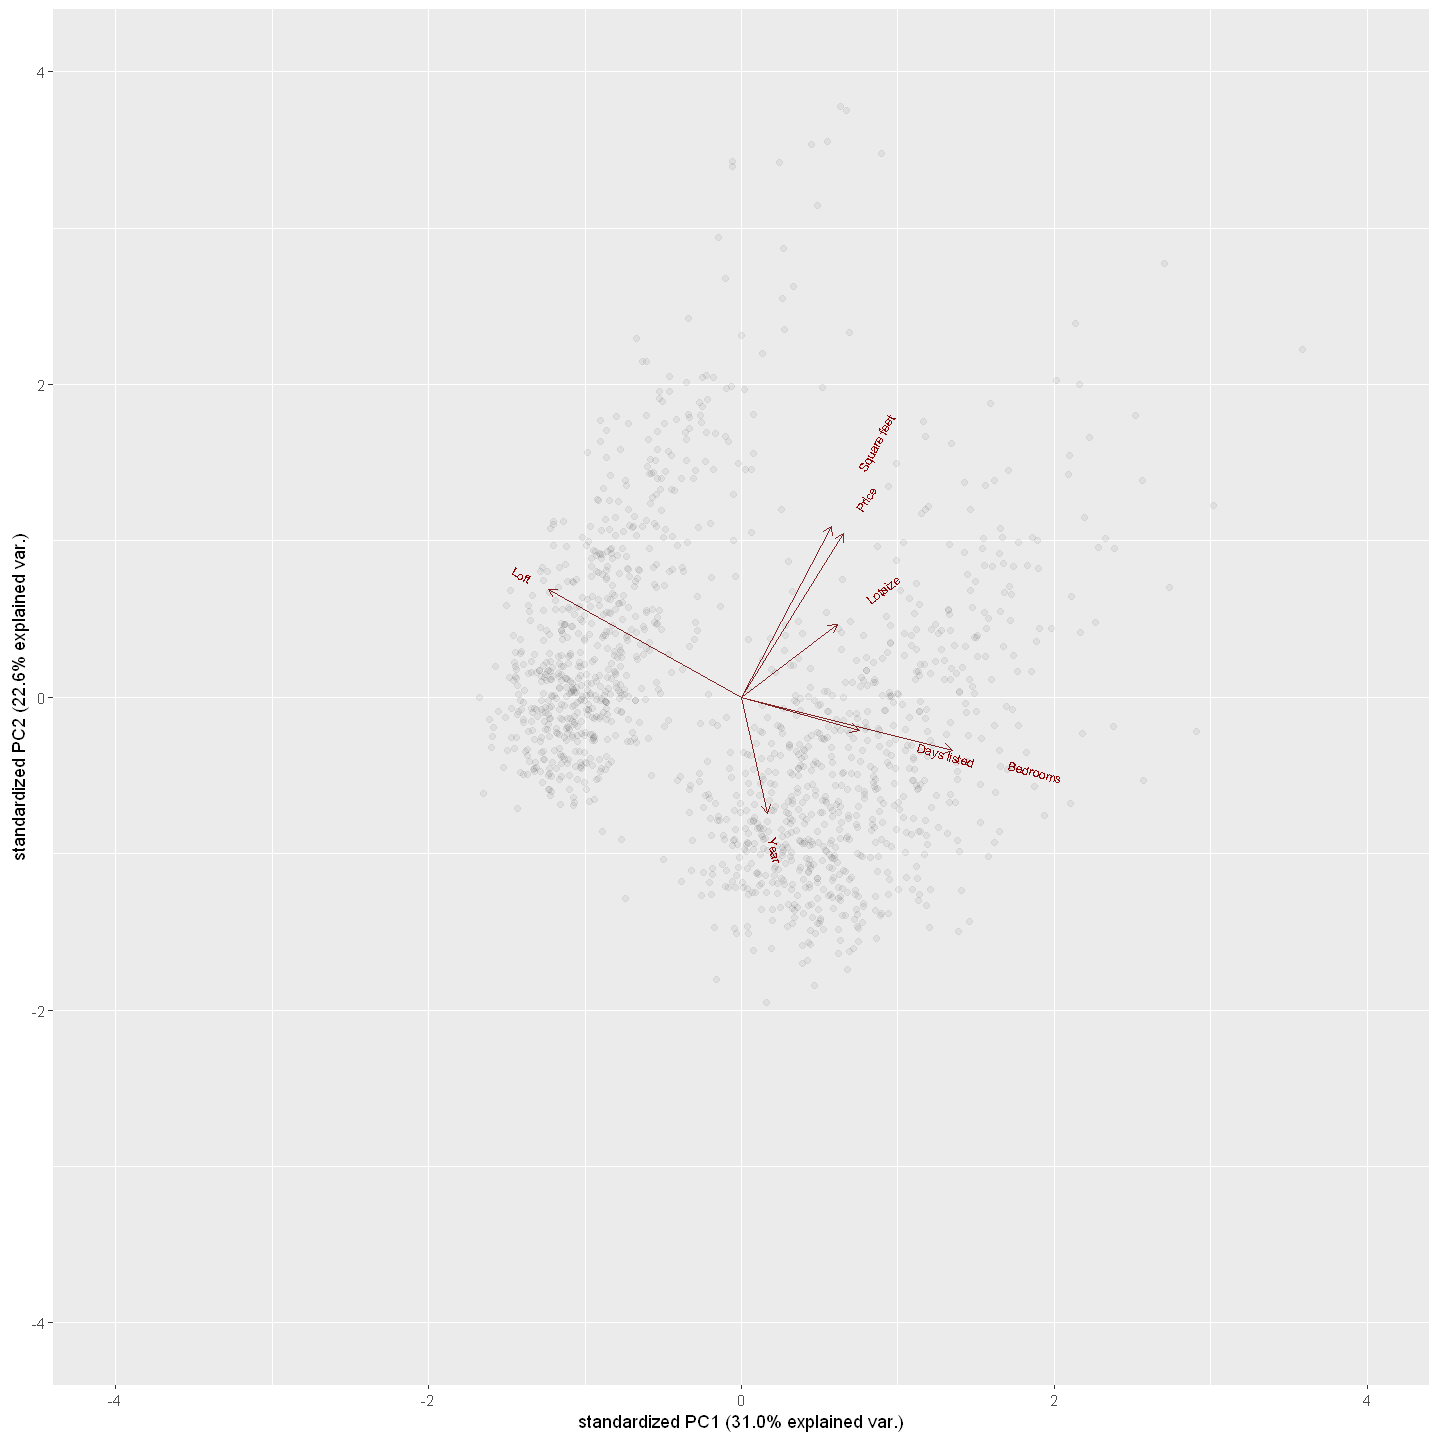

In [159]:
ggbiplot::ggbiplot(houses.pca, varname.adjust=3, varname.size=2.5, alpha=0.05, size=0.4)+ ylim(-4,4)+xlim(-4,4)

Cluster Analysis with Zip Codes

In [160]:
houses_df_num <- select(houses_df, `Zip Code`,`Days listed`:Year)
head(houses_df_num)

Zip Code,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
94127,38,633000,0,1,1124,2500,1924
94110,40,1100000,3,0,2396,1750,1900
94112,40,440000,0,1,625,2495,1923
94114,40,1345000,0,1,3384,2474,1907
94116,40,700000,3,0,1690,3000,1947
94117,40,620000,0,1,2050,1300,1900


In [161]:
ZipCodes <- houses_df_num %>% group_by(`Zip Code`) %>% dplyr::summarise(Dayslisted= mean(`Days listed`), Price = mean(Price),
                                                                       Bedrooms = mean(Bedrooms), Loft = mean(Loft), 
                                                                        Sqft = mean(`Square feet`), Lotsize = mean(Lotsize),
                                                                        Year = mean(Year))

`summarise()` ungrouping output (override with `.groups` argument)



In [162]:
head(ZipCodes)

Zip Code,Dayslisted,Price,Bedrooms,Loft,Sqft,Lotsize,Year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
94100,411.0000,795000.0,4.000000,0.0000000,1354.000,5227.000,2008.000
94102,233.6667,884916.7,2.833333,0.3333333,2630.500,3810.000,1933.000
94103,303.8000,846600.0,1.500000,0.4000000,1744.800,3034.700,1924.700
94107,286.4815,1088037.0,1.851852,0.3703704,1543.704,3326.074,1931.815
94108,272.8333,1250500.0,1.000000,0.5000000,3487.833,1808.167,1945.500
94109,317.0370,1465925.9,2.407407,0.2962963,2672.519,2463.333,1933.556


In [163]:
ZipCodes$`Zip Code` <- as.character(ZipCodes$`Zip Code`)


In [164]:
str(ZipCodes)

tibble [23 x 8] (S3: tbl_df/tbl/data.frame)
 $ Zip Code  : chr [1:23] "94100" "94102" "94103" "94107" ...
 $ Dayslisted: num [1:23] 411 234 304 286 273 ...
 $ Price     : num [1:23] 795000 884917 846600 1088037 1250500 ...
 $ Bedrooms  : num [1:23] 4 2.83 1.5 1.85 1 ...
 $ Loft      : num [1:23] 0 0.333 0.4 0.37 0.5 ...
 $ Sqft      : num [1:23] 1354 2630 1745 1544 3488 ...
 $ Lotsize   : num [1:23] 5227 3810 3035 3326 1808 ...
 $ Year      : num [1:23] 2008 1933 1925 1932 1946 ...


In [165]:
ZipCodes <- column_to_rownames(ZipCodes, var="Zip Code")

In [166]:
ZipCod.pca <- prcomp(ZipCodes,center = TRUE, scale. =TRUE)

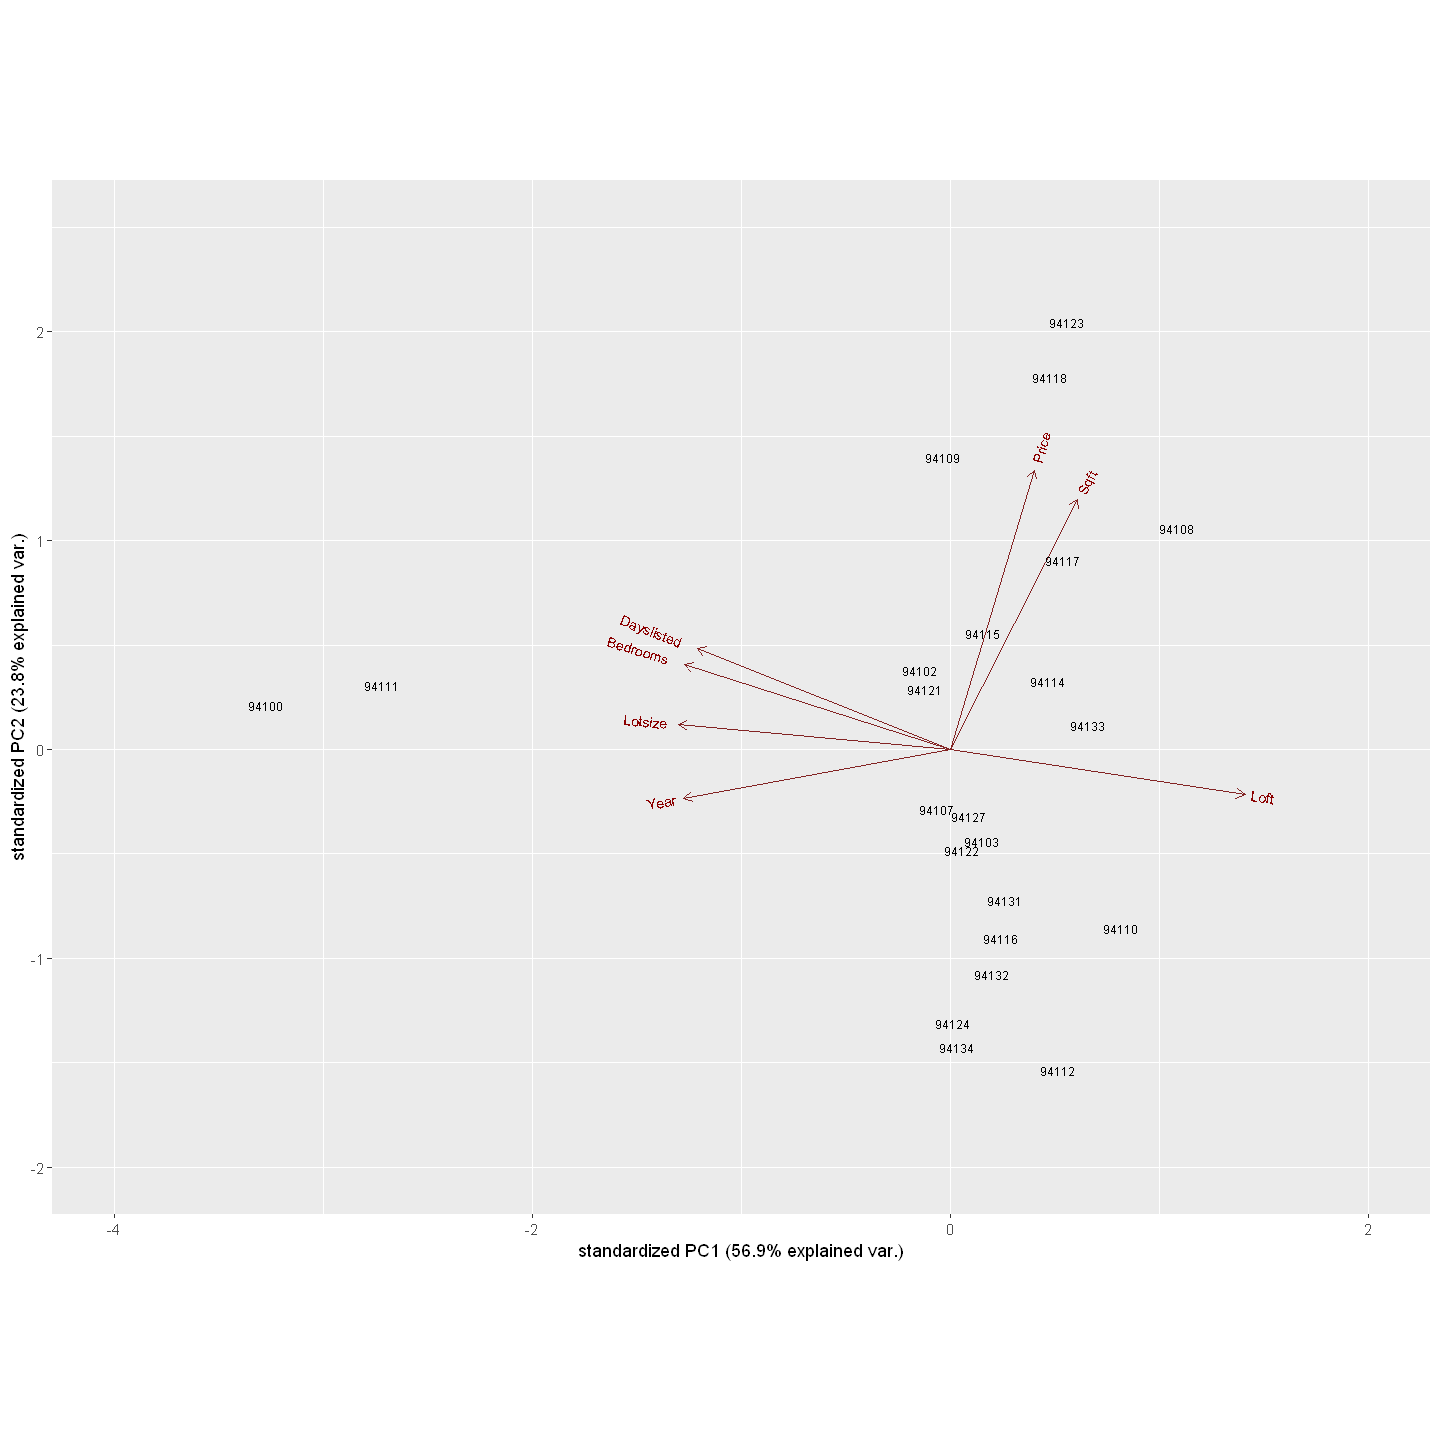

In [167]:
ggbiplot::ggbiplot(ZipCod.pca, labels=rownames(ZipCodes), labels.size=2.5, size=0.5)+ ylim(-2,2.5)+xlim(-4,2)

In [211]:
subset(houses_df, `Square feet` > 11000)

ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood,PPSQM,PPLOTSIZ,pred,resid,ExpRet
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
520,1448 Bush Street,94109,2008-12-23,237,3560000,14,0,12430,3510,1992,High,286.4039,1014.245,4166332,-606331.9,0.170318


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



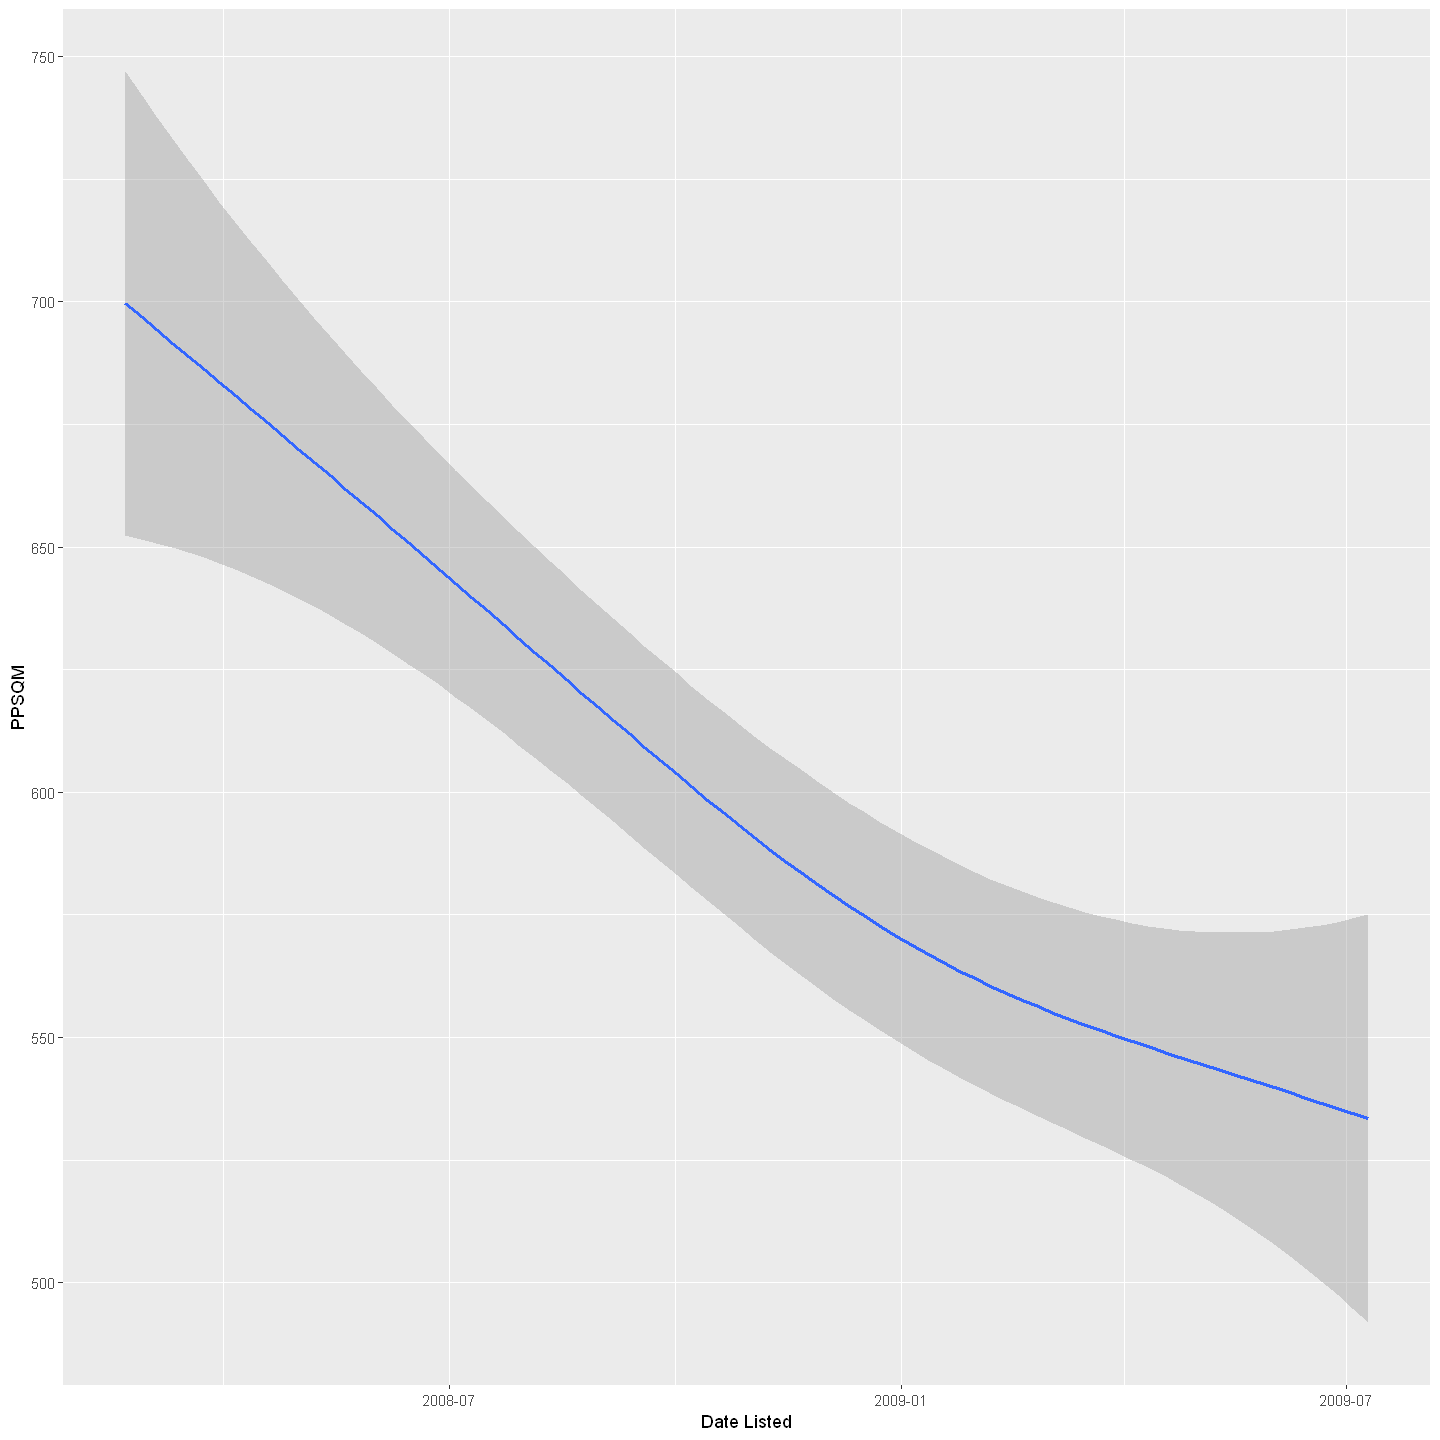

In [199]:
# Visualization
#p <- houses_df %>% group_by(`Zip Codes`) %>% 
p <- ggplot( subset(houses_df, Neighborhood = "Medium"),aes(x = `Date Listed`, y = PPSQM))  
p <- p + geom_smooth()
#p <- p + geom_smooth(aes(color = as.factor(`Zip Code`)), se = FALSE)
#p <- p +  scale_color_manual(values = c("darkred", "steelblue"))
p

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



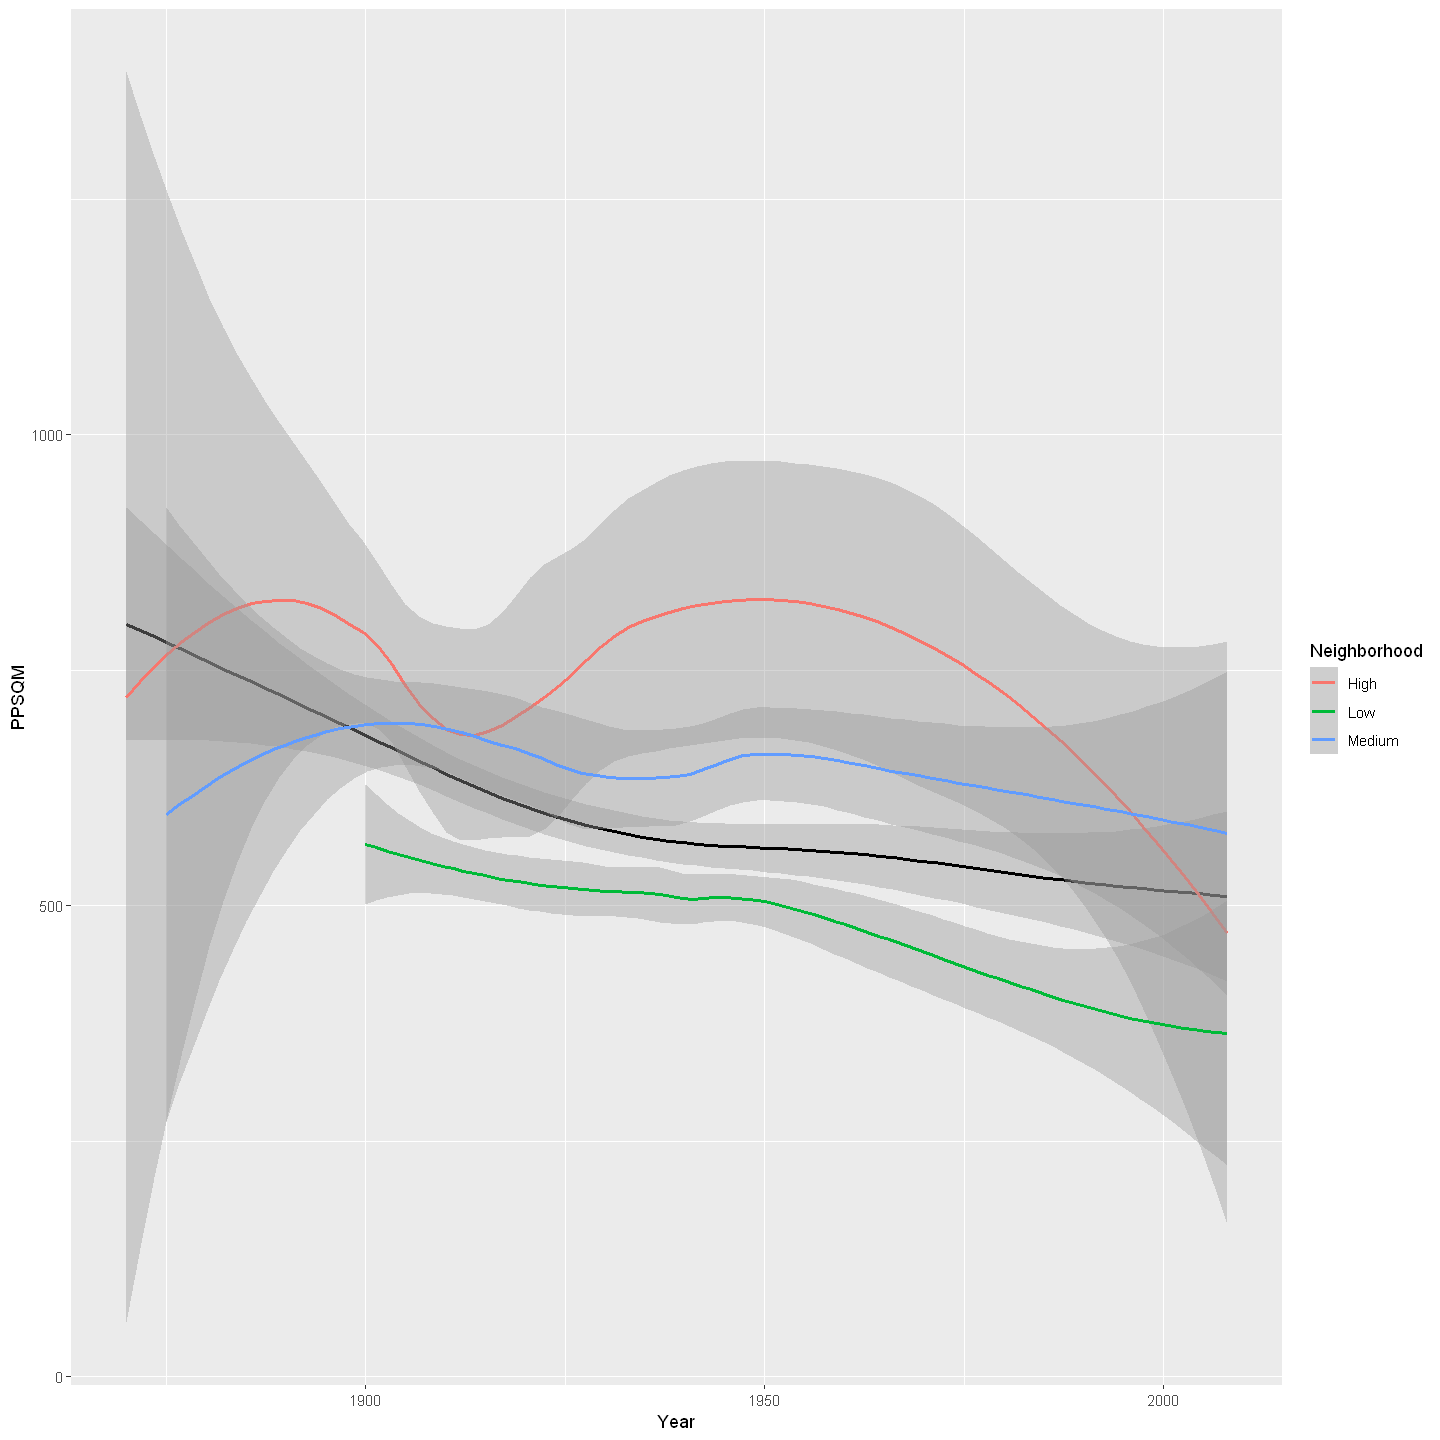

In [239]:
# Visualization
#p <- houses_df %>% group_by(`Zip Codes`) %>% 
p <- ggplot( houses_df,aes(x = Year, y = PPSQM))
p <- p + geom_smooth(color = 'black')
p <- p + geom_smooth(aes(color = Neighborhood))
#p <- p + geom_smooth(aes(color = as.factor(`Zip Code`)), se = FALSE)
#p <- p +  scale_color_manual(values = c("darkred", "steelblue"))
p

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



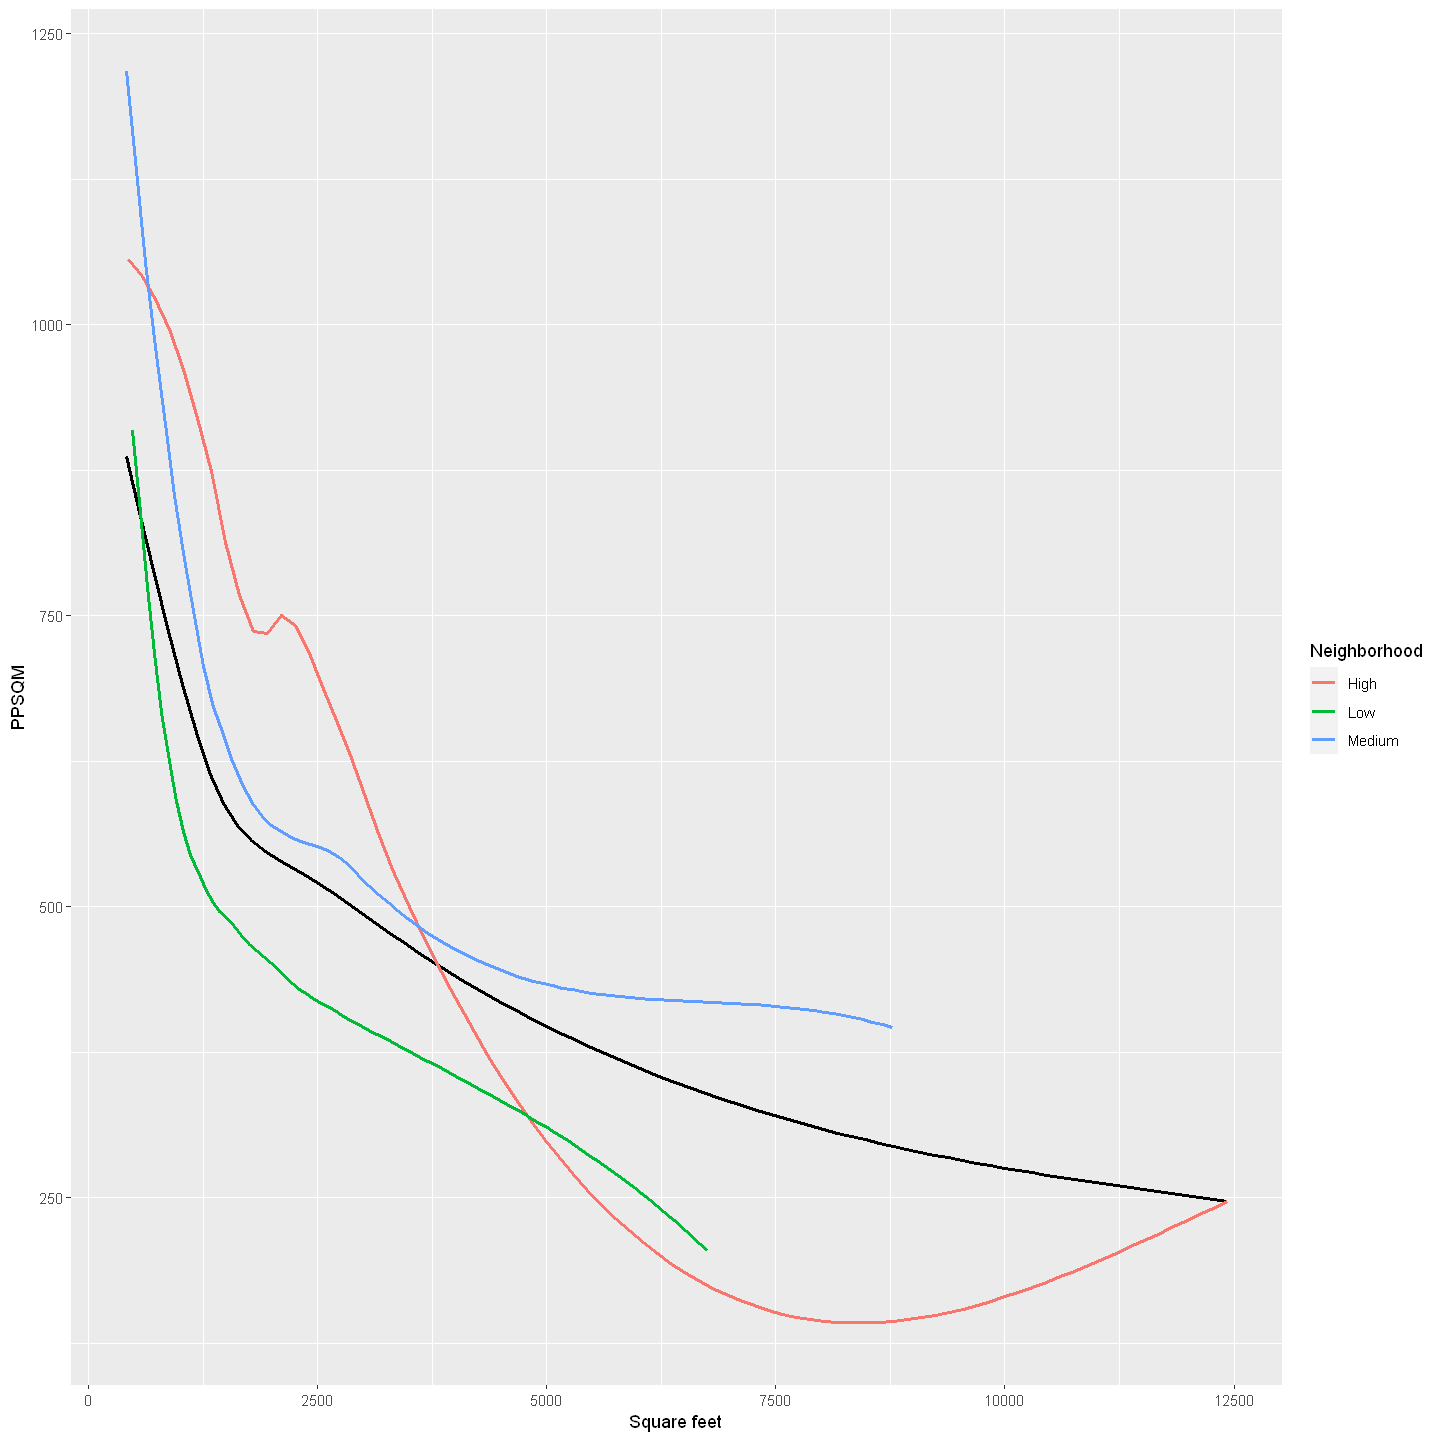

In [296]:
# Visualization
#p <- houses_df %>% group_by(`Zip Codes`) %>% 
p <- ggplot( houses_df,aes(x = `Square feet`, y = PPSQM))  
p <- p + geom_smooth(color = 'black', se=FALSE)
p <- p + geom_smooth(aes(color = Neighborhood), se=FALSE)
#p <- p + geom_smooth(aes(color = as.factor(`Zip Code`)), se = FALSE)
#p <- p +  scale_color_manual(values = c("darkred", "steelblue"))
p

In [212]:
mod <- lm(PPSQM~ Price + as.factor(`Zip Code`)+ `Days listed`+Bedrooms+`Square feet`+ Lotsize+as.factor(Year) + as.factor(Neighborhood) + PPLOTSIZ, data=houses_df)
summary(mod)


Call:
lm(formula = PPSQM ~ Price + as.factor(`Zip Code`) + `Days listed` + 
    Bedrooms + `Square feet` + Lotsize + as.factor(Year) + as.factor(Neighborhood) + 
    PPLOTSIZ, data = houses_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-828.56  -64.12  -11.91   45.26 1298.27 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    5.689e+02  2.295e+02   2.479  0.01332 *  
Price                          2.515e-04  1.274e-05  19.735  < 2e-16 ***
as.factor(`Zip Code`)94102    -1.358e+02  1.786e+02  -0.760  0.44740    
as.factor(`Zip Code`)94103    -1.118e+02  1.779e+02  -0.629  0.52964    
as.factor(`Zip Code`)94107     1.803e+01  1.730e+02   0.104  0.91702    
as.factor(`Zip Code`)94108     1.091e+02  1.852e+02   0.589  0.55607    
as.factor(`Zip Code`)94109     8.884e+01  1.735e+02   0.512  0.60879    
as.factor(`Zip Code`)94110    -4.169e+00  1.717e+02  -0.024  0.98063    
as.factor(`Zip Code`)94111    -1.684e+0

In [220]:
houses_df$pred_PPSQF <- predict(mod, data = houses_df)
houses_df$pred_Price_PPSQF <- houses_df$pred_PPSQF*houses_df$`Square feet`
houses_df$resid_PPSQF <- houses_df$Price - houses_df$pred_Price_PPSQF
head(houses_df)

ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood,PPSQM,PPLOTSIZ,pred,resid,ExpRet,pred_PPSQF,resid_PPSQF,pred_Price_PPSQF
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,754 Monterey Boulevard,94127,2009-07-10,38,633000,0,1,1124,2500,1924,Low,563.1673,253.2000,465197.9,167802.078,-0.265090170,641.4659,-88007.62,721007.6
2,66 Winfield Street,94110,2009-07-08,40,1100000,3,0,2396,1750,1900,Medium,459.0985,628.5714,1176389.0,-76389.027,0.069444570,623.3632,-393578.28,1493578.3
3,715 Holloway Avenue,94112,2009-07-08,40,440000,0,1,625,2495,1923,Low,704.0000,176.3527,442493.1,-2493.077,0.005666084,543.7992,100125.49,339874.5
4,14 Walter Street,94114,2009-07-08,40,1345000,0,1,3384,2474,1907,High,397.4586,543.6540,1274198.5,70801.476,-0.052640503,507.0892,-370989.87,1715989.9
5,2535 45th Avenue,94116,2009-07-08,40,700000,3,0,1690,3000,1947,Medium,414.2012,233.3333,668705.7,31294.329,-0.044706184,468.4864,-91741.97,791742.0
6,109 Germania Street,94117,2009-07-08,40,620000,0,1,2050,1300,1900,Medium,302.4390,476.9231,707532.1,-87532.123,0.141180844,468.4664,-340356.14,960356.1


Warning message:
"not plotting observations with leverage one:
  182, 237, 254, 490, 500, 525, 712, 775, 777, 885, 1099, 1106, 1144, 1223, 1234, 1240, 1283, 1325"
Warning message:
"Removed 1396 row(s) containing missing values (geom_path)."
Warning message:
"Removed 18 rows containing missing values (geom_segment)."
Warning message:
"Removed 18 rows containing missing values (geom_point)."
Warning message:
"Removed 18 rows containing missing values (geom_point)."
Warning message:
"Removed 23 row(s) containing missing values (geom_path)."


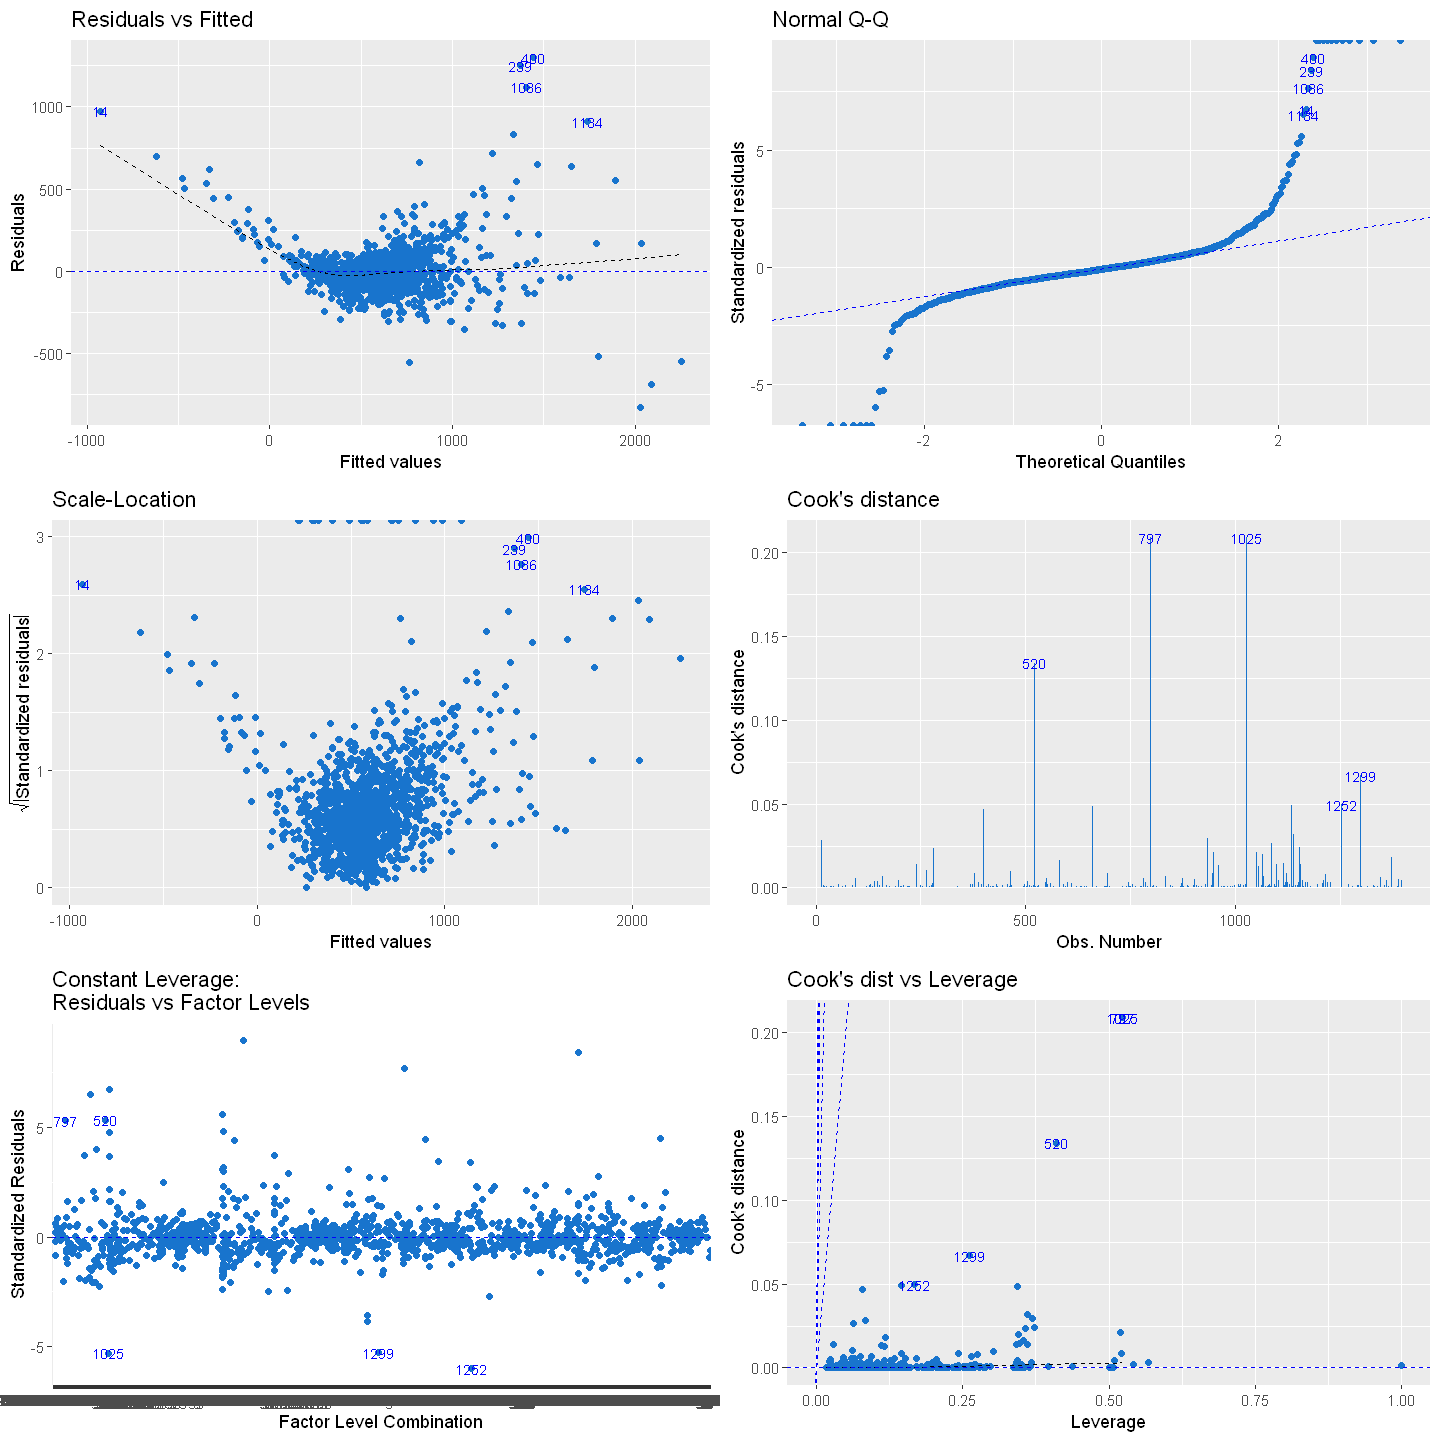

In [221]:
autoplot(mod, which =1:6, colour='dodgerblue3', smooth.colour = 'black', smooth.linetype = 'dashed', ad.colour = 'blue',
        label.size=3, label.n = 5, label.colour = 'blue', ncol = 2)

Warning message:
"not plotting observations with leverage one:
  182, 237, 254, 490, 500, 525, 712, 775, 777, 885, 1099, 1106, 1144, 1223, 1234, 1240, 1283, 1325"


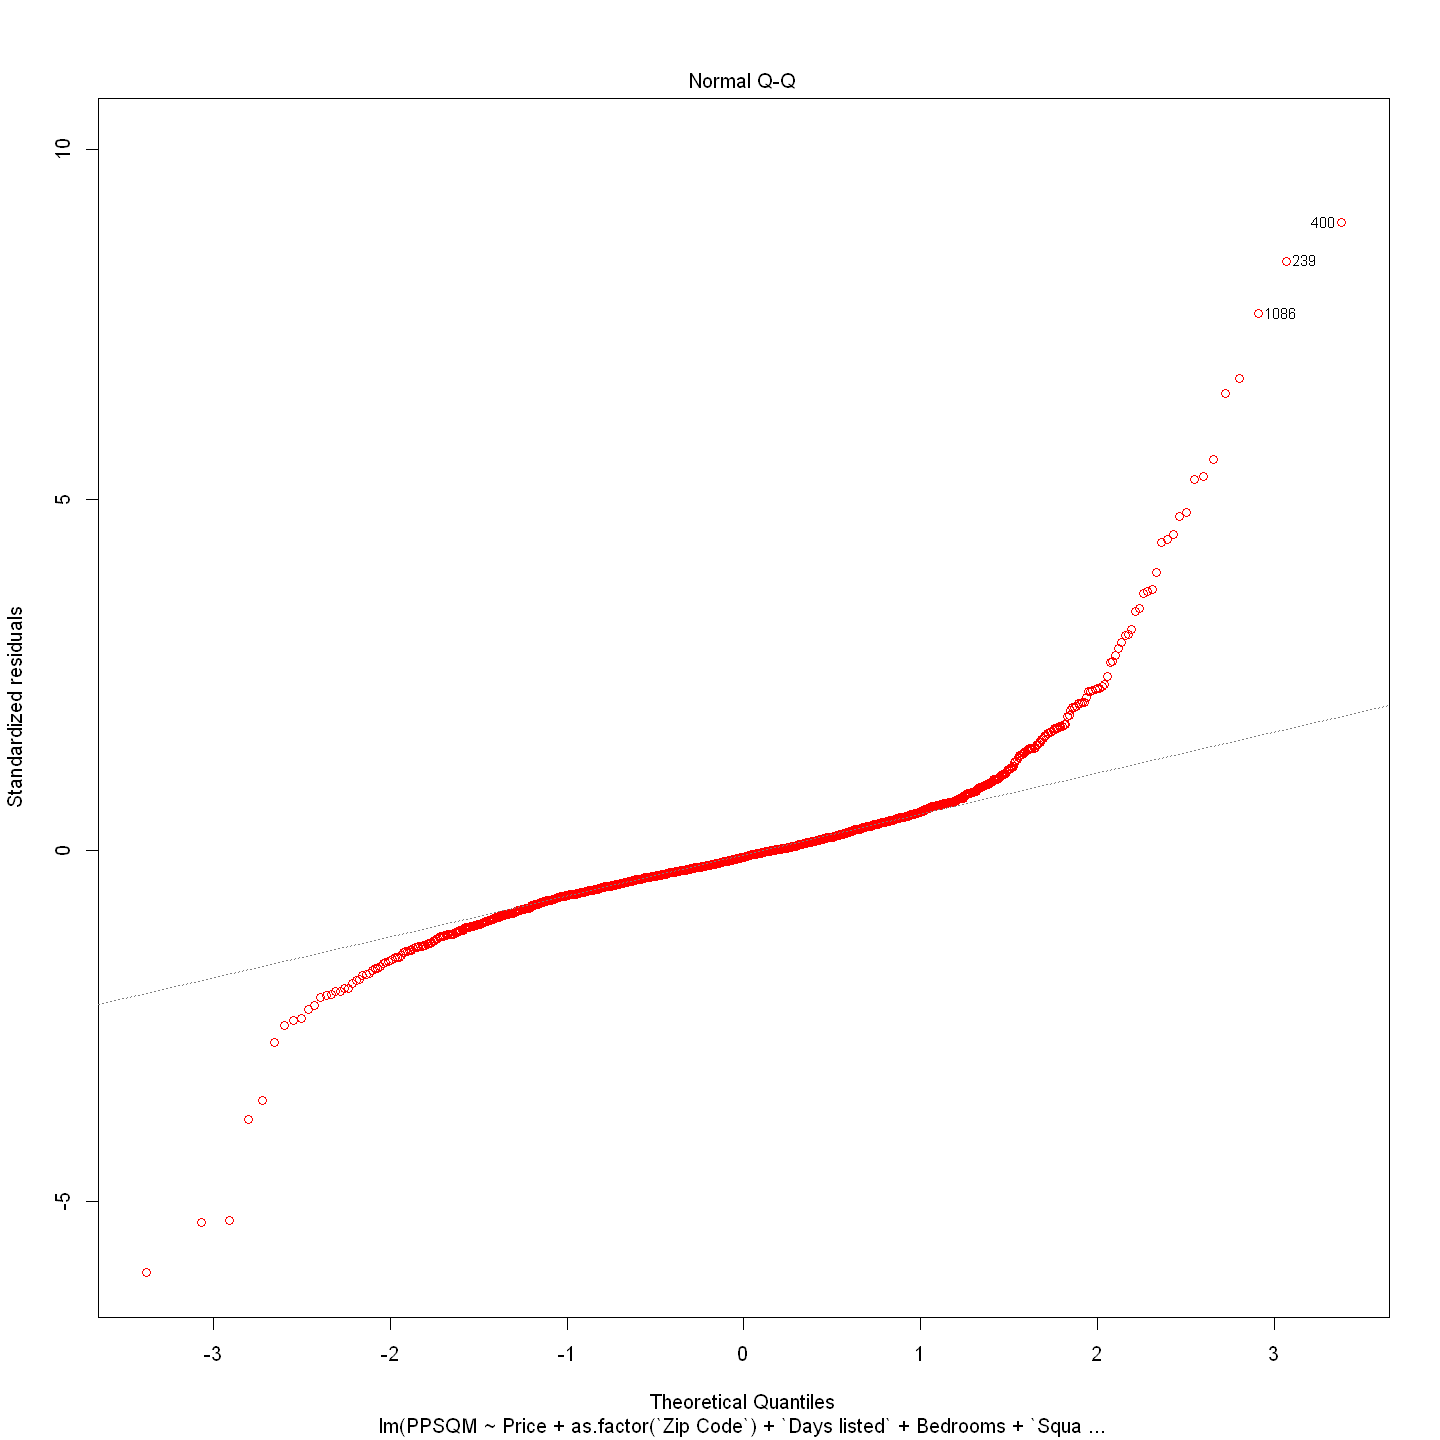

In [222]:
plot(mod, which=2, col=c("red"))  # Q-Q Plot

In [224]:
dplyr::slice_min(houses_df,n=3,order_by=resid_PPSQF)

ID,Address,Zip Code,Date Listed,Days listed,Price,Bedrooms,Loft,Square feet,Lotsize,Year,Neighborhood,PPSQM,PPLOTSIZ,pred,resid,ExpRet,pred_PPSQF,resid_PPSQF,pred_Price_PPSQF
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1252,2663 Divisadero Street,94123,2008-05-14,460,8100000,5,0,6750,3300,1904,High,1200.000,2454.5455,6136391,1963609,-0.2424209,2028.564,-5592808,13692808
1299,34 Presidio Terrace,94118,2008-04-04,500,9500000,5,0,6759,10441,1911,Medium,1405.533,909.8745,5423634,4076366,-0.4290911,2091.039,-4633334,14133334
1054,3383 Washington Street,94118,2008-08-08,374,7875000,5,0,4600,4390,1900,Medium,1711.957,1793.8497,5351389,2523611,-0.3204585,2256.308,-2504018,10379018


In [246]:
round(cor(select(houses_df, PPSQM:ExpRet)),2)

,PPSQM,PPLOTSIZ,pred,resid,ExpRet
PPSQM,1.00,0.57,0.63,0.00,0.01
PPLOTSIZ,0.57,1.00,0.77,0.00,0.08
pred,0.63,0.77,1.00,0.00,0.22
resid,0.00,0.00,0.00,1.00,-0.65
ExpRet,0.01,0.08,0.22,-0.65,1.00


In [247]:
round(cor(select(houses_df, pred_PPSQF:pred_Price_PPSQF)),2)

,pred_PPSQF,resid_PPSQF,pred_Price_PPSQF
pred_PPSQF,1.00,-0.38,0.70
resid_PPSQF,-0.38,1.00,-0.68
pred_Price_PPSQF,0.70,-0.68,1.00


In [294]:
ID_labels <- head(houses_df[with(houses_df,order(resid)), ],10)[["ID"]]


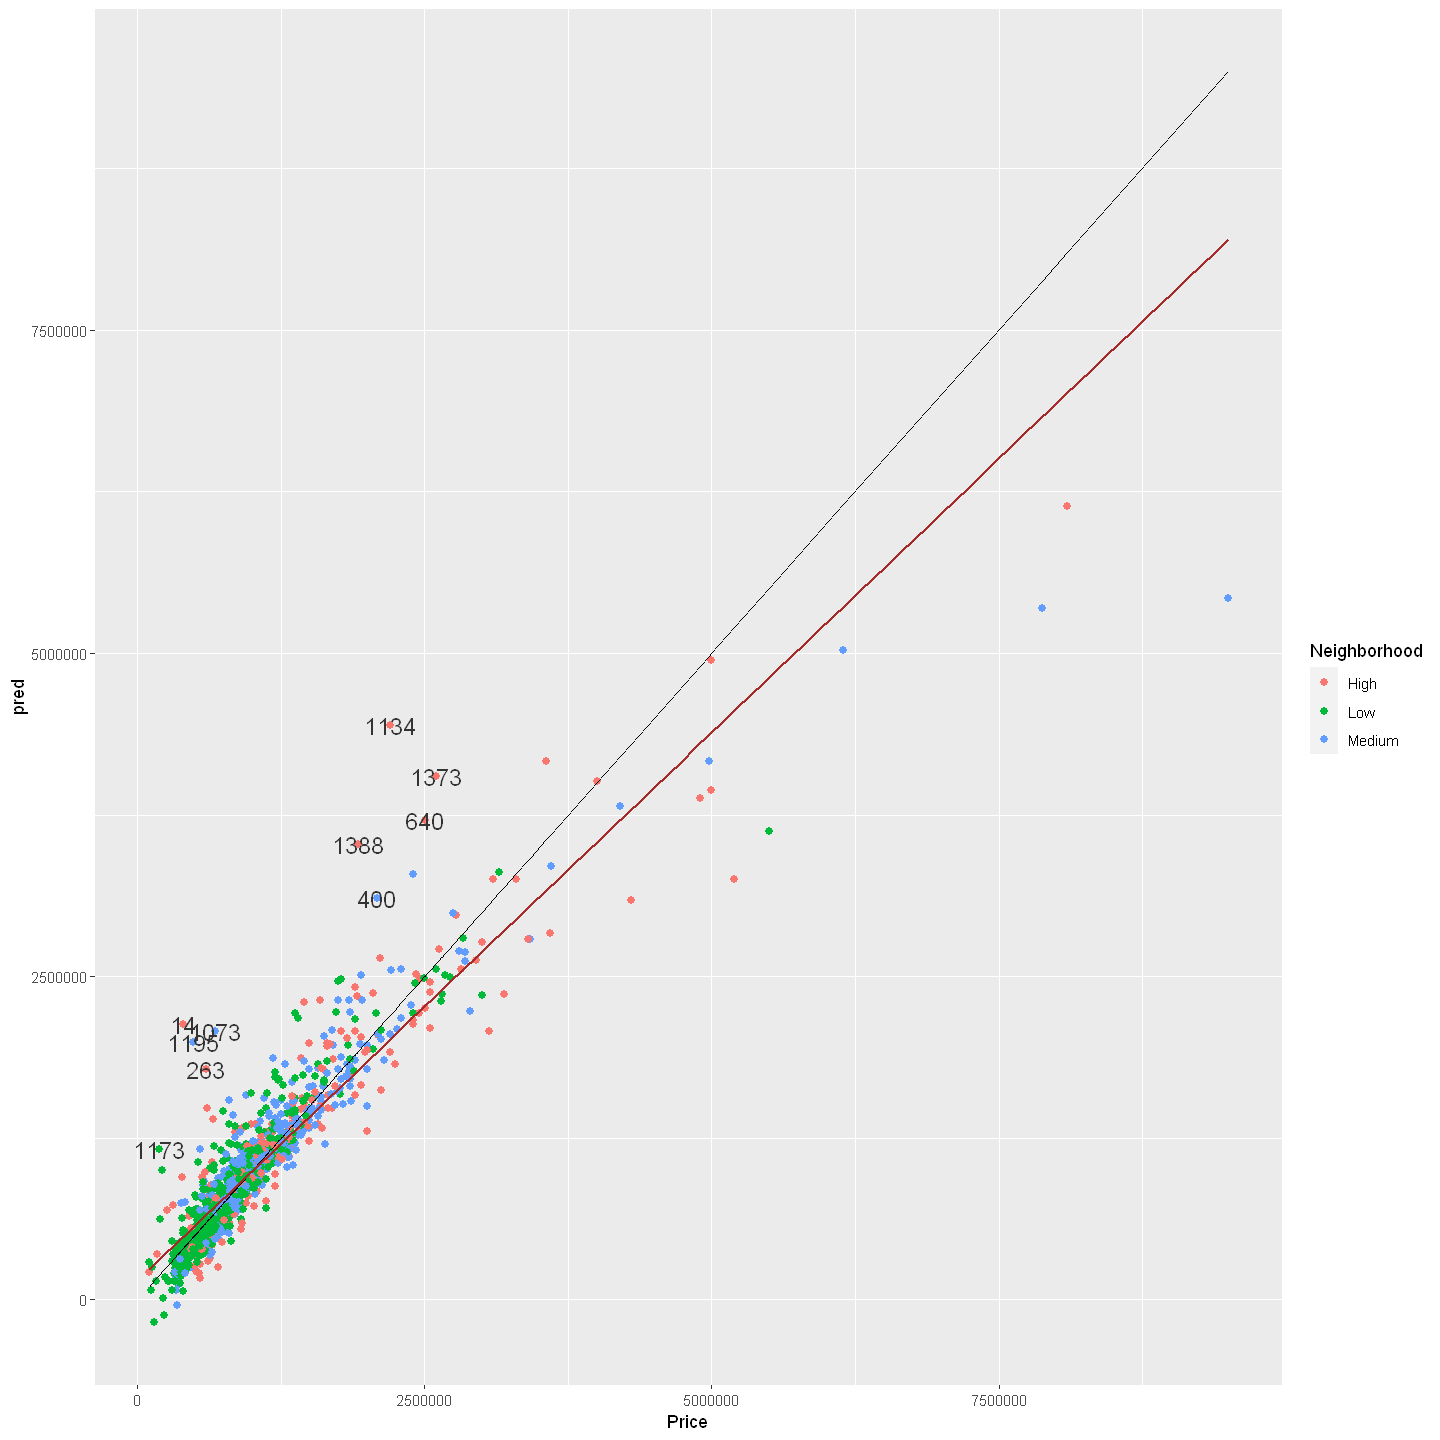

In [293]:
p <- ggplot(houses_df, aes(Price,pred, color = Neighborhood))
p <- p + geom_point(size=2)
p <- p + geom_text(aes(label = ID),
            color = "gray20",
            size = 5,
            data = filter(houses_df, ID %in% ID_labels))
p <- p + geom_line(aes(Price,Price), color = "black")
my.formula <- y ~ x
p <- p + geom_smooth(method="lm", formula = my.formula, se=FALSE, color="brown", size=0.6)

p

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 6"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 6"
Warning message in sqrt(sum.squares/one.delta):
"NaNs produced"
Warning message in stats::qt(level/2 + 0.5, pred$df):
"NaNs produced"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"


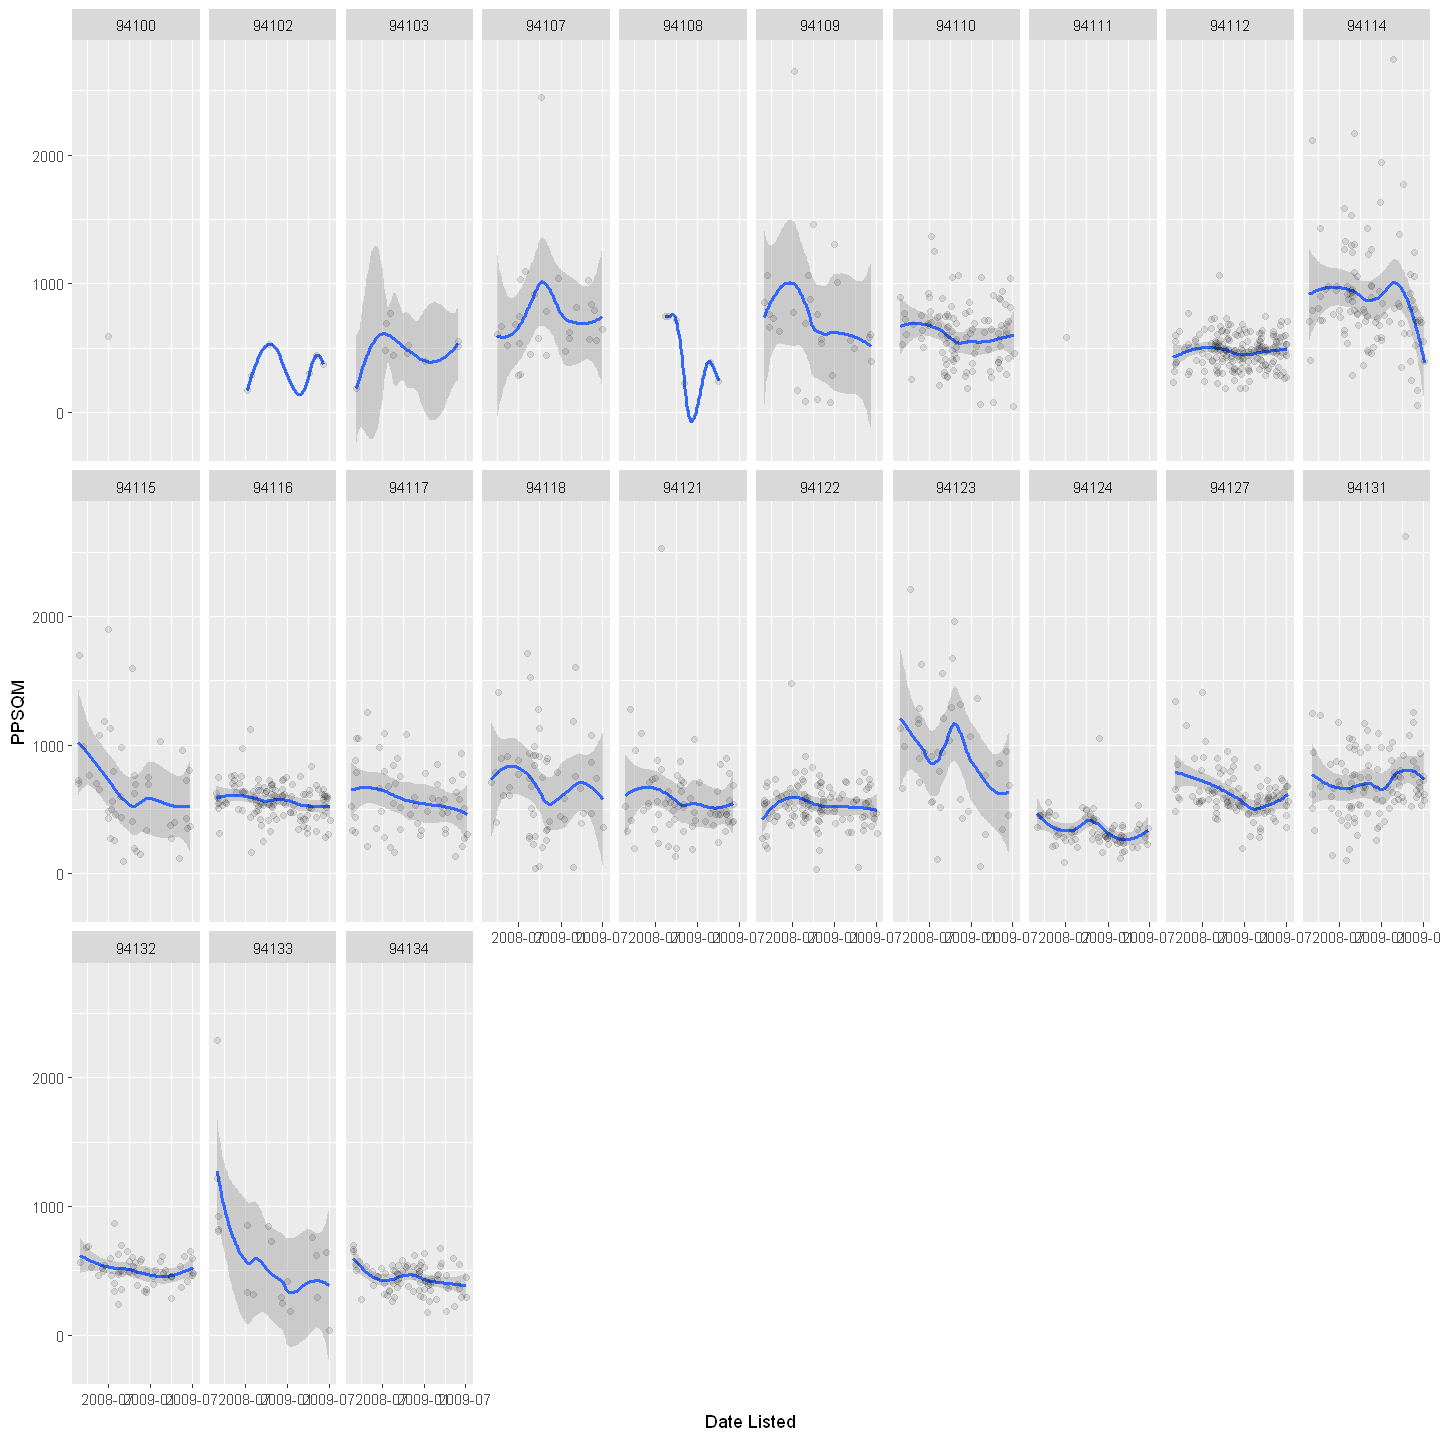

In [258]:
p5 <- ggplot(houses_df, aes(x = `Date Listed`, y = PPSQM))
#p5 + geom_line(aes(color = `Zip Code`))  
(p5 <- p5 + geom_smooth() + geom_point(alpha=0.1)+
   facet_wrap(~`Zip Code`, ncol = 10))

In [ ]:
houses